# 1.Problem Definition:
#### How does the features affect the rating of the game
#### What should the developer/publisher consider when creating a game that does reasonably well

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Setting up the data!

In [2]:
original_data = pd.read_csv('game_data_all.csv')
pd.options.display.max_columns = None
display(original_data)

Unnamed: 0                              game           link  \
0               0                       Pizza Tower  /app/2231450/   
1               1                   Resident Evil 4  /app/2050650/   
2               2  The Murder of Sonic the Hedgehog  /app/2324650/   
3               3                Pineapple on pizza  /app/2263010/   
4               4                        Hi-Fi RUSH  /app/1817230/   
...           ...                               ...            ...   
67566       67566                   Space Empires V     /app/1690/   
67567       67567  Iron Warriors: T-72 Tank Command     /app/1670/   
67568       67568          Gumboy: Crazy Adventures     /app/2520/   
67569       67569                   Shattered Union     /app/3960/   
67570       67570               Poker Superstars II     /app/4100/   

          release  peak_players  positive_reviews  negative_reviews  \
0      2023-01-26          4529             19807               227   
1      2023-03-24        168191             61752              1616   
2      2023-03-31         15543             12643               213   
3      2023-03-28          1415             11717               209   
4      2023-01-25          6132             14152               324   
...           ...           ...               ...               ...   
67566  2006-10-16           137               290               120   
67567  2006-07-26            15               173               104   
67568  2006-12-19            22                61                60   
67569  2006-10-25            13                71                70   
67570  2006-10-05             9                 6                 7   

       total_reviews  rating       primary_genre  \
0              20034   96.39          Action (1)   
1              63368   95.75          Action (1)   
2              12856   95.54          Casual (4)   
3              11926   95.39          Indie (23)   
4              14476   95.09          Action (1)   
...              ...     ...                 ...   
67566            410   67.34        Strategy (2)   
67567            277   60.17        Strategy (2)   
67568            121   50.32   Unknown Genre (0)   
67569            141   50.27        Strategy (2)   
67570             13   47.89  Unknown Genre (21)   

                                            store_genres           publisher  \
0                                 Action (1), Indie (23)       Tour De Pizza   
1                             Action (1), Adventure (25)     CAPCOM Co. Ltd.   
2      Casual (4), Free to Play (37), Indie (23), Sim...                SEGA   
3              Casual (4), Free to Play (37), Indie (23)        Majorariatto   
4                                             Action (1)  Bethesda Softworks   
...                                                  ...                 ...   
67566                                       Strategy (2)      Strategy First   
67567                                       Strategy (2)      Strategy First   
67568                             Casual (4), Indie (23)      CINEMAX s.r.o.   
67569                                       Strategy (2)                  2K   
67570  Unknown Genre (21), Casual (4), Strategy (2), ...           Funkitron   

                   developer  \
0              Tour De Pizza   
1            CAPCOM Co. Ltd.   
2                       SEGA   
3               Majorariatto   
4            Tango Gameworks   
...                      ...   
67566  Malfador Machinations   
67567         Strategy First   
67568         CINEMAX s.r.o.   
67569                 PopTop   
67570              Funkitron   

                                   detected_technologies store_asset_mod_time  \
0                             Engine.GameMaker; SDK.FMOD           2023-01-10   
1                 Engine.RE_Engine; SDK.AMD_GPU_Services           2023-03-29   
2                 Engine.Unity; SDK.UnityBurst; SDK.cURL           2023-03-24   
3                 

In [3]:
print("Data type : ", type(original_data))
print("Data dims : ", original_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (67571, 20)


###### The data set has over 60k data points. Even after we clean the data, we can expect the size of the data point to still be sufficiently large to conduct further meaningful analysis

In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

In [5]:
print(original_data.dtypes.head)

<bound method NDFrame.head of Unnamed: 0                 int64
game                      object
link                      object
release                   object
peak_players               int64
positive_reviews           int64
negative_reviews           int64
total_reviews              int64
rating                   float64
primary_genre             object
store_genres              object
publisher                 object
developer                 object
detected_technologies     object
store_asset_mod_time      object
review_percentage        float64
players_right_now         object
24_hour_peak              object
all_time_peak              int64
all_time_peak_date        object
dtype: object>


In [6]:
print(original_data.info)

<bound method DataFrame.info of        Unnamed: 0                              game           link  \
0               0                       Pizza Tower  /app/2231450/   
1               1                   Resident Evil 4  /app/2050650/   
2               2  The Murder of Sonic the Hedgehog  /app/2324650/   
3               3                Pineapple on pizza  /app/2263010/   
4               4                        Hi-Fi RUSH  /app/1817230/   
...           ...                               ...            ...   
67566       67566                   Space Empires V     /app/1690/   
67567       67567  Iron Warriors: T-72 Tank Command     /app/1670/   
67568       67568          Gumboy: Crazy Adventures     /app/2520/   
67569       67569                   Shattered Union     /app/3960/   
67570       67570               Poker Superstars II     /app/4100/   

          release  peak_players  positive_reviews  negative_reviews  \
0      2023-01-26          4529             19807       

In [7]:
original_data.describe()

Unnamed: 0  peak_players  positive_reviews  negative_reviews  \
count  67571.000000  6.757100e+04      6.757100e+04      67571.000000   
mean   33785.000000  9.528674e+02      1.273527e+03        216.893801   
std    19506.211857  1.979093e+04      2.955163e+04       5434.959528   
min        0.000000  0.000000e+00      0.000000e+00          0.000000   
25%    16892.500000  3.000000e+00      5.000000e+00          1.000000   
50%    33785.000000  7.000000e+00      1.900000e+01          6.000000   
75%    50677.500000  4.600000e+01      9.900000e+01         29.000000   
max    67570.000000  3.257248e+06      6.307931e+06     927317.000000   

       total_reviews        rating  review_percentage  all_time_peak  
count   6.757100e+04  67571.000000       47767.000000   6.757100e+04  
mean    1.490421e+03     65.288208          74.840497   9.629879e+02  
std     3.400923e+04     14.059623          18.764257   2.017869e+04  
min     1.000000e+00     15.090000           0.000000   0.000000e+00  
25%     7.000000e+00     56.530000          64.000000   3.000000e+00  
50%     2.600000e+01     66.760000          79.000000   7.000000e+00  
75%     1.320000e+02     75.640000          90.000000   4.700000e+01  
max     7.117776e+06     97.540000         100.000000   3.257248e+06

# 2.Cleaning: Removing the NULL values & Wrong Values

In [8]:
videoGamesSelected = pd.DataFrame(original_data[['game','rating','primary_genre','store_genres','publisher','developer','detected_technologies', 'release', 'store_asset_mod_time',
                                                          'positive_reviews','negative_reviews', 'total_reviews', 'review_percentage' , 'peak_players']])
videoGamesSelected

game  rating       primary_genre  \
0                           Pizza Tower   96.39          Action (1)   
1                       Resident Evil 4   95.75          Action (1)   
2      The Murder of Sonic the Hedgehog   95.54          Casual (4)   
3                    Pineapple on pizza   95.39          Indie (23)   
4                            Hi-Fi RUSH   95.09          Action (1)   
...                                 ...     ...                 ...   
67566                   Space Empires V   67.34        Strategy (2)   
67567  Iron Warriors: T-72 Tank Command   60.17        Strategy (2)   
67568          Gumboy: Crazy Adventures   50.32   Unknown Genre (0)   
67569                   Shattered Union   50.27        Strategy (2)   
67570               Poker Superstars II   47.89  Unknown Genre (21)   

                                            store_genres           publisher  \
0                                 Action (1), Indie (23)       Tour De Pizza   
1                             Action (1), Adventure (25)     CAPCOM Co. Ltd.   
2      Casual (4), Free to Play (37), Indie (23), Sim...                SEGA   
3              Casual (4), Free to Play (37), Indie (23)        Majorariatto   
4                                             Action (1)  Bethesda Softworks   
...                                                  ...                 ...   
67566                                       Strategy (2)      Strategy First   
67567                                       Strategy (2)      Strategy First   
67568                             Casual (4), Indie (23)      CINEMAX s.r.o.   
67569                                       Strategy (2)                  2K   
67570  Unknown Genre (21), Casual (4), Strategy (2), ...           Funkitron   

                   developer  \
0              Tour De Pizza   
1            CAPCOM Co. Ltd.   
2                       SEGA   
3               Majorariatto   
4            Tango Gameworks   
...                      ...   
67566  Malfador Machinations   
67567         Strategy First   
67568         CINEMAX s.r.o.   
67569                 PopTop   
67570              Funkitron   

                                   detected_technologies     release  \
0                             Engine.GameMaker; SDK.FMOD  2023-01-26   
1                 Engine.RE_Engine; SDK.AMD_GPU_Services  2023-03-24   
2                 Engine.Unity; SDK.UnityBurst; SDK.cURL  2023-03-31   
3                                 Engine.Unity; SDK.cURL  2023-03-28   
4      Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...  2023-01-25   
...                                                  ...         ...   
67566                                                NaN  2006-10-16   
67567                                                NaN  2006-07-26   
67568                             SDK.OpenAL; SDK.Vorbis  2006-12-19   
67569             SDK.Bink_Video; SDK.Miles_Sound_System  2006-10-25   
67570                                  SDK.BASS; SDK.SDL  2006-10-05   

      store_asset_mod_time  positive_reviews  negative_reviews  total_reviews  \
0               2023-01-10             19807               227          20034   
1               2023-03-29             61752              1616          63368   
2               2023-03-24             12643               213          12856   
3               2023-03-22             11717               209          11926   
4               2023-04-11             14152               324          14476   
...                    ...               ...               ...            ...   
67566           2019-10-29               290               120            410   
67567           2019-11-19               173               104            277   
67568           2022-11-04                61                60            121   
67569           2019-09-20                71                70            141   
67570                  NaN                 6                 7             13   

In [9]:
missing_values = videoGamesSelected.isnull().sum()
missing_values

game                         0
rating                       0
primary_genre               10
store_genres                57
publisher                  461
developer                  128
detected_technologies     7306
release                      0
store_asset_mod_time       296
positive_reviews             0
negative_reviews             0
total_reviews                0
review_percentage        19804
peak_players                 0
dtype: int64

###### We decided to remove all those data that has missing entry/entries in the columns above as should we use the data later for analysis, there will be missing entries and thus voiding the particular section and the data point as a whole. Condequently, the comparison would not be fair and meaningful

In [10]:
cleaned_data = videoGamesSelected.dropna()
cleaned_data

game  rating      primary_genre  \
0                           Pizza Tower   96.39         Action (1)   
1                       Resident Evil 4   95.75         Action (1)   
2      The Murder of Sonic the Hedgehog   95.54         Casual (4)   
3                    Pineapple on pizza   95.39         Indie (23)   
4                            Hi-Fi RUSH   95.09         Action (1)   
...                                 ...     ...                ...   
67557                Vegas: Make It Big   69.50       Strategy (2)   
67563                       X3: Reunion   67.82       Strategy (2)   
67564                        Earth 2160   67.73       Strategy (2)   
67568          Gumboy: Crazy Adventures   50.32  Unknown Genre (0)   
67569                   Shattered Union   50.27       Strategy (2)   

                                            store_genres            publisher  \
0                                 Action (1), Indie (23)        Tour De Pizza   
1                             Action (1), Adventure (25)      CAPCOM Co. Ltd.   
2      Casual (4), Free to Play (37), Indie (23), Sim...                 SEGA   
3              Casual (4), Free to Play (37), Indie (23)         Majorariatto   
4                                             Action (1)   Bethesda Softworks   
...                                                  ...                  ...   
67557                                       Strategy (2)       Strategy First   
67563                                       Strategy (2)              Egosoft   
67564                                       Strategy (2)  Topware Interactive   
67568                             Casual (4), Indie (23)       CINEMAX s.r.o.   
67569                                       Strategy (2)                   2K   

                  developer  \
0             Tour De Pizza   
1           CAPCOM Co. Ltd.   
2                      SEGA   
3              Majorariatto   
4           Tango Gameworks   
...                     ...   
67557               Deepred   
67563               Egosoft   
67564  Reality Pump Studios   
67568        CINEMAX s.r.o.   
67569                PopTop   

                                   detected_technologies     release  \
0                             Engine.GameMaker; SDK.FMOD  2023-01-26   
1                 Engine.RE_Engine; SDK.AMD_GPU_Services  2023-03-24   
2                 Engine.Unity; SDK.UnityBurst; SDK.cURL  2023-03-31   
3                                 Engine.Unity; SDK.cURL  2023-03-28   
4      Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...  2023-01-25   
...                                                  ...         ...   
67557                                           SDK.FMOD  2006-12-21   
67563                                         SDK.Vorbis  2006-07-21   
67564                 Engine.FNA; Engine.XNA; SDK.OpenAL  2006-04-01   
67568                             SDK.OpenAL; SDK.Vorbis  2006-12-19   
67569             SDK.Bink_Video; SDK.Miles_Sound_System  2006-10-25   

      store_asset_mod_time  positive_reviews  negative_reviews  total_reviews  \
0               2023-01-10             19807               227          20034   
1               2023-03-29             61752              1616          63368   
2               2023-03-24             12643               213          12856   
3               2023-03-22             11717               209          11926   
4               2023-04-11             14152               324          14476   
...                    ...               ...               ...            ...   
67557           2019-11-14               114                38            152   
67563           2022-12-15               421               173            594   
67564           2019-12-23               878               375           1253   
67568           2022-11-04                61                60            121   
67569           2019-09-20                71                70            141   

       rev

In [11]:
missing_values_check = cleaned_data.isnull().sum()
missing_values_check

game                     0
rating                   0
primary_genre            0
store_genres             0
publisher                0
developer                0
detected_technologies    0
release                  0
store_asset_mod_time     0
positive_reviews         0
negative_reviews         0
total_reviews            0
review_percentage        0
peak_players             0
dtype: int64

###### Check one more time to ensure that all remaining data do not have missing entries

## Cleaning: Combining later value between store_asset_mod_time and release date into new column

###### We want to use the later date among store asset mod time and release date, we want to compare the games with the latest updated date

In [12]:
cleaned_data.loc[:, 'release'] = pd.to_datetime(cleaned_data['release'], errors='coerce')  # 'coerce' will set invalid parsing as NaT
cleaned_data.loc[:, 'store_asset_mod_time'] = pd.to_datetime(cleaned_data['store_asset_mod_time'], errors='coerce')

# Compare the dates and find the latest date using np.where
# This step assumes no NaT values are present; if there might be NaT, additional handling is needed
latest_date = np.where(cleaned_data['release'] > cleaned_data['store_asset_mod_time'],
                       cleaned_data['release'],
                       cleaned_data['store_asset_mod_time'])

# Create a new DataFrame with the latest_date column
new_data = cleaned_data.copy()
new_data['latest_date'] = latest_date

# Display the new DataFrame with the 'latest_date' column
new_data.head()

game  rating primary_genre  \
0                       Pizza Tower   96.39    Action (1)   
1                   Resident Evil 4   95.75    Action (1)   
2  The Murder of Sonic the Hedgehog   95.54    Casual (4)   
3                Pineapple on pizza   95.39    Indie (23)   
4                        Hi-Fi RUSH   95.09    Action (1)   

                                        store_genres           publisher  \
0                             Action (1), Indie (23)       Tour De Pizza   
1                         Action (1), Adventure (25)     CAPCOM Co. Ltd.   
2  Casual (4), Free to Play (37), Indie (23), Sim...                SEGA   
3          Casual (4), Free to Play (37), Indie (23)        Majorariatto   
4                                         Action (1)  Bethesda Softworks   

         developer                              detected_technologies  \
0    Tour De Pizza                         Engine.GameMaker; SDK.FMOD   
1  CAPCOM Co. Ltd.             Engine.RE_Engine; SDK.AMD_GPU_Services   
2             SEGA             Engine.Unity; SDK.UnityBurst; SDK.cURL   
3     Majorariatto                             Engine.Unity; SDK.cURL   
4  Tango Gameworks  Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...   

               release store_asset_mod_time  positive_reviews  \
0  2023-01-26 00:00:00  2023-01-10 00:00:00             19807   
1  2023-03-24 00:00:00  2023-03-29 00:00:00             61752   
2  2023-03-31 00:00:00  2023-03-24 00:00:00             12643   
3  2023-03-28 00:00:00  2023-03-22 00:00:00             11717   
4  2023-01-25 00:00:00  2023-04-11 00:00:00             14152   

   negative_reviews  total_reviews  review_percentage  peak_players  \
0               227          20034               98.0          4529   
1              1616          63368               97.0        168191   
2               213          12856               98.0         15543   
3               209          11926               98.0          1415   
4               324          14476               97.0          6132   

  latest_date  
0  2023-01-26  
1  2023-03-29  
2  2023-03-31  
3  2023-03-28  
4  2023-04-11

## Cleaning: Creating new column for positive review rate

In [13]:
new_data['positive_percentage'] = (new_data['positive_reviews'] / new_data['total_reviews']) * 100

new_data.head()

game  rating primary_genre  \
0                       Pizza Tower   96.39    Action (1)   
1                   Resident Evil 4   95.75    Action (1)   
2  The Murder of Sonic the Hedgehog   95.54    Casual (4)   
3                Pineapple on pizza   95.39    Indie (23)   
4                        Hi-Fi RUSH   95.09    Action (1)   

                                        store_genres           publisher  \
0                             Action (1), Indie (23)       Tour De Pizza   
1                         Action (1), Adventure (25)     CAPCOM Co. Ltd.   
2  Casual (4), Free to Play (37), Indie (23), Sim...                SEGA   
3          Casual (4), Free to Play (37), Indie (23)        Majorariatto   
4                                         Action (1)  Bethesda Softworks   

         developer                              detected_technologies  \
0    Tour De Pizza                         Engine.GameMaker; SDK.FMOD   
1  CAPCOM Co. Ltd.             Engine.RE_Engine; SDK.AMD_GPU_Services   
2             SEGA             Engine.Unity; SDK.UnityBurst; SDK.cURL   
3     Majorariatto                             Engine.Unity; SDK.cURL   
4  Tango Gameworks  Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...   

               release store_asset_mod_time  positive_reviews  \
0  2023-01-26 00:00:00  2023-01-10 00:00:00             19807   
1  2023-03-24 00:00:00  2023-03-29 00:00:00             61752   
2  2023-03-31 00:00:00  2023-03-24 00:00:00             12643   
3  2023-03-28 00:00:00  2023-03-22 00:00:00             11717   
4  2023-01-25 00:00:00  2023-04-11 00:00:00             14152   

   negative_reviews  total_reviews  review_percentage  peak_players  \
0               227          20034               98.0          4529   
1              1616          63368               97.0        168191   
2               213          12856               98.0         15543   
3               209          11926               98.0          1415   
4               324          14476               97.0          6132   

  latest_date  positive_percentage  
0  2023-01-26            98.866926  
1  2023-03-29            97.449817  
2  2023-03-31            98.343186  
3  2023-03-28            98.247526  
4  2023-04-11            97.761813

# Cleaning: Removing any wrong values

###### Wrong values such as non-numeric and negative values are removed as ratings and reviews should be positive values only
###### Unknown genre (34) and Unknown genre (0) are removed as we want to know exactly what genre does well

In [14]:
rating_dtype = new_data['rating'].dtype

# Filtering to find ratings that are not double or are negative:
# We'll assume any non-numeric or negative value needs to be counted
non_double_negative_count = new_data[(new_data['rating'].apply(lambda x: not isinstance(x, (int, float)) or x < 0))].shape[0]

# Output the results
rating_dtype, non_double_negative_count

(dtype('float64'), 0)

In [15]:
positive_reviews_dtype = new_data['positive_reviews'].dtype

non_positive_count = new_data[new_data['positive_reviews'] < 0].shape[0]

positive_reviews_dtype, non_positive_count

(dtype('int64'), 0)

In [16]:
negative_reviews_dtype = new_data['negative_reviews'].dtype

non_positive_count = new_data[new_data['negative_reviews'] < 0].shape[0]

negative_reviews_dtype, non_positive_count

(dtype('int64'), 0)

In [17]:
total_reviews_dtype = new_data['total_reviews'].dtype

non_positive_count = new_data[new_data['total_reviews'] < 0].shape[0]

total_reviews_dtype, non_positive_count

(dtype('int64'), 0)

In [18]:
review_percentage_dtype = new_data['review_percentage'].dtype

# Filtering to find ratings that are not double or are negative:
# We'll assume any non-numeric or negative value needs to be counted
non_double_negative_count = new_data[(new_data['review_percentage'].apply(lambda x: not isinstance(x, (int, float)) or x < 0))].shape[0]

# Output the results
review_percentage_dtype, non_double_negative_count

(dtype('float64'), 0)

In [19]:
peak_players_dtype = new_data['peak_players'].dtype

non_positive_count = new_data[new_data['peak_players'] < 0].shape[0]

peak_players_dtype, non_positive_count

(dtype('int64'), 0)

In [20]:
primary_genre_dtype = new_data['primary_genre'].dtype

unknown_genre_count = (new_data['primary_genre'] == "Unknown Genre (34)").sum()

primary_genre_dtype,unknown_genre_count

(dtype('O'), 1)

In [21]:
new_data = new_data[new_data.primary_genre != "Unknown Genre (34)"]
new_data.head()

game  rating primary_genre  \
0                       Pizza Tower   96.39    Action (1)   
1                   Resident Evil 4   95.75    Action (1)   
2  The Murder of Sonic the Hedgehog   95.54    Casual (4)   
3                Pineapple on pizza   95.39    Indie (23)   
4                        Hi-Fi RUSH   95.09    Action (1)   

                                        store_genres           publisher  \
0                             Action (1), Indie (23)       Tour De Pizza   
1                         Action (1), Adventure (25)     CAPCOM Co. Ltd.   
2  Casual (4), Free to Play (37), Indie (23), Sim...                SEGA   
3          Casual (4), Free to Play (37), Indie (23)        Majorariatto   
4                                         Action (1)  Bethesda Softworks   

         developer                              detected_technologies  \
0    Tour De Pizza                         Engine.GameMaker; SDK.FMOD   
1  CAPCOM Co. Ltd.             Engine.RE_Engine; SDK.AMD_GPU_Services   
2             SEGA             Engine.Unity; SDK.UnityBurst; SDK.cURL   
3     Majorariatto                             Engine.Unity; SDK.cURL   
4  Tango Gameworks  Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...   

               release store_asset_mod_time  positive_reviews  \
0  2023-01-26 00:00:00  2023-01-10 00:00:00             19807   
1  2023-03-24 00:00:00  2023-03-29 00:00:00             61752   
2  2023-03-31 00:00:00  2023-03-24 00:00:00             12643   
3  2023-03-28 00:00:00  2023-03-22 00:00:00             11717   
4  2023-01-25 00:00:00  2023-04-11 00:00:00             14152   

   negative_reviews  total_reviews  review_percentage  peak_players  \
0               227          20034               98.0          4529   
1              1616          63368               97.0        168191   
2               213          12856               98.0         15543   
3               209          11926               98.0          1415   
4               324          14476               97.0          6132   

  latest_date  positive_percentage  
0  2023-01-26            98.866926  
1  2023-03-29            97.449817  
2  2023-03-31            98.343186  
3  2023-03-28            98.247526  
4  2023-04-11            97.761813

In [22]:
primary_genre_dtype = new_data['primary_genre'].dtype

unknown_genre_count = (new_data['primary_genre'] == "Unknown Genre (34)").sum()

primary_genre_dtype,unknown_genre_count

(dtype('O'), 0)

In [23]:
primary_genre_dtype = new_data['primary_genre'].dtype

unknown_genre_count = (new_data['primary_genre'] == "Unknown Genre (0)").sum()

primary_genre_dtype,unknown_genre_count

(dtype('O'), 30)

In [24]:
new_data = new_data[new_data.primary_genre != "Unknown Genre (0)"]
new_data.head()

game  rating primary_genre  \
0                       Pizza Tower   96.39    Action (1)   
1                   Resident Evil 4   95.75    Action (1)   
2  The Murder of Sonic the Hedgehog   95.54    Casual (4)   
3                Pineapple on pizza   95.39    Indie (23)   
4                        Hi-Fi RUSH   95.09    Action (1)   

                                        store_genres           publisher  \
0                             Action (1), Indie (23)       Tour De Pizza   
1                         Action (1), Adventure (25)     CAPCOM Co. Ltd.   
2  Casual (4), Free to Play (37), Indie (23), Sim...                SEGA   
3          Casual (4), Free to Play (37), Indie (23)        Majorariatto   
4                                         Action (1)  Bethesda Softworks   

         developer                              detected_technologies  \
0    Tour De Pizza                         Engine.GameMaker; SDK.FMOD   
1  CAPCOM Co. Ltd.             Engine.RE_Engine; SDK.AMD_GPU_Services   
2             SEGA             Engine.Unity; SDK.UnityBurst; SDK.cURL   
3     Majorariatto                             Engine.Unity; SDK.cURL   
4  Tango Gameworks  Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...   

               release store_asset_mod_time  positive_reviews  \
0  2023-01-26 00:00:00  2023-01-10 00:00:00             19807   
1  2023-03-24 00:00:00  2023-03-29 00:00:00             61752   
2  2023-03-31 00:00:00  2023-03-24 00:00:00             12643   
3  2023-03-28 00:00:00  2023-03-22 00:00:00             11717   
4  2023-01-25 00:00:00  2023-04-11 00:00:00             14152   

   negative_reviews  total_reviews  review_percentage  peak_players  \
0               227          20034               98.0          4529   
1              1616          63368               97.0        168191   
2               213          12856               98.0         15543   
3               209          11926               98.0          1415   
4               324          14476               97.0          6132   

  latest_date  positive_percentage  
0  2023-01-26            98.866926  
1  2023-03-29            97.449817  
2  2023-03-31            98.343186  
3  2023-03-28            98.247526  
4  2023-04-11            97.761813

In [25]:
primary_genre_dtype = new_data['primary_genre'].dtype

unknown_genre_count = (new_data['primary_genre'] == "Unknown Genre (0)").sum()

primary_genre_dtype,unknown_genre_count

(dtype('O'), 0)

# 3.Data Visualisation and exploratory data analysis

# Single Variable Visualisation

###### We want to visualise the distribution of each data point under the identified variables. We generally used the box plot, the histogram plot and bar plot. 

###### The swarm plot is also used for the rating to have a rough gauge of where the majority of each individual game lies in terms of rating. It is identified to serve as more of a visual estimate so it is not used for other variables.

###### The Piechart is used to visualise the Primary genre as there is only 23 categories of genres which is considered few enough to be presented using a Piechart, where given the distribution of data, highlights several genres that make up the majority of the data for our consideration of analysis later on as we want to also ensure that each genre has a sufficiently large sample size

## Visualisation for Rating

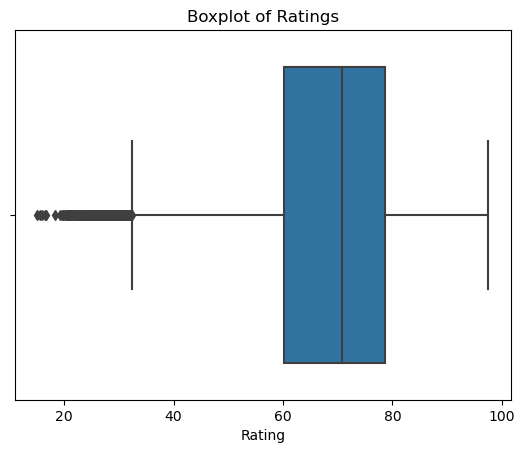

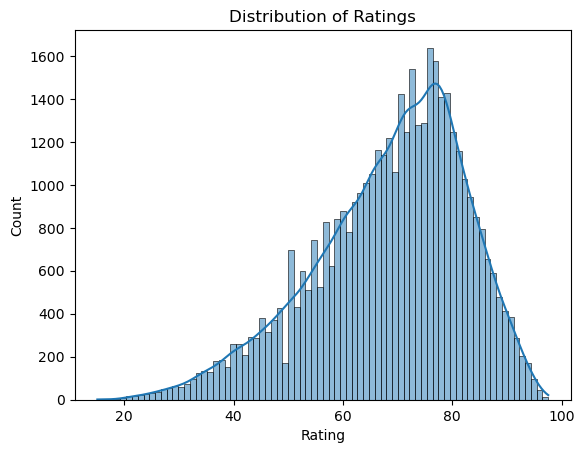

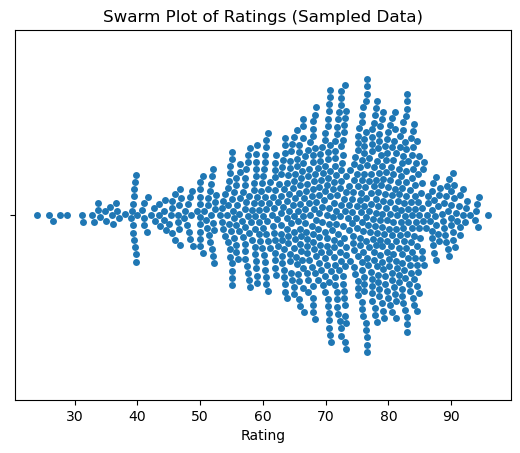

In [26]:
# Boxplot using Seaborn
sb.boxplot(x=new_data['rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

# Histogram using Seaborn
sb.histplot(new_data['rating'], kde=True)  # Set kde to True if you want a density plot on top
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Sample approximately 2% of the data without replacement
# runtime estimated 5 seconds
sample_data = new_data.sample(frac=0.02, replace=False)
sb.swarmplot(x=sample_data['rating'])
plt.title('Swarm Plot of Ratings (Sampled Data)')
plt.xlabel('Rating')
plt.show()



## Visualisation for Primary Genre

In [27]:
new_data['primary_genre'].unique()

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Free to Play (37)',
       'Simulation (28)', 'Early Access (70)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Violent (73)',
       'Design & Illustration (53)', 'Sexual Content (71)',
       'Education (54)', 'Nudity (72)', 'Game Development (60)',
       'Gore (74)', 'Utilities (57)', 'Audio Production (52)',
       'Video Production (58)', 'Web Publishing (59)'], dtype=object)

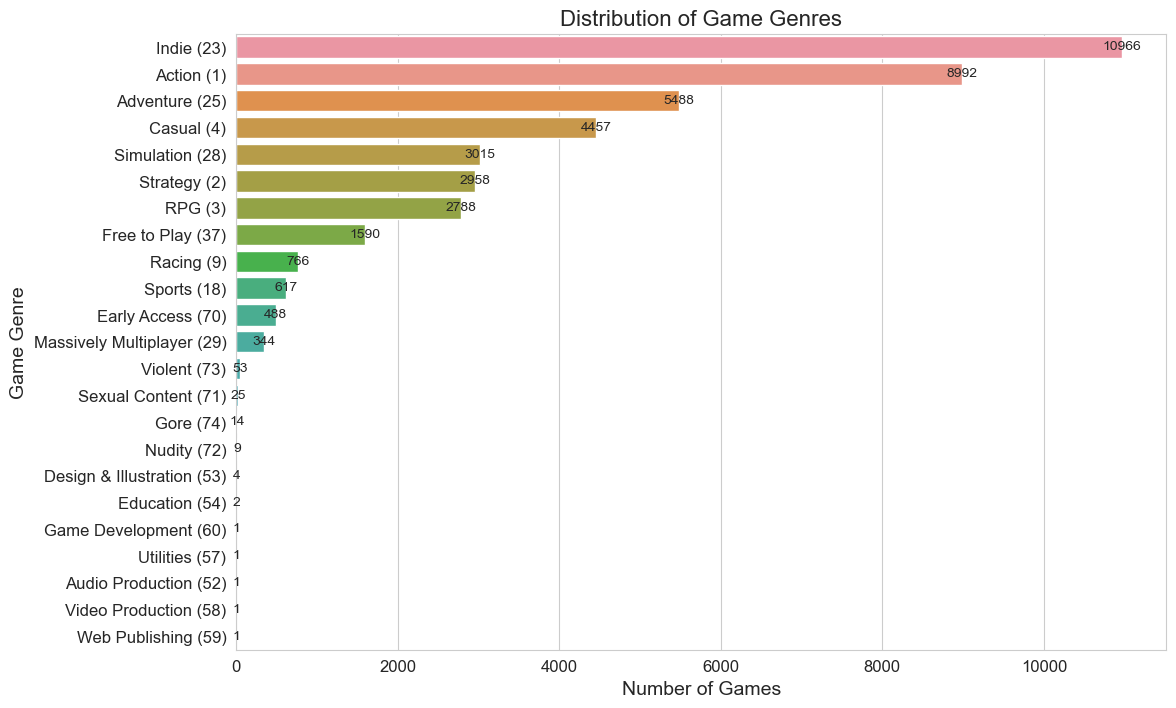

In [28]:
plt.figure(figsize=(12, 8))
sb.set_style("whitegrid")  # Adding grid lines
sb.set_palette("pastel")   # Choosing a pastel color palette

# Calculate counts of each game genre
Genre_counts = new_data['primary_genre'].value_counts()

# Creating the barplot
ax = sb.barplot(x=Genre_counts.values, y=Genre_counts.index)  # Use Genre_counts.index

# Setting labels and title
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Game Genre', fontsize=14)
plt.title('Distribution of Game Genres', fontsize=16)

# Adjusting tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting bar width and adding count labels
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 + 0.1, '{:.0f}'.format(p.get_width()), ha="center")

plt.show()


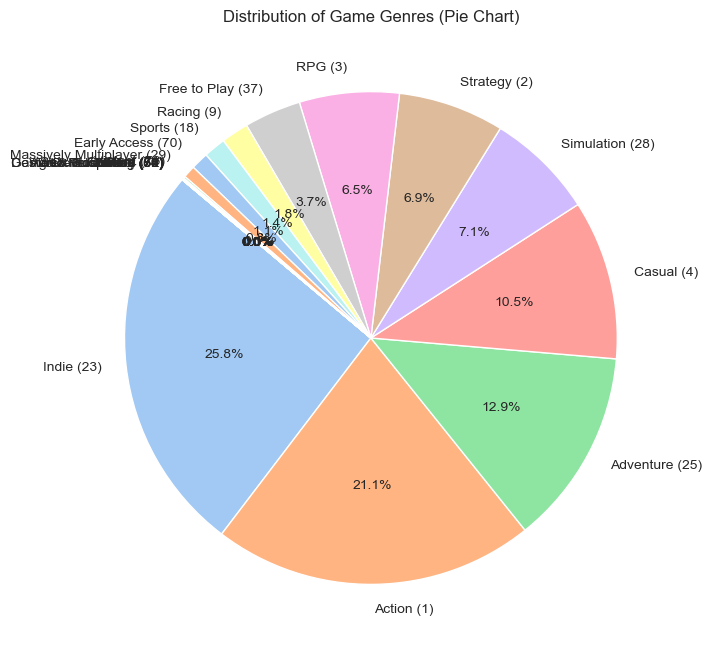

In [29]:

# Extracting game genres and counts
game_genres = Genre_counts.index
genre_counts = Genre_counts.values

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=game_genres, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Game Genres (Pie Chart)')
plt.show()


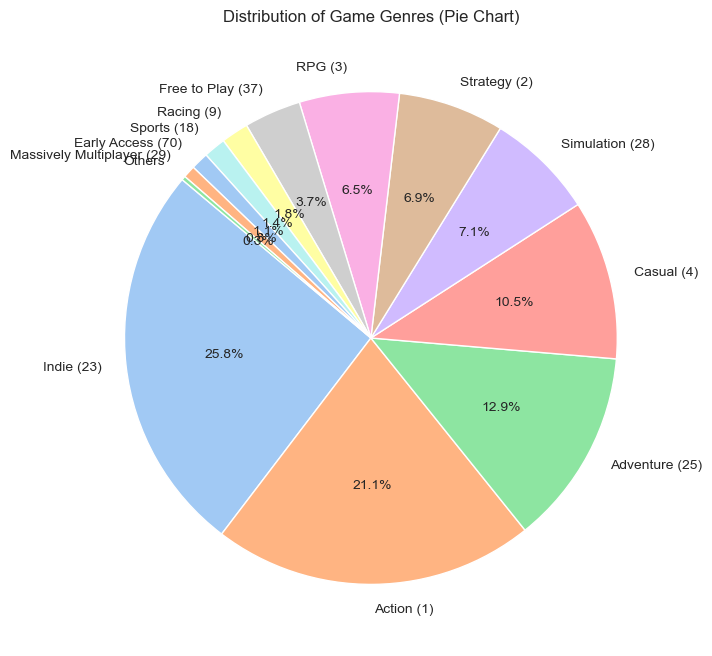

In [30]:
# Calculate proportions
total_count = genre_counts.sum()
proportions = genre_counts / total_count

# Create a mask for genres with less than 0.5% proportion
mask = proportions < 0.005

# Filter out genres with proportions less than 0.5%
significant_genres = game_genres[~mask].tolist()
significant_counts = genre_counts[~mask].tolist()

# Sum counts for genres with less than 0.5% proportion
others_count = sum(genre_counts[mask])

# Add "Others" category to the significant genres
significant_genres.append('Others')
significant_counts.append(others_count)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(significant_counts, labels=significant_genres, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Game Genres (Pie Chart)')
plt.show()

## Visualisation for Store Genre

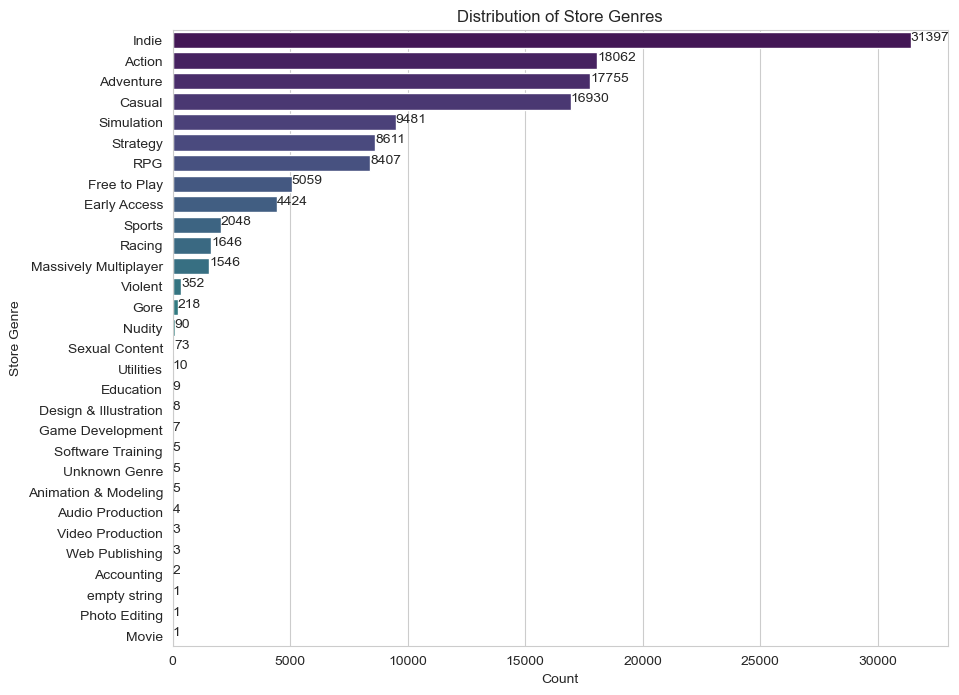

In [31]:

# Selecting required columns
storerating = pd.DataFrame(new_data["store_genres"])

# Splitting the store_genres into different columns
storerating['store_genres'] = storerating['store_genres'].str.split(',')

# Get the maximum number of genres in any row
maxnum_genres = storerating['store_genres'].apply(len).max()

# Loop through each genre and create a separate column for it
for i in range(maxnum_genres):
    storerating[f'Genre_{i+1}'] = storerating['store_genres'].str[i].str.split('(').str[0].str.strip()

# Drop the original 'store_genres' column
storerating.drop(columns=['store_genres'], inplace=True)

# Melt the DataFrame to long format for visualization
storerating_melted = storerating.melt(value_vars=[f'Genre_{i+1}' for i in range(maxnum_genres)])

# Plotting
plt.figure(figsize=(10, 8))
sb.countplot(data=storerating_melted, y='value', order=storerating_melted['value'].value_counts().index, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Store Genre')
plt.title('Distribution of Store Genres')
for index, value in enumerate(storerating_melted['value'].value_counts()):
    plt.text(value, index, str(value))
plt.show()


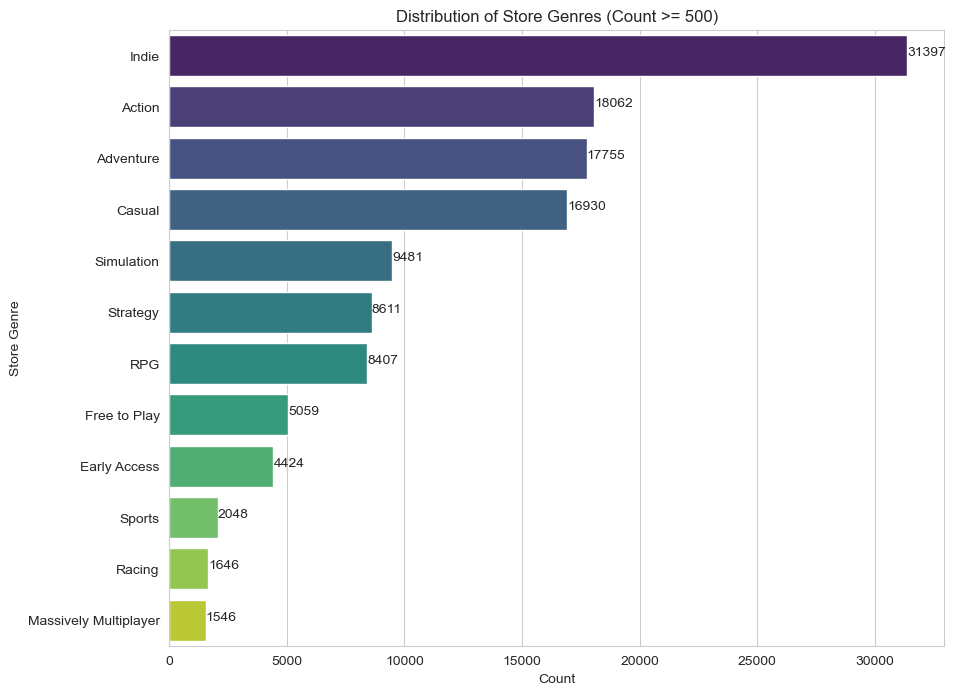

In [32]:
# Filter out store genres with counts below 500
genre_counts = storerating_melted['value'].value_counts()
filtered_genres = genre_counts[genre_counts >= 500].index
storerating_melted_filtered = storerating_melted[storerating_melted['value'].isin(filtered_genres)]

# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(data=storerating_melted_filtered, y='value', order=filtered_genres, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Store Genre')
plt.title('Distribution of Store Genres (Count >= 500)')
for index, value in enumerate(storerating_melted_filtered['value'].value_counts()):
    plt.text(value, index, str(value))
plt.show()


## Visualisation for Developer

In [33]:
new_data['developer'].nunique()
new_data['developer'].unique()

array(['Tour De Pizza', 'CAPCOM Co. Ltd.', 'SEGA', ..., 'Outerlight Ltd.',
       'Sonalysts', 'Deepred'], dtype=object)

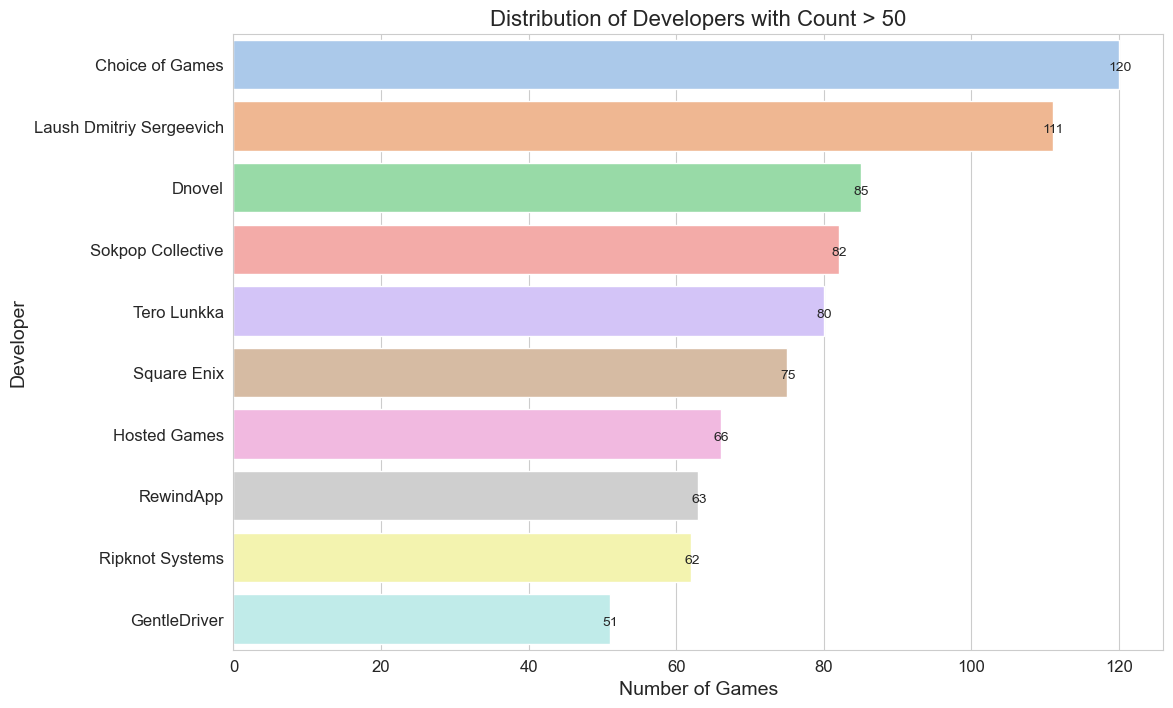

In [34]:
plt.figure(figsize=(12, 8))
sb.set_style("whitegrid")  # Adding grid lines
sb.set_palette("pastel")   # Choosing a pastel color palette

# Calculate counts of each developer
Developer_counts = new_data['developer'].value_counts()

# Filter developers with count more than 50
Developer_counts_filtered = Developer_counts[Developer_counts > 50]

# Creating the barplot
ax = sb.barplot(x=Developer_counts_filtered.values, y=Developer_counts_filtered.index)

# Setting labels and title
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Developer', fontsize=14)
plt.title('Distribution of Developers with Count > 50', fontsize=16)

# Adjusting tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting bar width and adding count labels
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 + 0.1, '{:.0f}'.format(p.get_width()), ha="center")

plt.show()


## Visualisation for Publishers

In [35]:
new_data['publisher'].nunique()
new_data['publisher'].unique()

array(['Tour De Pizza', 'CAPCOM Co. Ltd.', 'SEGA', ..., 'BioWare',
       'Chronic Logic', 'Ritual Entertainment'], dtype=object)

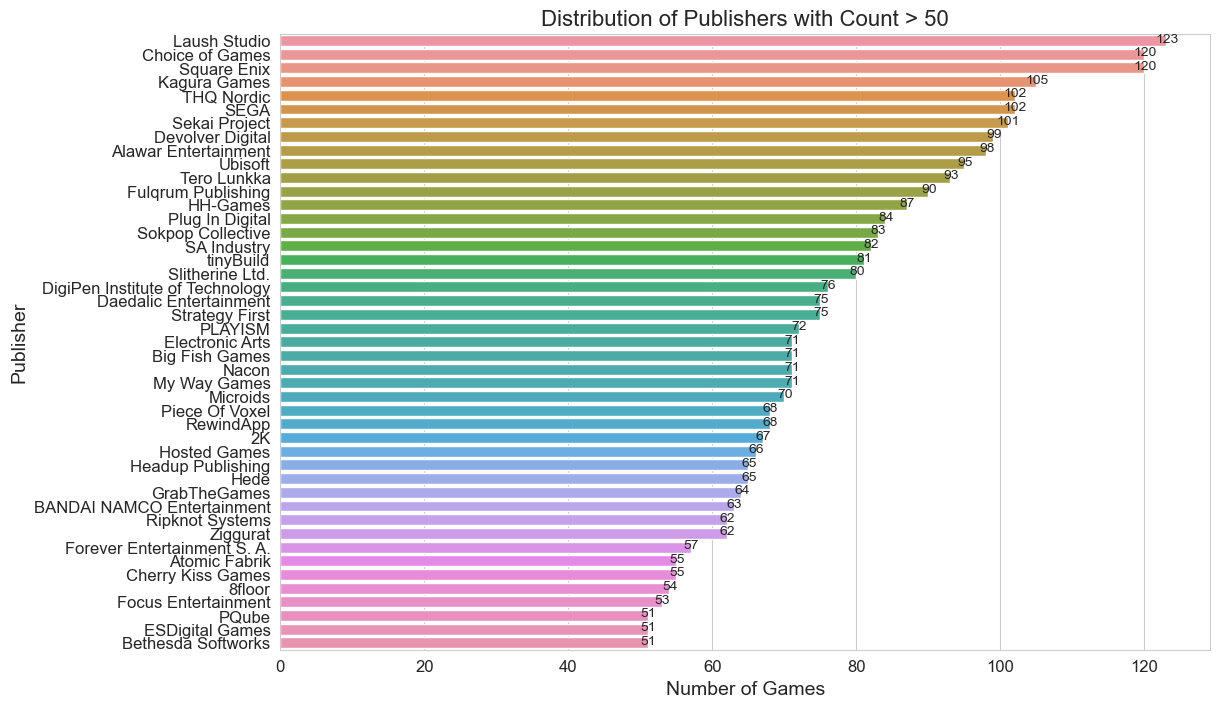

In [36]:
plt.figure(figsize=(12, 8))
sb.set_style("whitegrid")  # Adding grid lines
sb.set_palette("pastel")   # Choosing a pastel color palette

# Calculate counts of each publisher
Publisher_counts = new_data['publisher'].value_counts()

# Filter publishers with count more than 50
Publisher_counts_filtered = Publisher_counts[Publisher_counts > 50]

# Creating the barplot
ax = sb.barplot(x=Publisher_counts_filtered.values, y=Publisher_counts_filtered.index)

# Setting labels and title
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.title('Distribution of Publishers with Count > 50', fontsize=16)

# Adjusting tick font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting bar width and adding count labels
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 + 0.1, '{:.0f}'.format(p.get_width()), ha="center")

plt.show()


## Visualisation for detected technology

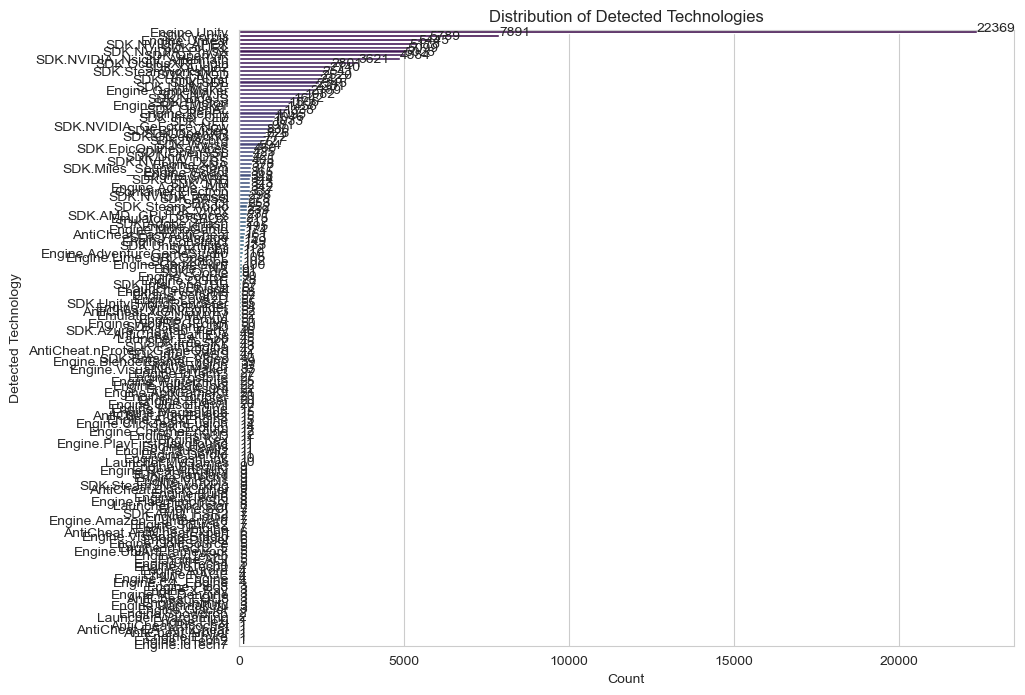

In [37]:
# Selecting required columns
storerating = pd.DataFrame(new_data["detected_technologies"])

# Splitting the detected_technologies into different columns
storerating['detected_technologies'] = storerating['detected_technologies'].str.split(';')

# Get the maximum number of technologies in any row
maxnum_technologies = storerating['detected_technologies'].apply(len).max()

# Loop through each technology and create a separate column for it
for i in range(maxnum_technologies):
    storerating[f'Technology_{i+1}'] = storerating['detected_technologies'].str[i].str.strip()

# Drop the original 'detected_technologies' column
storerating.drop(columns=['detected_technologies'], inplace=True)

# Melt the DataFrame to long format for visualization
storerating_melted = storerating.melt(value_vars=[f'Technology_{i+1}' for i in range(maxnum_technologies)])

# Plotting
plt.figure(figsize=(10, 8))
sb.countplot(data=storerating_melted, y='value', order=storerating_melted['value'].value_counts().index, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Detected Technology')
plt.title('Distribution of Detected Technologies')
for index, value in enumerate(storerating_melted['value'].value_counts()):
    plt.text(value, index, str(value))
plt.show()


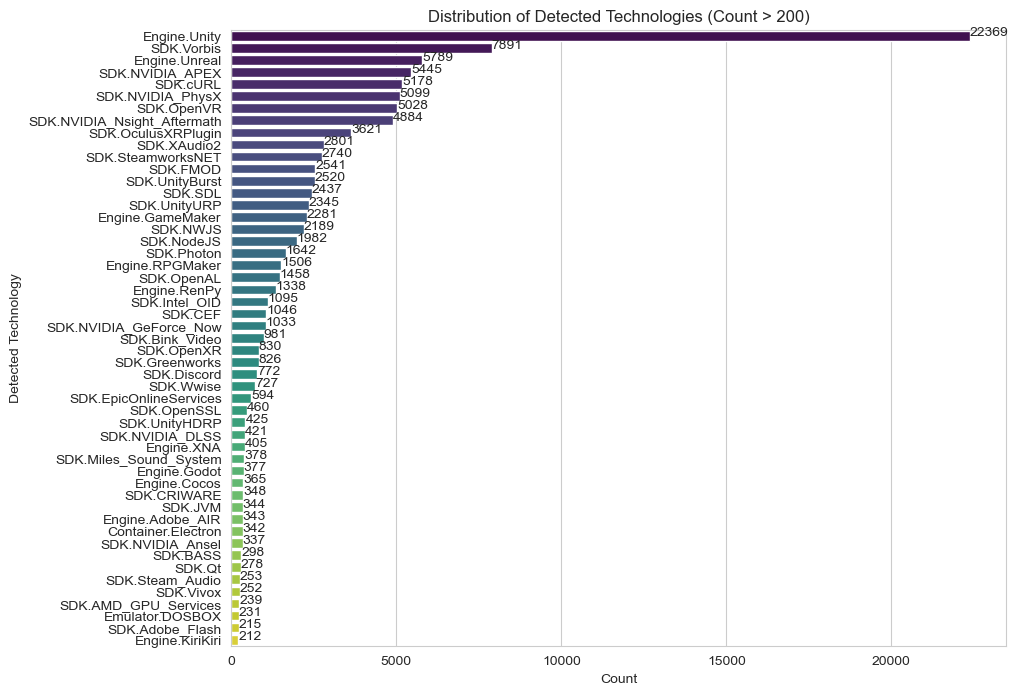

In [38]:
# Filter the storerating_melted DataFrame to include only counts larger than 200
storerating_melted_filtered = storerating_melted[storerating_melted['value'].map(storerating_melted['value'].value_counts()) > 200]

# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(data=storerating_melted_filtered, y='value', order=storerating_melted_filtered['value'].value_counts().index, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Detected Technology')
plt.title('Distribution of Detected Technologies (Count > 200)')
for index, value in enumerate(storerating_melted_filtered['value'].value_counts()):
    plt.text(value, index, str(value))
plt.show()


## Visualisation for positive reviews

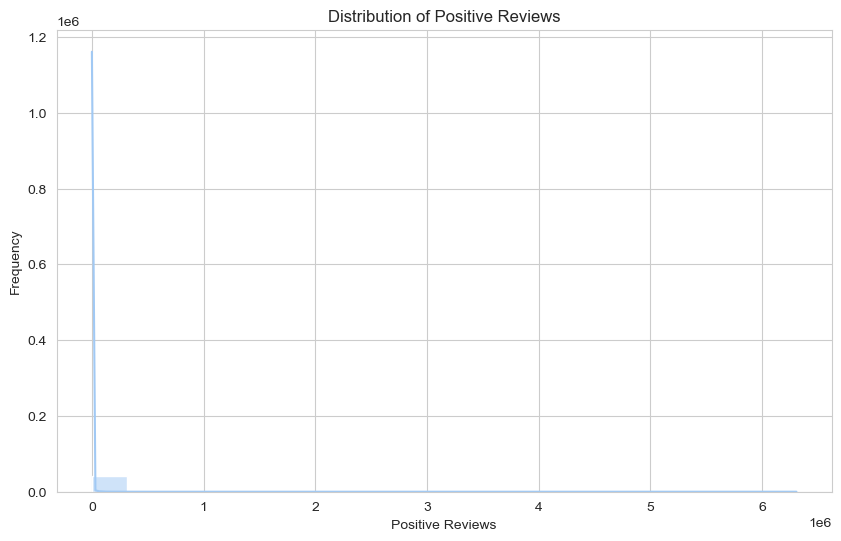

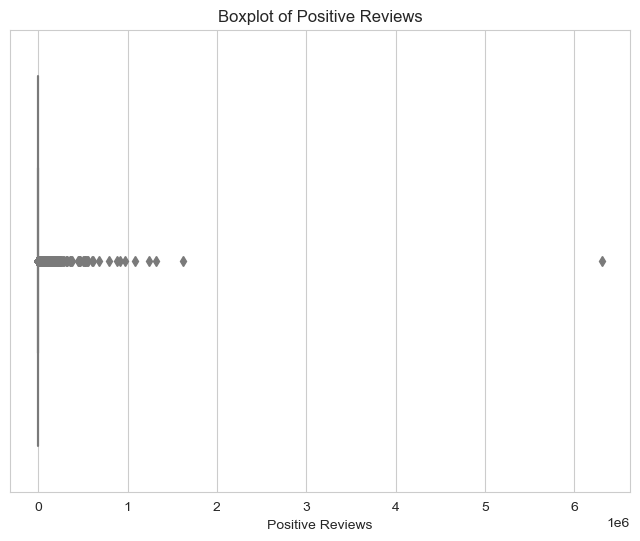

In [39]:
plt.figure(figsize=(10, 6))
sb.histplot(new_data['positive_reviews'], kde=True, bins=20)
plt.title('Distribution of Positive Reviews')
plt.xlabel('Positive Reviews')
plt.ylabel('Frequency')
plt.show()

# Boxplot of positive_reviews
plt.figure(figsize=(8, 6))
sb.boxplot(x=new_data['positive_reviews'])
plt.title('Boxplot of Positive Reviews')
plt.xlabel('Positive Reviews')
plt.show()


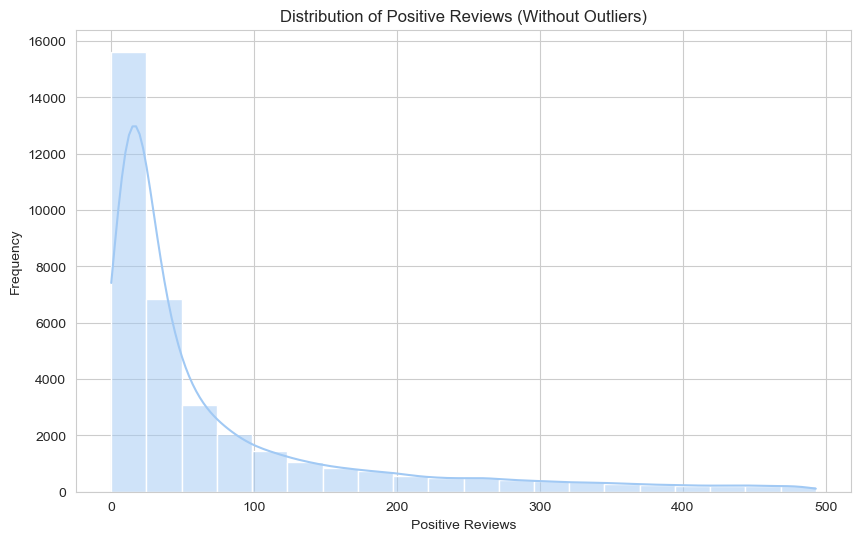

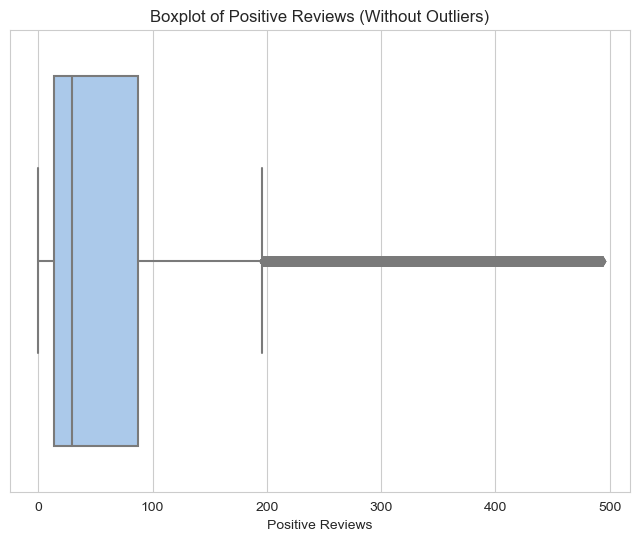

In [40]:
Q1 = new_data['positive_reviews'].quantile(0.25)
Q3 = new_data['positive_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = new_data[(new_data['positive_reviews'] >= lower_bound) & (new_data['positive_reviews'] <= upper_bound)]

# Visualize the filtered positive_reviews using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['positive_reviews'], kde=True, bins=20)
plt.title('Distribution of Positive Reviews (Without Outliers)')
plt.xlabel('Positive Reviews')
plt.ylabel('Frequency')
plt.show()

# Visualize the filtered positive_reviews using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['positive_reviews'])
plt.title('Boxplot of Positive Reviews (Without Outliers)')
plt.xlabel('Positive Reviews')
plt.show()

## visualisation for negative reviews

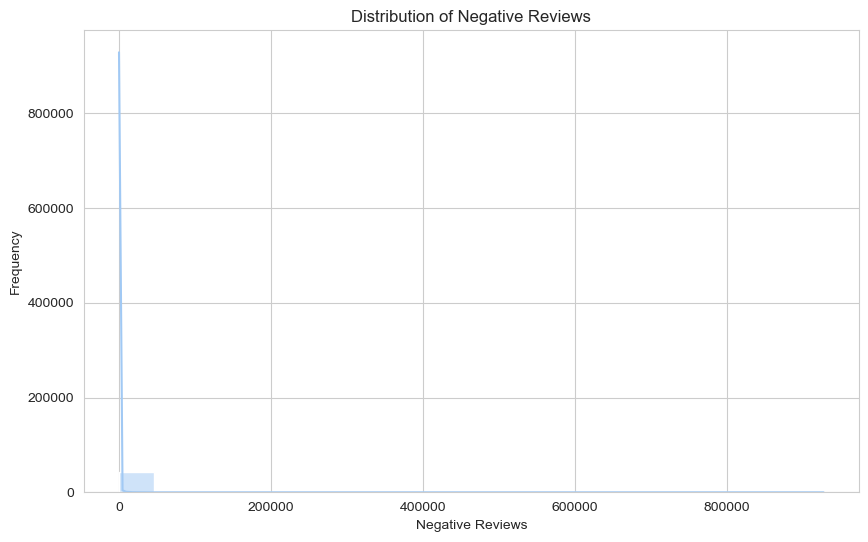

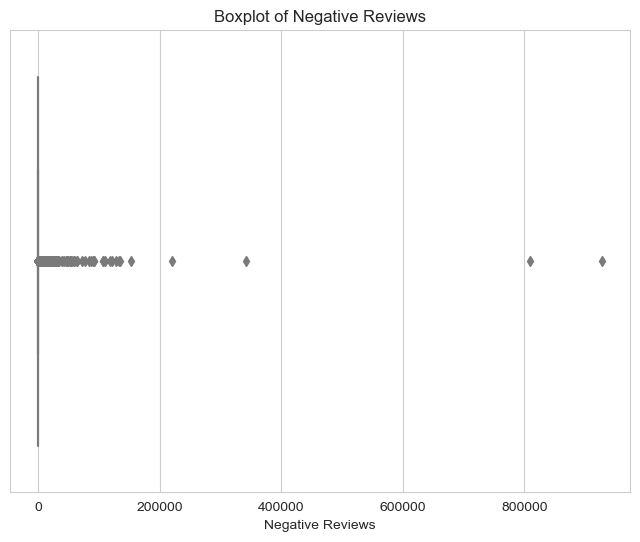

In [41]:
plt.figure(figsize=(10, 6))
sb.histplot(new_data['negative_reviews'], kde=True, bins=20)
plt.title('Distribution of Negative Reviews')
plt.xlabel('Negative Reviews')
plt.ylabel('Frequency')
plt.show()

# Boxplot of negative_reviews
plt.figure(figsize=(8, 6))
sb.boxplot(x=new_data['negative_reviews'])
plt.title('Boxplot of Negative Reviews')
plt.xlabel('Negative Reviews')
plt.show()

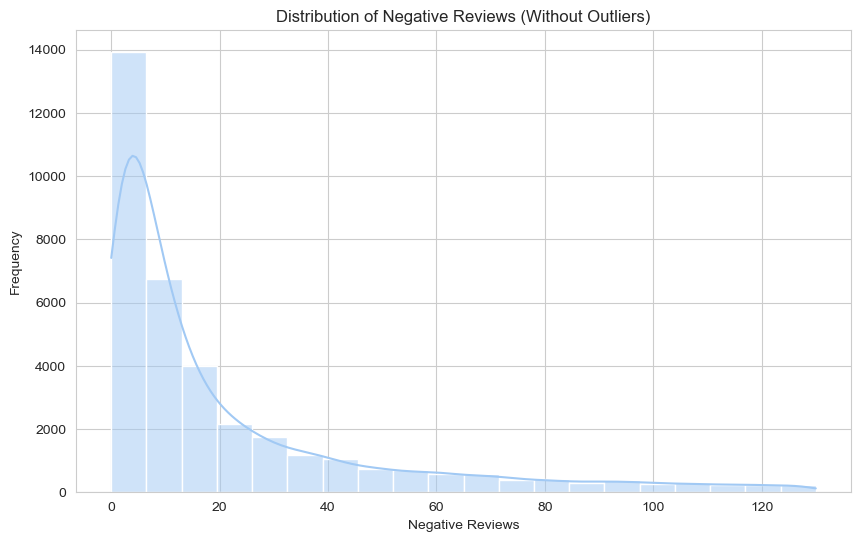

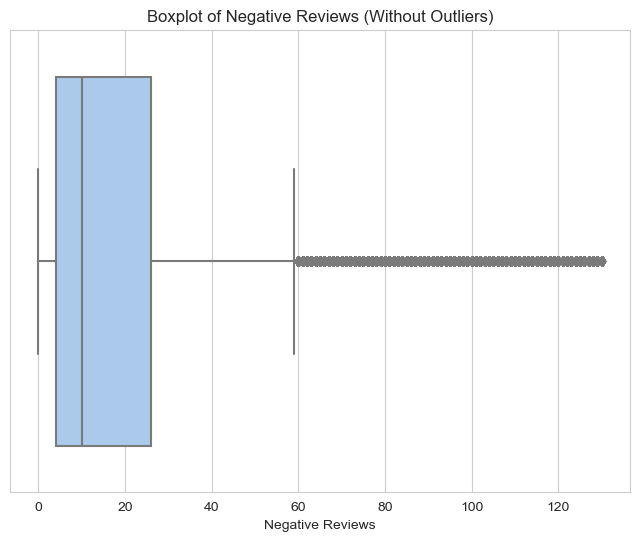

In [42]:
Q1 = new_data['negative_reviews'].quantile(0.25)
Q3 = new_data['negative_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = new_data[(new_data['negative_reviews'] >= lower_bound) & (new_data['negative_reviews'] <= upper_bound)]

# Visualize the filtered negative_reviews using a histogram
plt.figure(figsize=(10, 6))
sb.histplot(filtered_data['negative_reviews'], kde=True, bins=20)
plt.title('Distribution of Negative Reviews (Without Outliers)')
plt.xlabel('Negative Reviews')
plt.ylabel('Frequency')
plt.show()

# Visualize the filtered negative_reviews using a boxplot
plt.figure(figsize=(8, 6))
sb.boxplot(x=filtered_data['negative_reviews'])
plt.title('Boxplot of Negative Reviews (Without Outliers)')
plt.xlabel('Negative Reviews')
plt.show()

## Visualisation for positive review rate

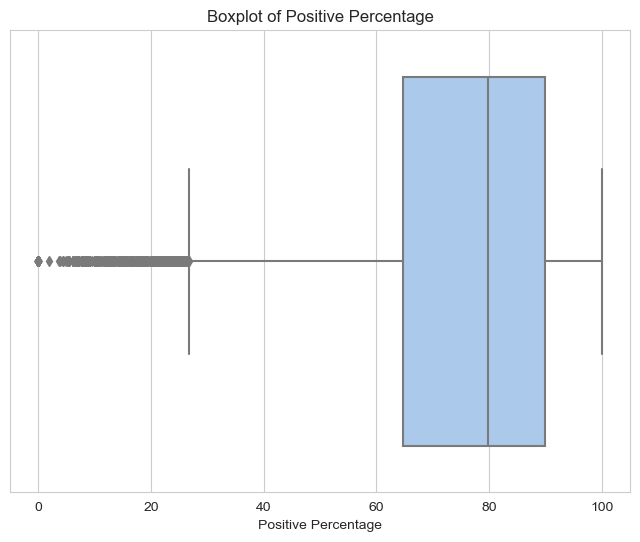

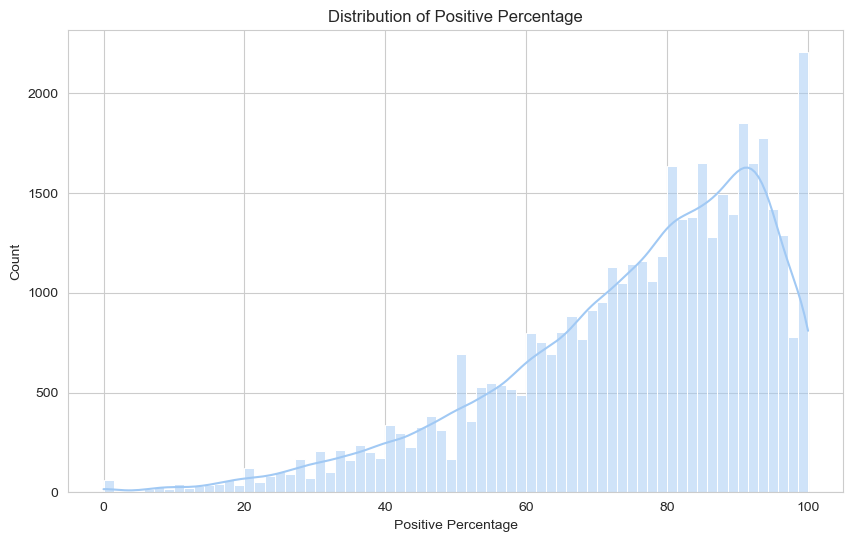

In [43]:
# Boxplot for positive_percentage
plt.figure(figsize=(8, 6))
sb.boxplot(x=new_data['positive_percentage'])
plt.title('Boxplot of Positive Percentage')
plt.xlabel('Positive Percentage')
plt.show()

# Histogram for positive_percentage
plt.figure(figsize=(10, 6))
sb.histplot(new_data['positive_percentage'], kde=True)  # Set kde to True if you want a density plot on top
plt.title('Distribution of Positive Percentage')
plt.xlabel('Positive Percentage')
plt.ylabel('Count')
plt.show()

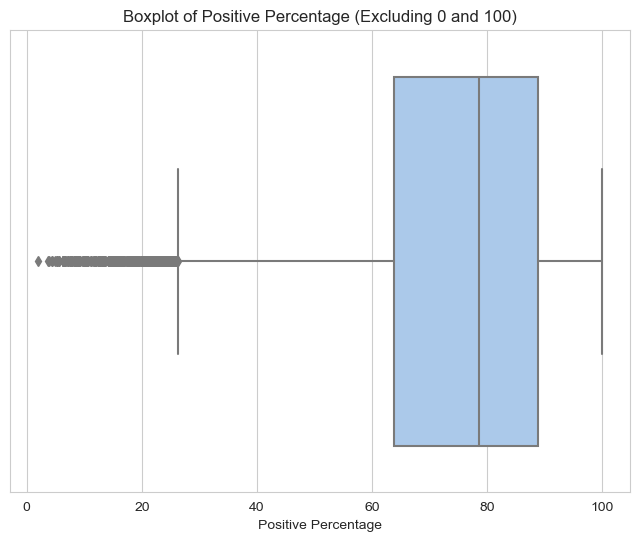

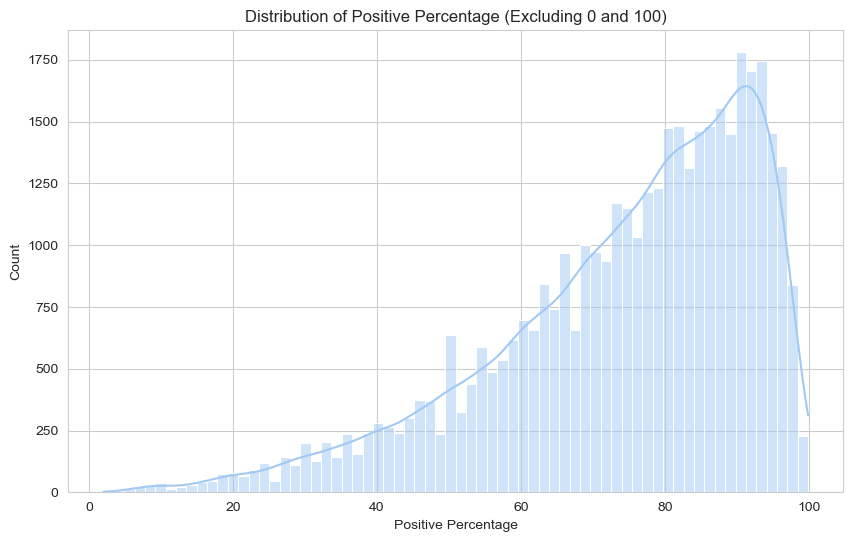

In [44]:
filtered_data = new_data[(new_data['positive_percentage'] > 0) & (new_data['positive_percentage'] < 100)]

# Boxplot for positive_percentage
plt.figure(figsize=(8, 6))
sb.boxplot(x=filtered_data['positive_percentage'])
plt.title('Boxplot of Positive Percentage (Excluding 0 and 100)')
plt.xlabel('Positive Percentage')
plt.show()

# Histogram for positive_percentage
plt.figure(figsize=(10, 6))
sb.histplot(filtered_data['positive_percentage'], kde=True)  # Set kde to True if you want a density plot on top
plt.title('Distribution of Positive Percentage (Excluding 0 and 100)')
plt.xlabel('Positive Percentage')
plt.ylabel('Count')
plt.show()

## Visualisation for review rate

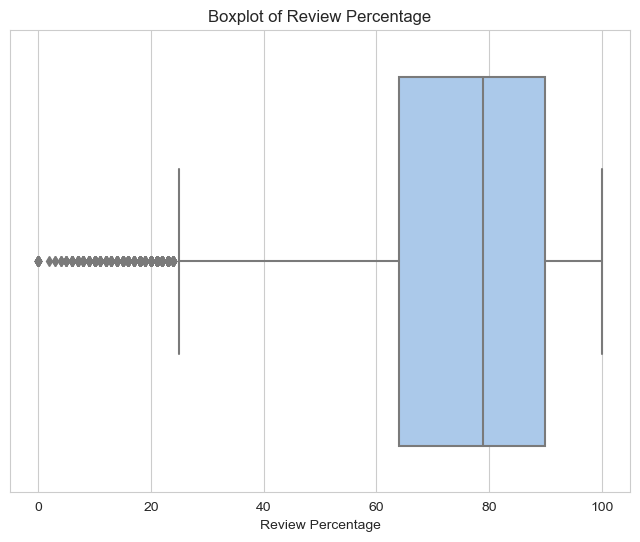

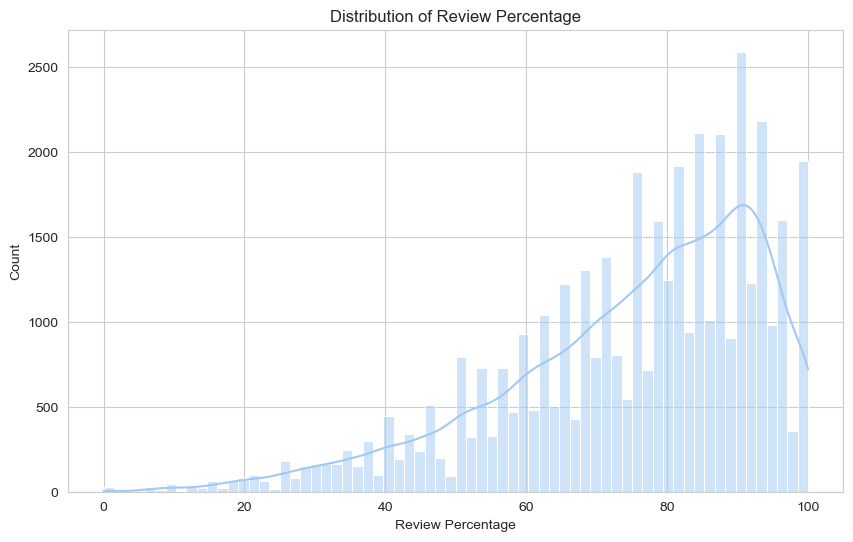

In [45]:
plt.figure(figsize=(8, 6))
sb.boxplot(x=new_data['review_percentage'])
plt.title('Boxplot of Review Percentage')
plt.xlabel('Review Percentage')
plt.show()

# Histogram for review_percentage
plt.figure(figsize=(10, 6))
sb.histplot(new_data['review_percentage'], kde=True)  # Set kde to True if you want a density plot on top
plt.title('Distribution of Review Percentage')
plt.xlabel('Review Percentage')
plt.ylabel('Count')
plt.show()

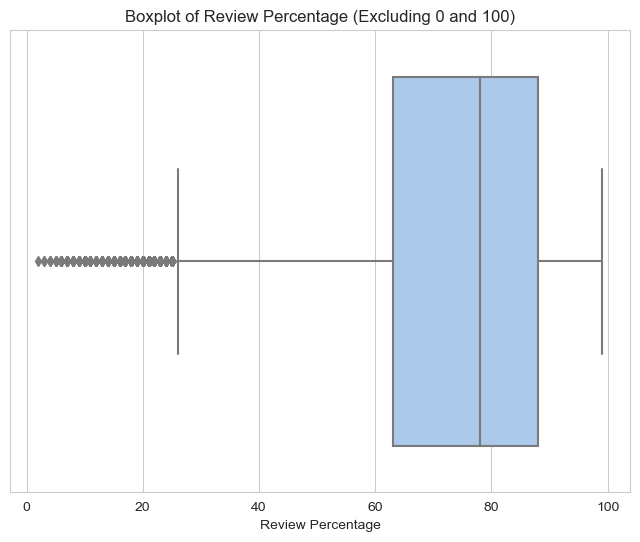

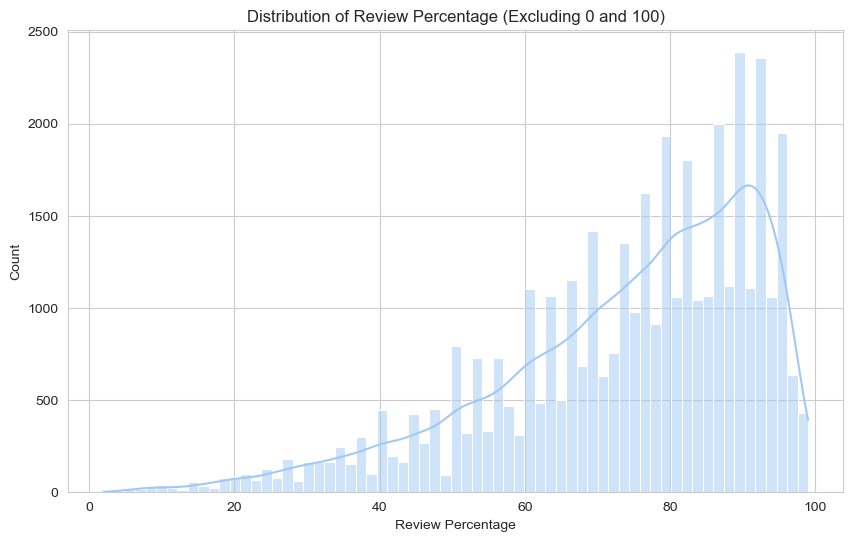

In [46]:
import seaborn as sns

filtered_data = new_data[(new_data['review_percentage'] > 0) & (new_data['review_percentage'] < 100)]

# Boxplot for review_percentage
plt.figure(figsize=(8, 6))
sb.boxplot(x=filtered_data['review_percentage'])
plt.title('Boxplot of Review Percentage (Excluding 0 and 100)')
plt.xlabel('Review Percentage')
plt.show()

# Histogram for review_percentage
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['review_percentage'], kde=True)  # Set kde to True if you want a density plot on top
plt.title('Distribution of Review Percentage (Excluding 0 and 100)')
plt.xlabel('Review Percentage')
plt.ylabel('Count')
plt.show()

## Visualisation for peak player count

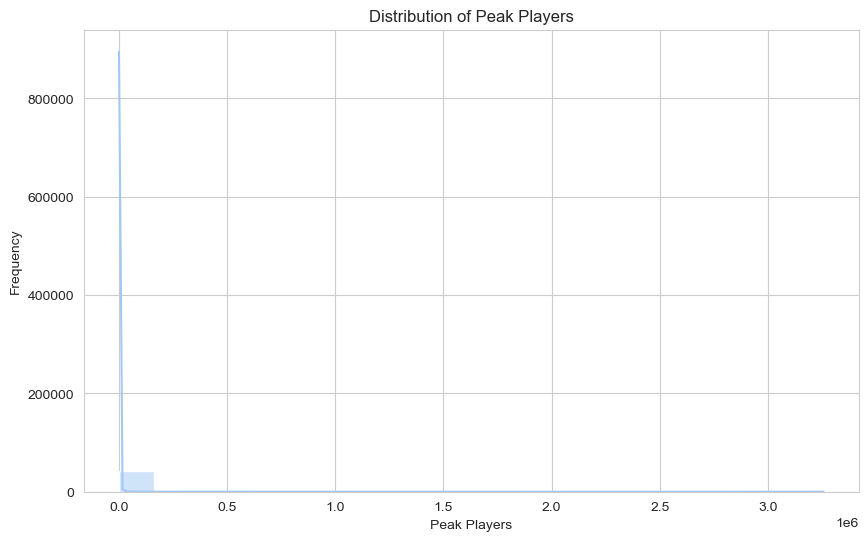

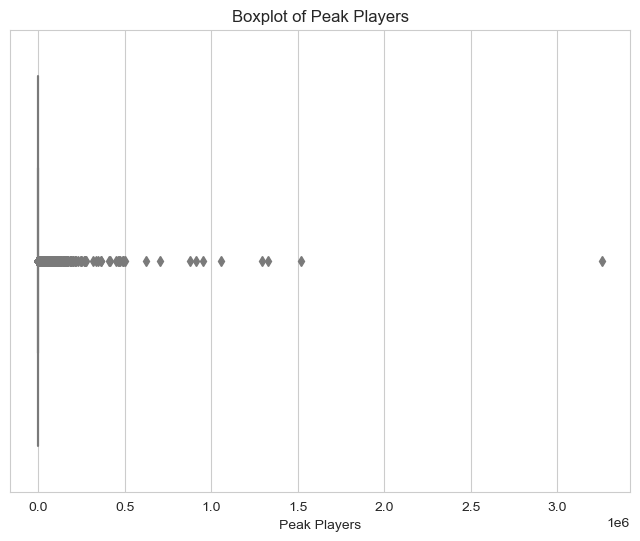

In [47]:
# Histogram for peak_players
plt.figure(figsize=(10, 6))
sns.histplot(new_data['peak_players'], kde=True, bins=20)
plt.title('Distribution of Peak Players')
plt.xlabel('Peak Players')
plt.ylabel('Frequency')
plt.show()

# Boxplot for peak_players
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_data['peak_players'])
plt.title('Boxplot of Peak Players')
plt.xlabel('Peak Players')
plt.show()

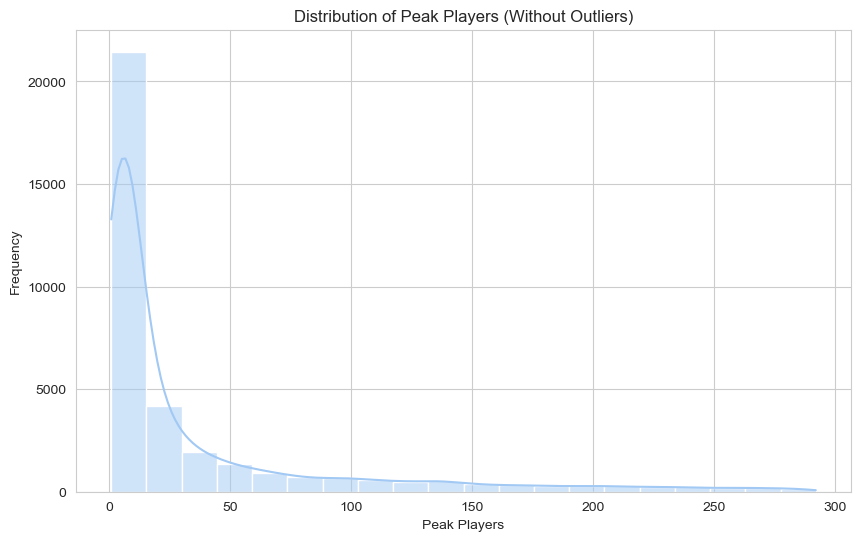

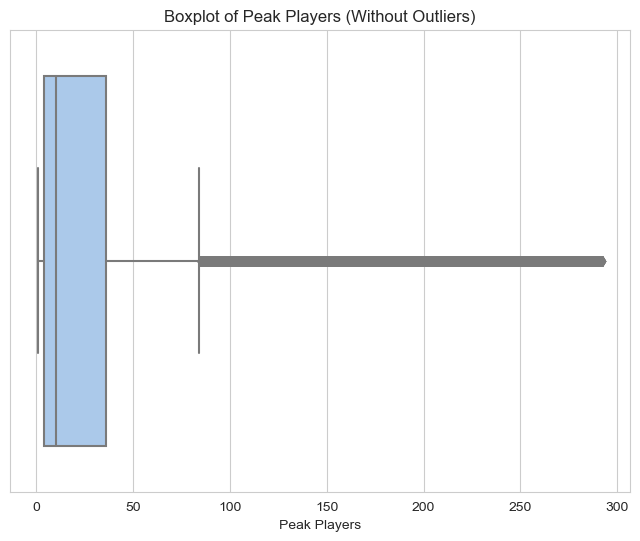

In [48]:
# Calculate the interquartile range (IQR) for peak_players
Q1 = new_data['peak_players'].quantile(0.25)
Q3 = new_data['peak_players'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = new_data[(new_data['peak_players'] >= lower_bound) & (new_data['peak_players'] <= upper_bound)]

# Visualize the filtered peak_players using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['peak_players'], kde=True, bins=20)
plt.title('Distribution of Peak Players (Without Outliers)')
plt.xlabel('Peak Players')
plt.ylabel('Frequency')
plt.show()

# Visualize the filtered peak_players using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['peak_players'])
plt.title('Boxplot of Peak Players (Without Outliers)')
plt.xlabel('Peak Players')
plt.show()

## Visualisation for Latest Date

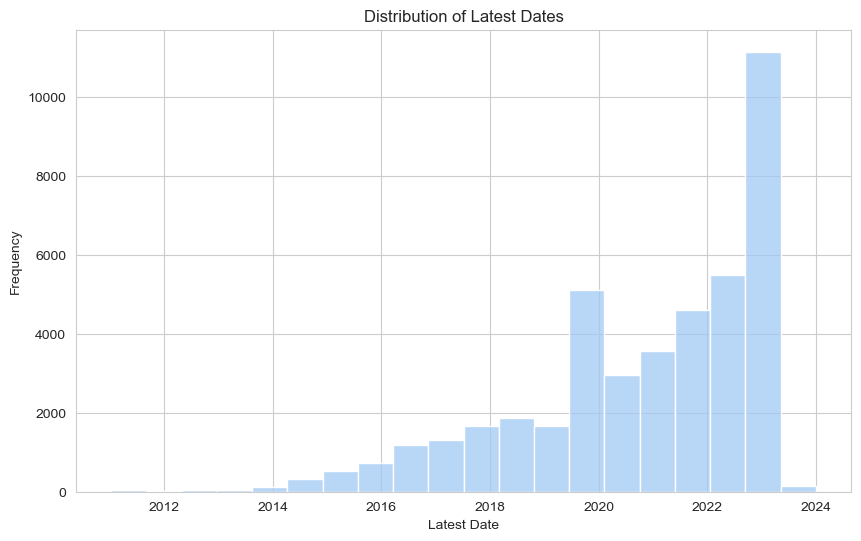

In [49]:
# Convert the "latest_date" column to datetime format
new_data['latest_date'] = pd.to_datetime(new_data['latest_date'])

# Plot a histogram of the "latest_date" column
plt.figure(figsize=(10, 6))
sns.histplot(new_data['latest_date'], bins=20)
plt.title('Distribution of Latest Dates')
plt.xlabel('Latest Date')
plt.ylabel('Frequency')
plt.show()

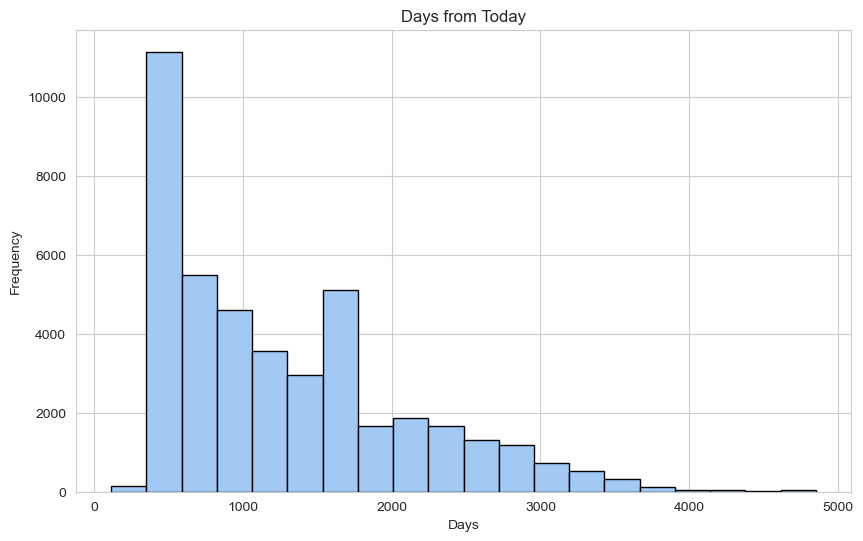

In [50]:
# Convert the "latest_date" column to datetime format
new_data['latest_date'] = pd.to_datetime(new_data['latest_date'])

# Find today's date
today = pd.Timestamp.now().normalize()  # Normalize to midnight

# Calculate the timedelta between each date and today
new_data['days_from_today'] = (today - new_data['latest_date']).dt.days

# Plot a histogram of the timedelta
plt.figure(figsize=(10, 6))
plt.hist(new_data['days_from_today'], bins=20, edgecolor='black')
plt.title('Days from Today')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

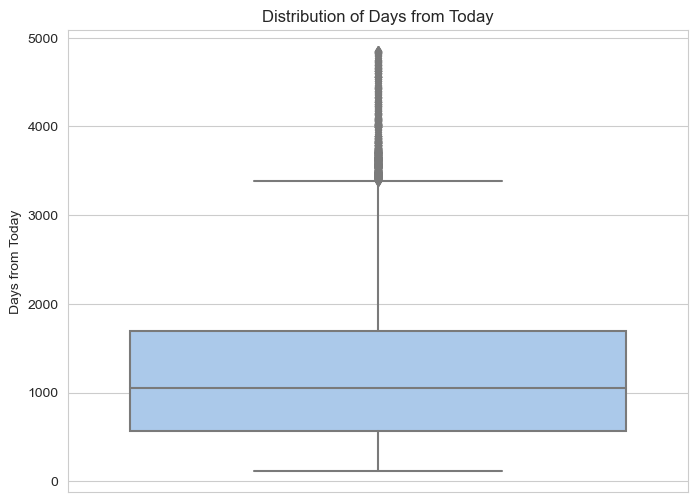

In [51]:

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=new_data['days_from_today'])
plt.title('Distribution of Days from Today')
plt.ylabel('Days from Today')
plt.show()


# Correlation Analysis

## correlation matrix

###### We want to remove the outliers from the data before carrying out the analysis so that the correlation given will be a more accurate representation of the majority of the data

In [52]:

# Columns to remove outliers from
columns_to_clean = ['rating', 'review_percentage','peak_players', 'positive_percentage', 'days_from_today']

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Create a new DataFrame to store filtered data
filtered_data = new_data.copy()

# Apply outlier removal to specified columns
for col in columns_to_clean:
    filtered_data = remove_outliers(filtered_data, col)

# Drop rows with missing values if needed
filtered_data = filtered_data.dropna()

# Merge filtered data back into original DataFrame
new_data_filtered = pd.concat([new_data, filtered_data])

# Drop duplicates after merging
new_data = new_data.drop_duplicates(keep=False)

                       rating  positive_reviews  negative_reviews  \
rating               1.000000          0.064064          0.021122   
positive_reviews     0.064064          1.000000          0.789612   
negative_reviews     0.021122          0.789612          1.000000   
total_reviews        0.059049          0.995185          0.845952   
review_percentage    0.938767          0.032110          0.000557   
peak_players         0.039249          0.579907          0.815241   
positive_percentage  0.952391          0.032385          0.000995   
days_from_today     -0.258267         -0.031960         -0.027345   

                     total_reviews  review_percentage  peak_players  \
rating                    0.059049           0.938767      0.039249   
positive_reviews          0.995185           0.032110      0.579907   
negative_reviews          0.845952           0.000557      0.815241   
total_reviews             1.000000           0.027994      0.634194   
review_percentage      

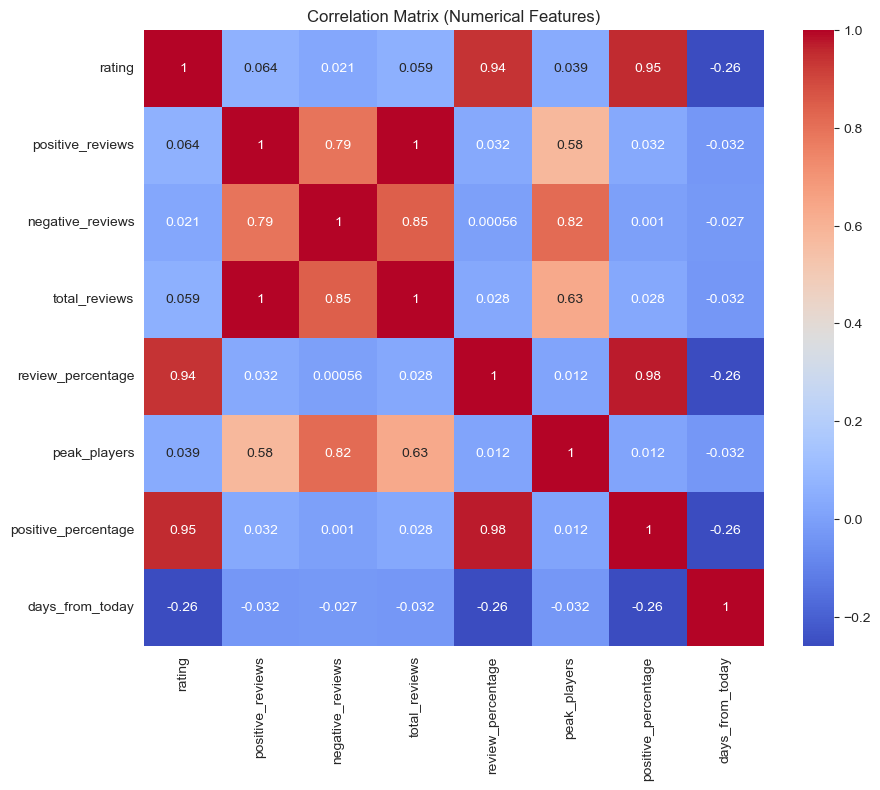

In [53]:
# Separate numerical and categorical columns
numerical_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = new_data.select_dtypes(include='object').columns

# Calculate correlation matrix for numerical columns
corr_matrix = new_data[numerical_cols].corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

D:\My apps\Anaconda3_new\newdownload\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


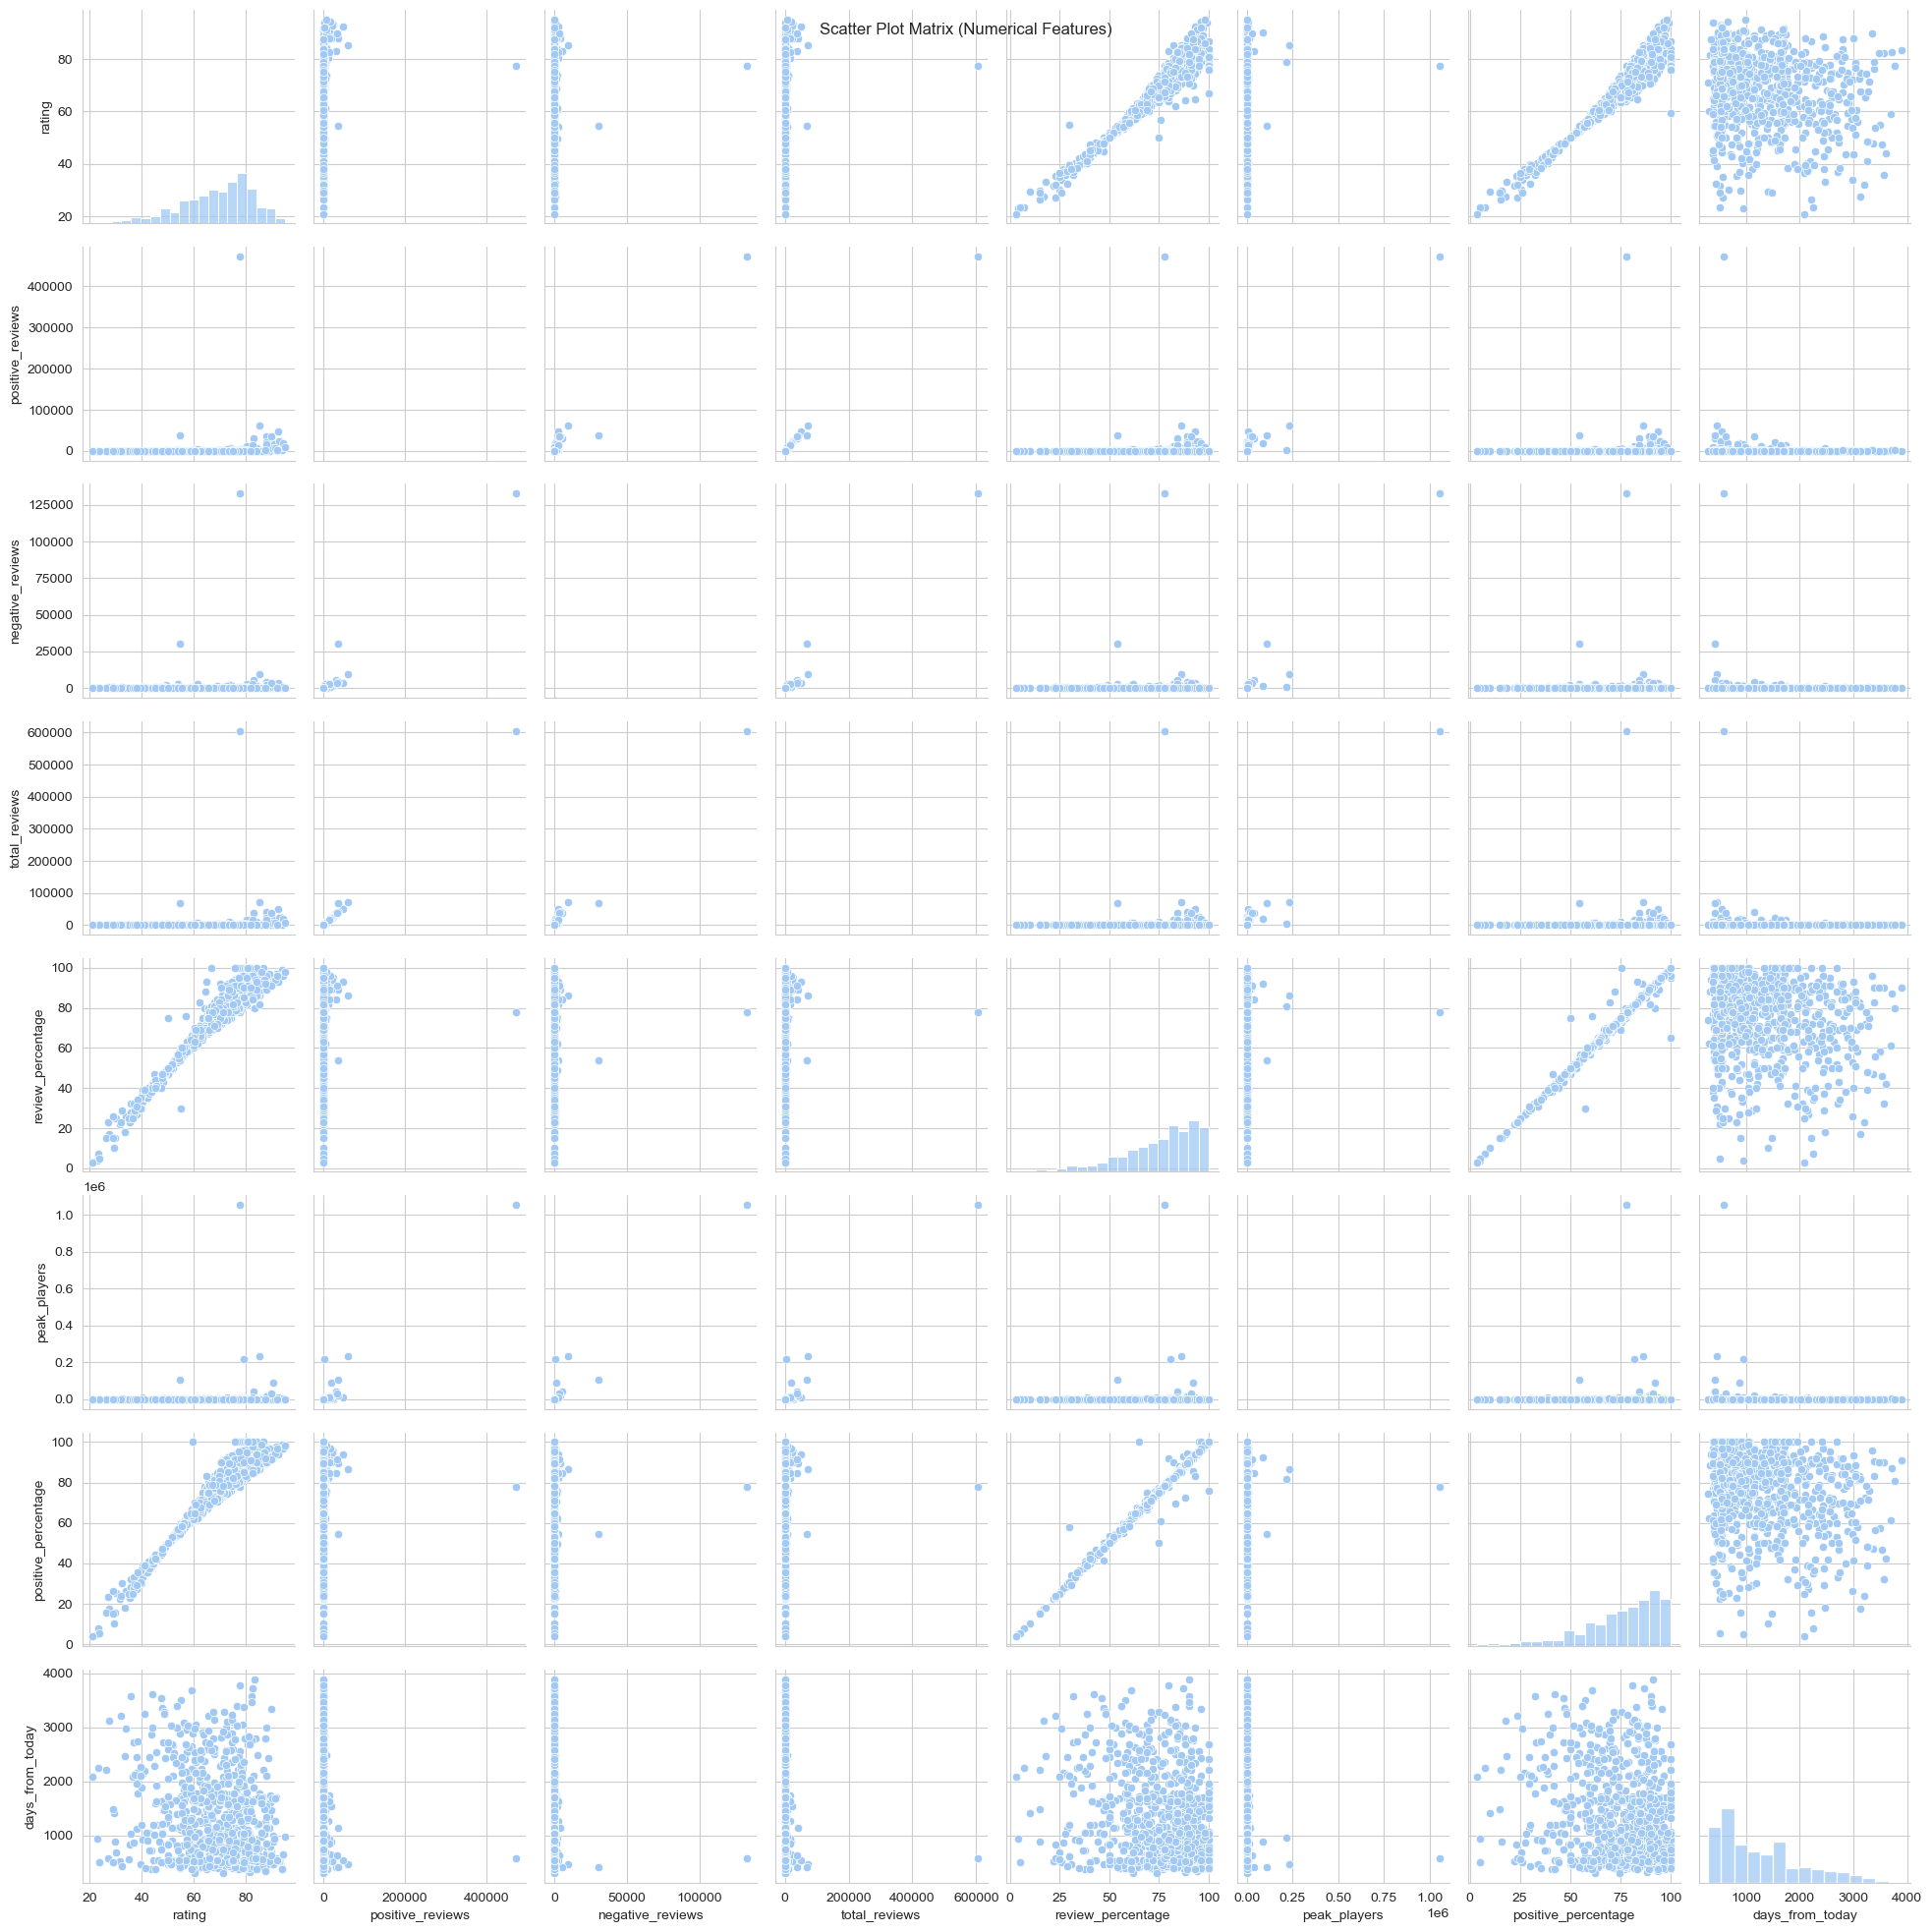

In [54]:
# runtime 40s, do not run

sampled_data = new_data.sample(frac=0.02, random_state=42)

# Separate numerical and categorical columns
numerical_cols = sampled_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numerical columns
corr_matrix = sampled_data[numerical_cols].corr()

# Plot the scatter plot matrix
sb.pairplot(sampled_data[numerical_cols])
plt.suptitle('Scatter Plot Matrix (Numerical Features)')
plt.show()

## Primary_genre against rating

In [55]:
new_data['primary_genre'].nunique()
new_data['primary_genre'].unique()

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Free to Play (37)',
       'Simulation (28)', 'Early Access (70)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Violent (73)',
       'Design & Illustration (53)', 'Sexual Content (71)',
       'Education (54)', 'Nudity (72)', 'Game Development (60)',
       'Gore (74)', 'Utilities (57)', 'Audio Production (52)',
       'Video Production (58)', 'Web Publishing (59)'], dtype=object)

<Axes: xlabel='rating', ylabel='primary_genre'>

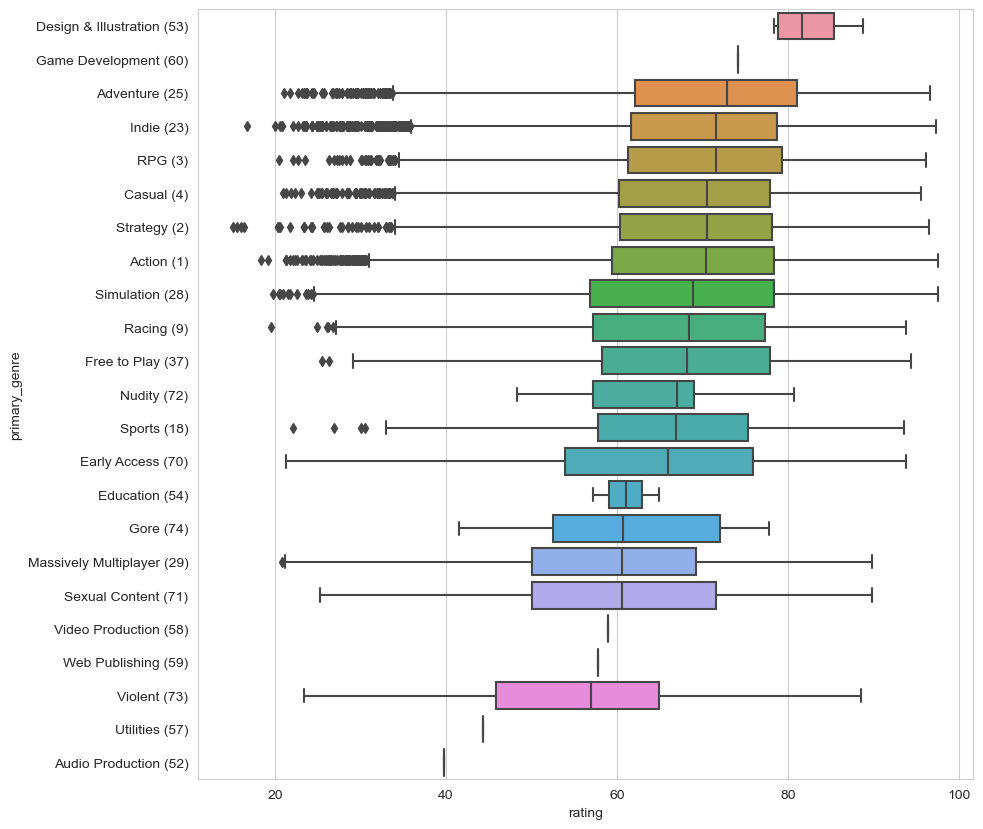

In [56]:
f=plt.figure(figsize=(10,10))
sb.boxplot(x='rating', y = 'primary_genre', orient='h', data = new_data,
          order= new_data.groupby('primary_genre')['rating'].median().sort_values(ascending=False).index)

###### We now want ot include genres that has a count of at least 100 games as we want to have a sufficiently large sample size. If the sample size is too small, the data might be biased and does not give a fair representation. As a result, we cannot draw any meaningful conclusion as well

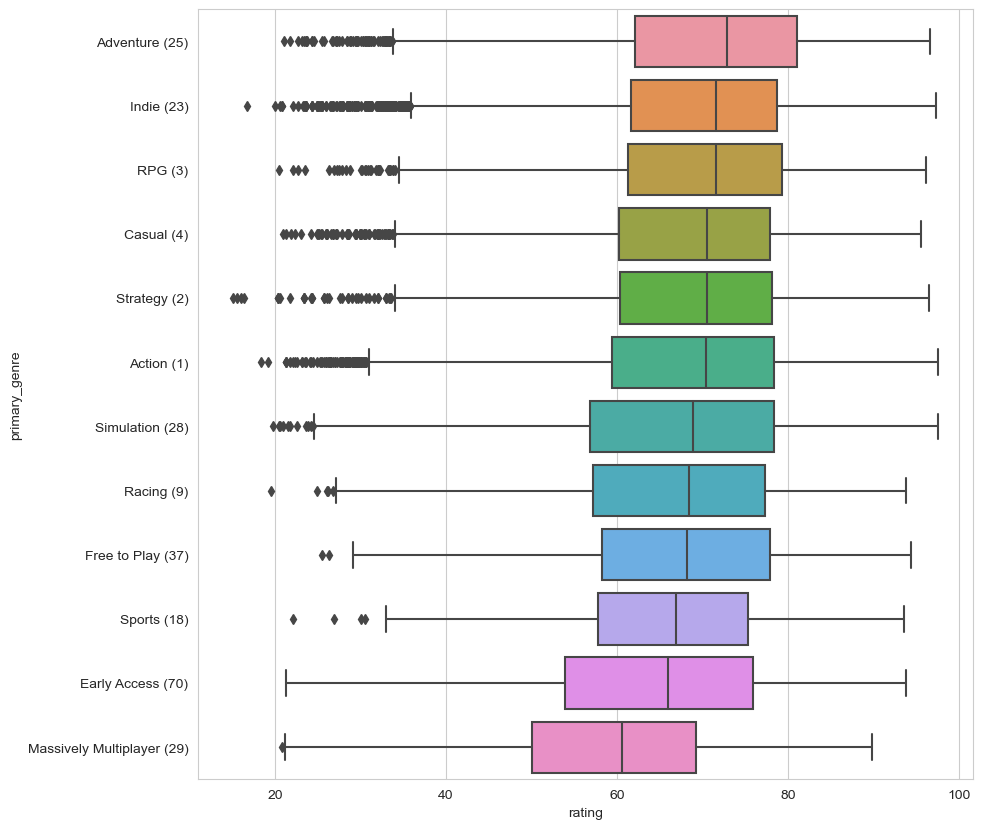

In [57]:
# Filter the data to include only genres that appear over 100 times
genre_counts = new_data['primary_genre'].value_counts()
popular_genres = genre_counts[genre_counts > 100].index
filtered_data = new_data[new_data['primary_genre'].isin(popular_genres)]

# Create the boxplot
plt.figure(figsize=(10,10))
sb.boxplot(x='rating', y='primary_genre', orient='h', data=filtered_data,
           order=filtered_data.groupby('primary_genre')['rating'].median().sort_values(ascending=False).index)

# Display the plot
plt.show()

## Store_genres against rating

In [58]:
## creating separate dataframe for visualisation of store_genres against rating

storerating = pd.DataFrame(new_data[["rating", "store_genres"]])

#splitting the store_genres into different columns
storerating['store_genres'] = storerating['store_genres'].str.split(',')
maxnum_genres = storerating['store_genres'].apply(len).max()# Get the maximum number of genres in any row

for i in range(maxnum_genres):
    storerating[f'Genre_{i+1}'] = storerating['store_genres'].str[i].str.split('(').str[0].str.strip()

# Drop the original 'Genres' column
storerating.drop(columns=['store_genres'], inplace=True)

print(storerating)

       rating   Genre_1       Genre_2 Genre_3     Genre_4 Genre_5 Genre_6  \
0       96.39    Action         Indie     NaN         NaN     NaN     NaN   
1       95.75    Action     Adventure     NaN         NaN     NaN     NaN   
2       95.54    Casual  Free to Play   Indie  Simulation     NaN     NaN   
3       95.39    Casual  Free to Play   Indie         NaN     NaN     NaN   
4       95.09    Action           NaN     NaN         NaN     NaN     NaN   
...       ...       ...           ...     ...         ...     ...     ...   
67556   71.18  Strategy           NaN     NaN         NaN     NaN     NaN   
67557   69.50  Strategy           NaN     NaN         NaN     NaN     NaN   
67563   67.82  Strategy           NaN     NaN         NaN     NaN     NaN   
67564   67.73  Strategy           NaN     NaN         NaN     NaN     NaN   
67569   50.27  Strategy           NaN     NaN         NaN     NaN     NaN   

      Genre_7 Genre_8 Genre_9 Genre_10 Genre_11 Genre_12  
0         NaN   

###### We store the rating in long format from wide in order to reduce the number of columns needed

<Axes: xlabel='rating', ylabel='store_genres'>

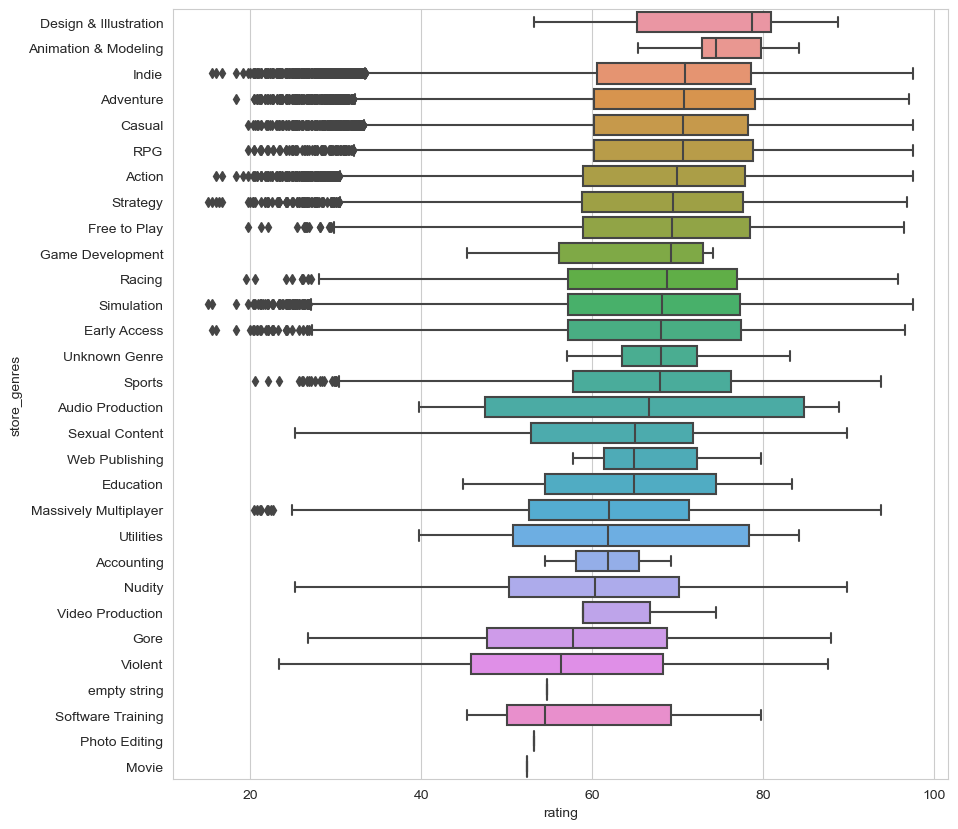

In [59]:
#Melt the dataframe to have a separate row for each rating-genre pair
melted_storerating = pd.melt(storerating, id_vars=['rating'], value_vars=['Genre_1', 'Genre_2', 'Genre_3', 'Genre_4',
                                                       'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8',
                                                       'Genre_9', 'Genre_10', 'Genre_11'],
                    value_name='store_genres')

# Drop rows with NaN values in the store_genres column
melted_storerating.dropna(subset=['store_genres'], inplace=True)

f=plt.figure(figsize=(10,10))
sb.boxplot(x='rating', y = 'store_genres', orient='h', data = melted_storerating,
          order= melted_storerating.groupby('store_genres')['rating'].median().sort_values(ascending=False).index)

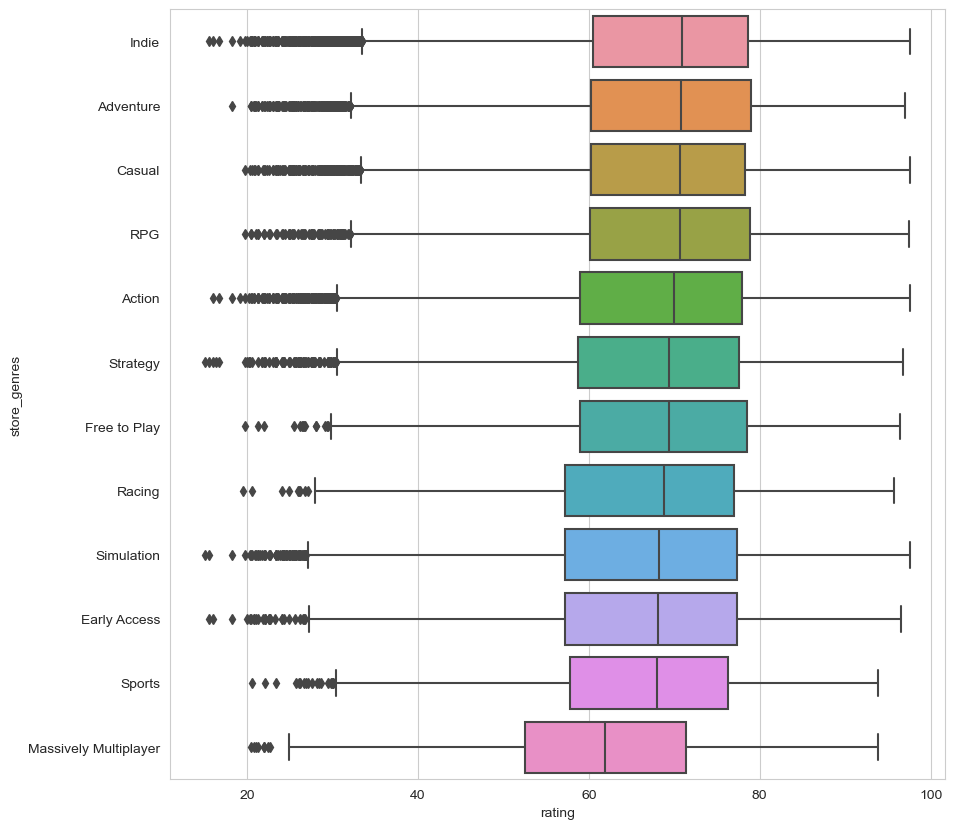

In [60]:
# Count the occurrences of each genre
genre_counts = melted_storerating['store_genres'].value_counts()

# Filter genres that appear over 500 times
popular_genres = genre_counts[genre_counts > 500].index

# Filter the melted dataframe to include only rows with popular genres
filtered_melted_storerating = melted_storerating[melted_storerating['store_genres'].isin(popular_genres)]

# Create the boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x='rating', y='store_genres', orient='h', data=filtered_melted_storerating,
            order=filtered_melted_storerating.groupby('store_genres')['rating'].median().sort_values(ascending=False).index)

# Display the plot
plt.show()


## Publisher against rating

In [61]:
print(new_data['publisher'].unique())

#creating new dataframe with only publisher and rating columns
publisherrating = pd.DataFrame(new_data[["rating", "publisher"]])

#creating dataframe with distinct publisher values and valuecounts of publisher
counts = publisherrating['publisher'].value_counts().reset_index().rename(columns={"index": "publisher", 0: "count"})

#creating dataframe with distinct publisher values and average rating of publisher
publisher_avgrating = publisherrating.groupby('publisher')['rating'].mean().reset_index()
publisher_avgrating = publisher_avgrating.sort_values(by='rating', ascending=False)


#creating merged dataframe
publisherratingcount = pd.merge(counts,publisher_avgrating, on='publisher', how='left')
print(publisherratingcount)

['Tour De Pizza' 'CAPCOM Co. Ltd.' 'SEGA' ... 'BioWare' 'Chronic Logic'
 'Ritual Entertainment']
                  publisher  count     rating
0              Laush Studio    123  66.926585
1           Choice of Games    120  67.566583
2               Square Enix    120  73.514833
3              Kagura Games    105  73.225333
4                THQ Nordic    102  71.398333
...                     ...    ...        ...
21226       Sooyan Software      1  57.100000
21227      ebb & flow games      1  57.060000
21228            RunicCodes      1  56.830000
21229           samcolserra      1  56.830000
21230  Ritual Entertainment      1  84.950000

[21231 rows x 3 columns]


correlation between number of games published by publishers and average rating is 0.01048198067720435


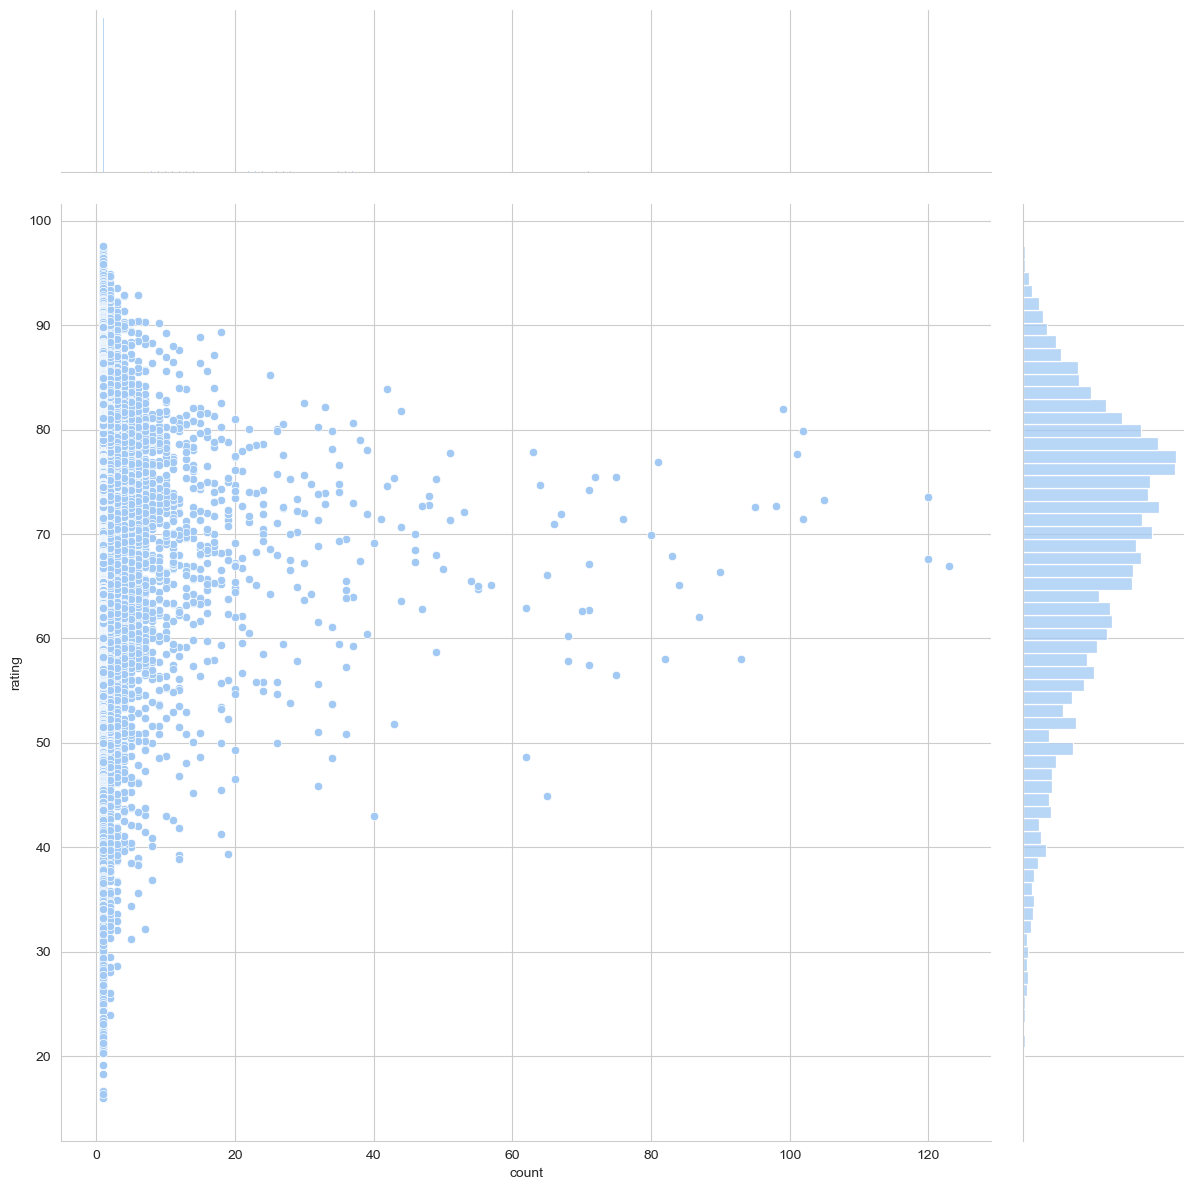

In [62]:
#plotting joinplot of number of games published by publishers ('count') against average rating of games published by each publisher ('rating')
sb.jointplot(data = publisherratingcount, x = "count", y = "rating", height = 12)
corr2 = publisherratingcount["count"].corr(publisherratingcount["rating"])
print("correlation between number of games published by publishers and average rating is", corr2)

#### No correlation between number of games published by publisher and average rating of games published by publisher due to the low correlation coefficient of -0.019 between the factors "count" and "rating".

## Developer against rating

In [63]:
print(new_data['developer'].unique())

#creating new dataframe with only publisher and rating columns
developerrating = pd.DataFrame(new_data[["rating", "developer"]])

#creating dataframe with distinct publisher values and valuecounts of publisher
countsd = developerrating['developer'].value_counts().reset_index().rename(columns={"index": "developer", 0: "count"})

#creating dataframe with distinct publisher values and average rating of publisher
developer_avgrating = developerrating.groupby('developer')['rating'].mean().reset_index()
developer_avgrating = developer_avgrating.sort_values(by='rating', ascending=False)


#creating merged dataframe
developerratingcount = pd.merge(countsd,developer_avgrating, on='developer', how='left')
print(developerratingcount)

['Tour De Pizza' 'CAPCOM Co. Ltd.' 'SEGA' ... 'Outerlight Ltd.'
 'Sonalysts' 'Deepred']
                      developer  count     rating
0               Choice of Games    120  67.566583
1      Laush Dmitriy Sergeevich    111  67.455766
2                        Dnovel     85  67.758706
3             Sokpop Collective     82  67.688659
4                   Tero Lunkka     80  57.873000
...                         ...    ...        ...
25337       Gorka Games Studios      1  57.260000
25338                上海沙界软件有限公司      1  57.260000
25339              Eggs w/ Legs      1  57.310000
25340       Orichalcum Pictures      1  57.310000
25341                   Deepred      1  69.500000

[25342 rows x 3 columns]


Correlation between number of games published by developer and average rating of games published: 0.0034429784682693276


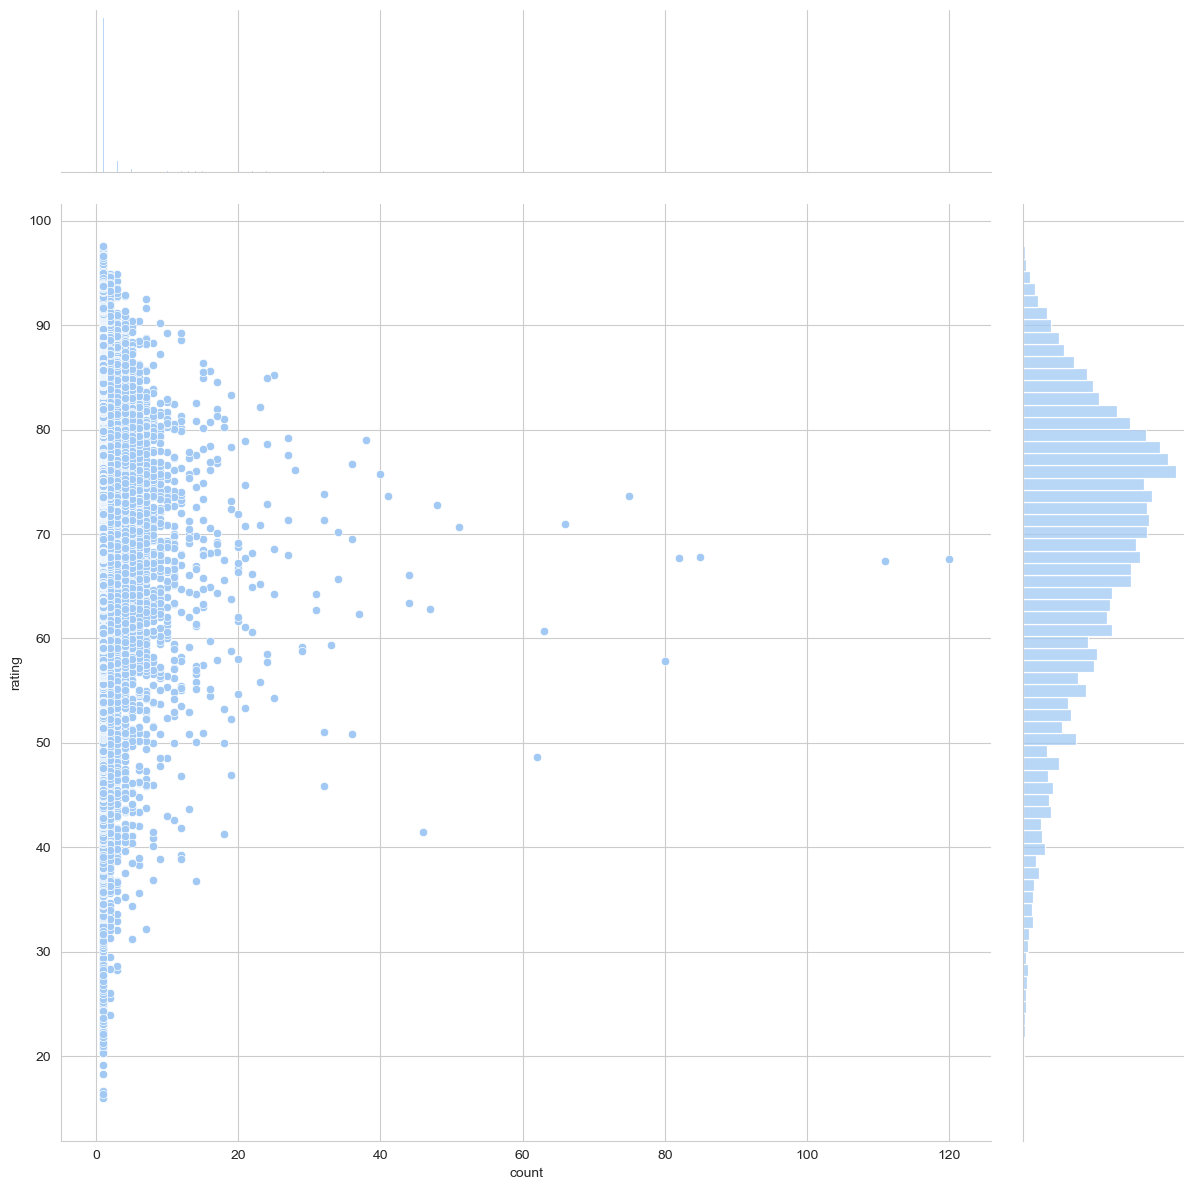

In [64]:
sb.jointplot(data = developerratingcount, x = "count", y = "rating", height = 12)
corr1 = developerratingcount["count"].corr(developerratingcount["rating"])
print("Correlation between number of games published by developer and average rating of games published:", corr1)

### There is no correlation between number of games developed by the developer and average rating of games developed by developer due to the low correlation coefficient value of -0.02 between the variables "count" and "rating".

## Visualisation for detected technologies against rating

<Axes: xlabel='rating', ylabel='detected_technologies'>

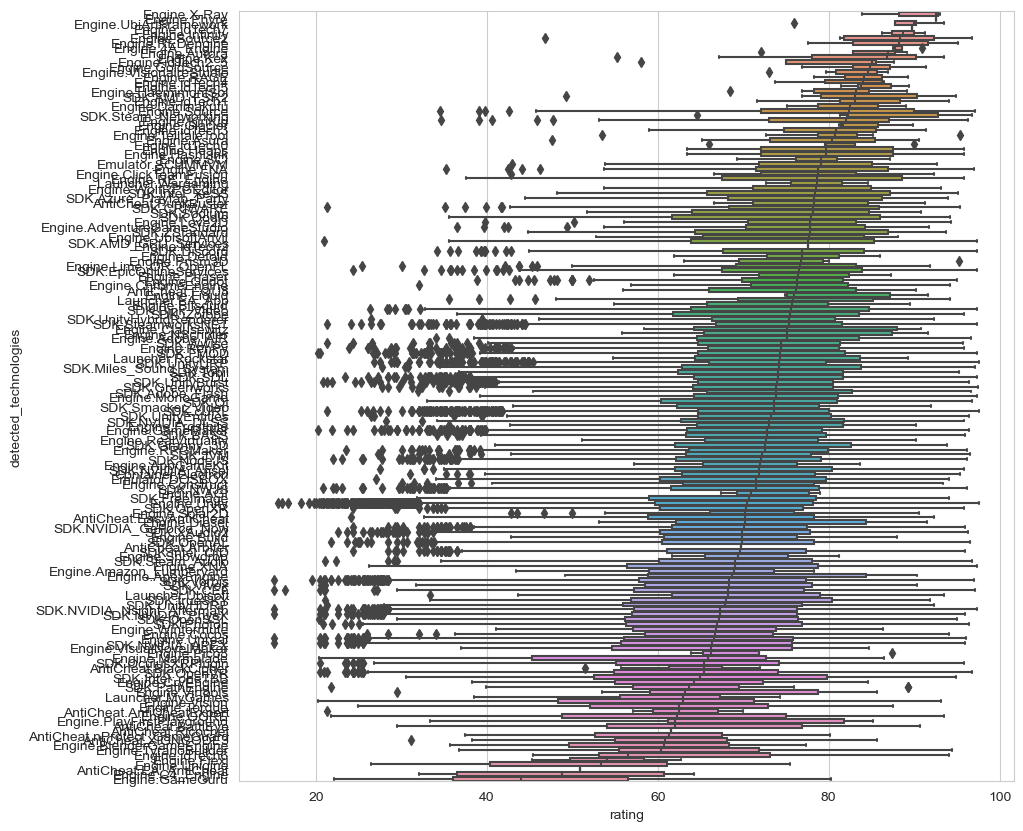

In [65]:
## creating separate dataframe for visualisation of detected_technologies against rating

techrating = pd.DataFrame(new_data[["rating", "detected_technologies"]])

#splitting the detected_technologies into different columns
techrating['detected_technologies'] = techrating['detected_technologies'].str.split(';')
maxnum_tech = techrating['detected_technologies'].apply(len).max()  # Get the maximum number of genres in any row
for i in range(maxnum_tech):
    techrating[f'Tech_{i+1}'] = techrating['detected_technologies'].str[i].str.split('(').str[0].str.strip()

# Drop the original 'detected_technologies' column
techrating.drop(columns=['detected_technologies'], inplace=True)

#Melt the dataframe to have a separate row for each rating-tech pair
melted_techrating = pd.melt(techrating, id_vars=['rating'], value_vars=['Tech_1', 'Tech_2', 'Tech_3', 'Tech_4',
                                                       'Tech_5', 'Tech_6', 'Tech_7', 'Tech_8',
                                                       'Tech_9', 'Tech_10', 'Tech_11', 'Tech_12', 'Tech_13', 'Tech_14'],
                    value_name='detected_technologies')

melted_techrating.dropna(subset=['detected_technologies'], inplace=True)


#Plot boxplot of different detected technologies against rating of games each detected technology was used for
f=plt.figure(figsize=(10,10))
sb.boxplot(x='rating', y = 'detected_technologies', orient='h', data = melted_techrating,
          order= melted_techrating.groupby('detected_technologies')['rating'].median().sort_values(ascending=False).index)

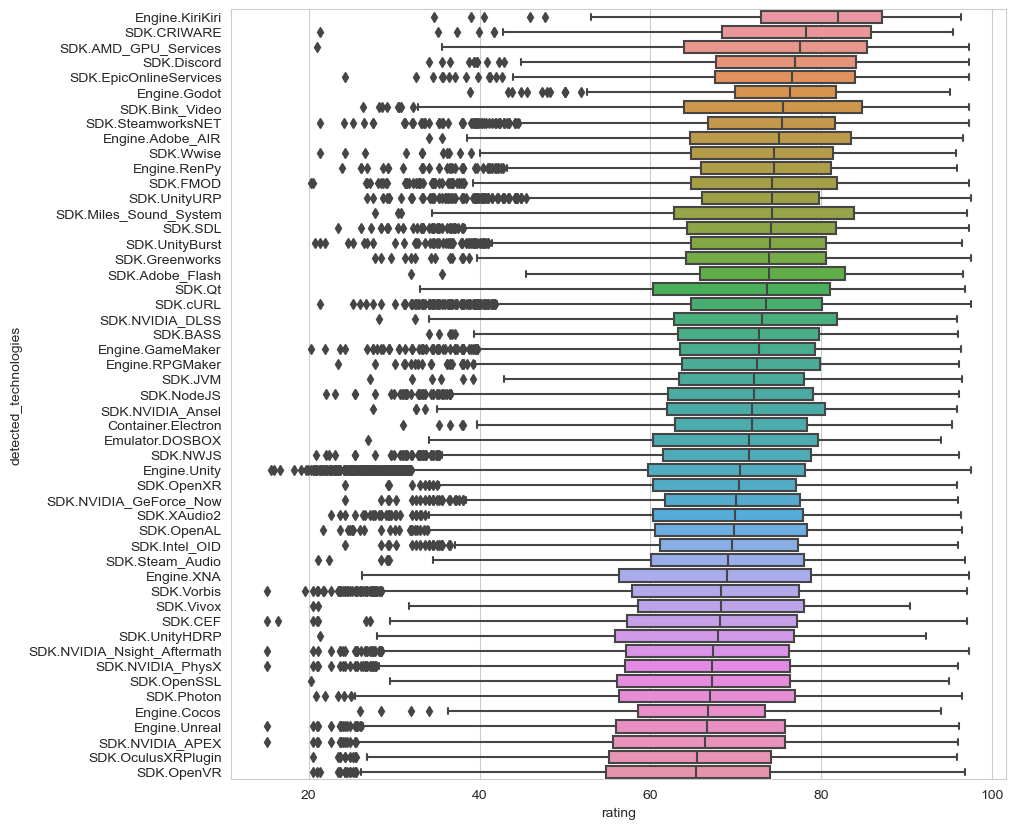

In [66]:
# Count the occurrences of each technology
tech_counts = melted_techrating['detected_technologies'].value_counts()

# Filter technologies that appear over 200 times
popular_technologies = tech_counts[tech_counts > 200].index

# Filter the melted dataframe to include only rows with popular technologies
filtered_melted_techrating = melted_techrating[melted_techrating['detected_technologies'].isin(popular_technologies)]

# Create the boxplot
plt.figure(figsize=(10,10))
sb.boxplot(x='rating', y='detected_technologies', orient='h', data=filtered_melted_techrating,
           order=filtered_melted_techrating.groupby('detected_technologies')['rating'].median().sort_values(ascending=False).index)

# Display the plot
plt.show()


## latest_date against rating

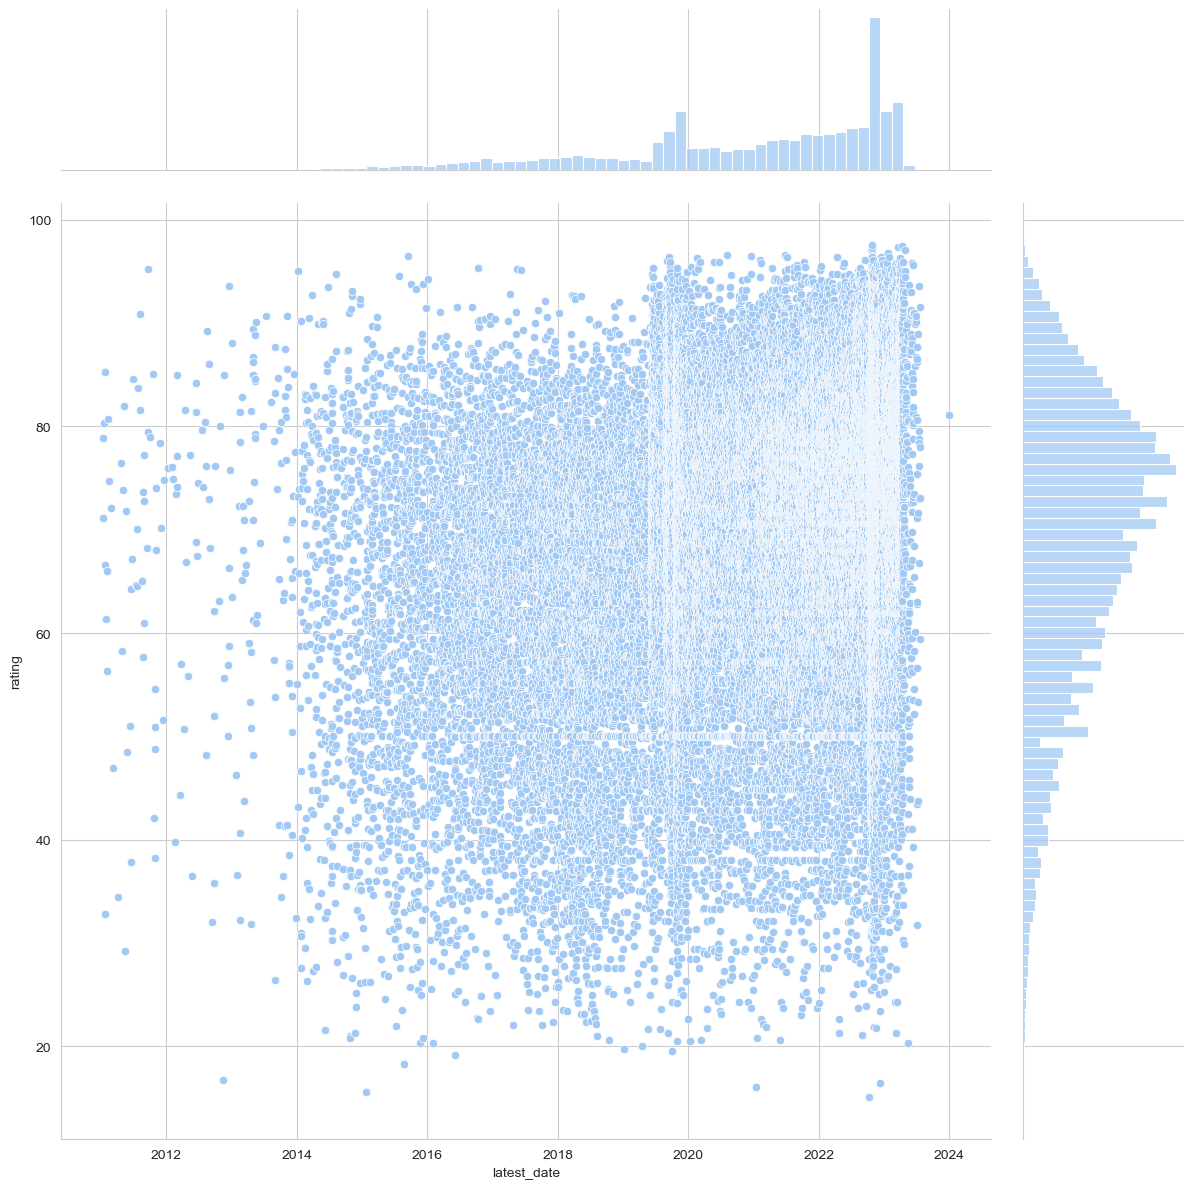

In [67]:
daterating = pd.DataFrame(new_data[["latest_date","rating"]])
daterating['latest_date'] = pd.to_datetime(daterating['latest_date'])
daterating = daterating.sort_values(by='latest_date')
daterating = daterating.reset_index(drop=True)

sb.jointplot(data = daterating, x = "latest_date", y = "rating", height = 12)

In [68]:
daterating['latest_date'] = daterating['latest_date'].astype('int64')
correlation = daterating['latest_date'].corr(daterating['rating'])

print("Correlation between latest date and rating:", correlation)

Correlation between latest date and rating: 0.25826718145838995


### There is no correlation between how recently the game was released/updated and rating of the game due to the low correlation coefficient value of 0.25 between the variables "recentdate" and "rating".

## Review percentage against rating

Correlation between review percentage and rating: 0.938766919066638


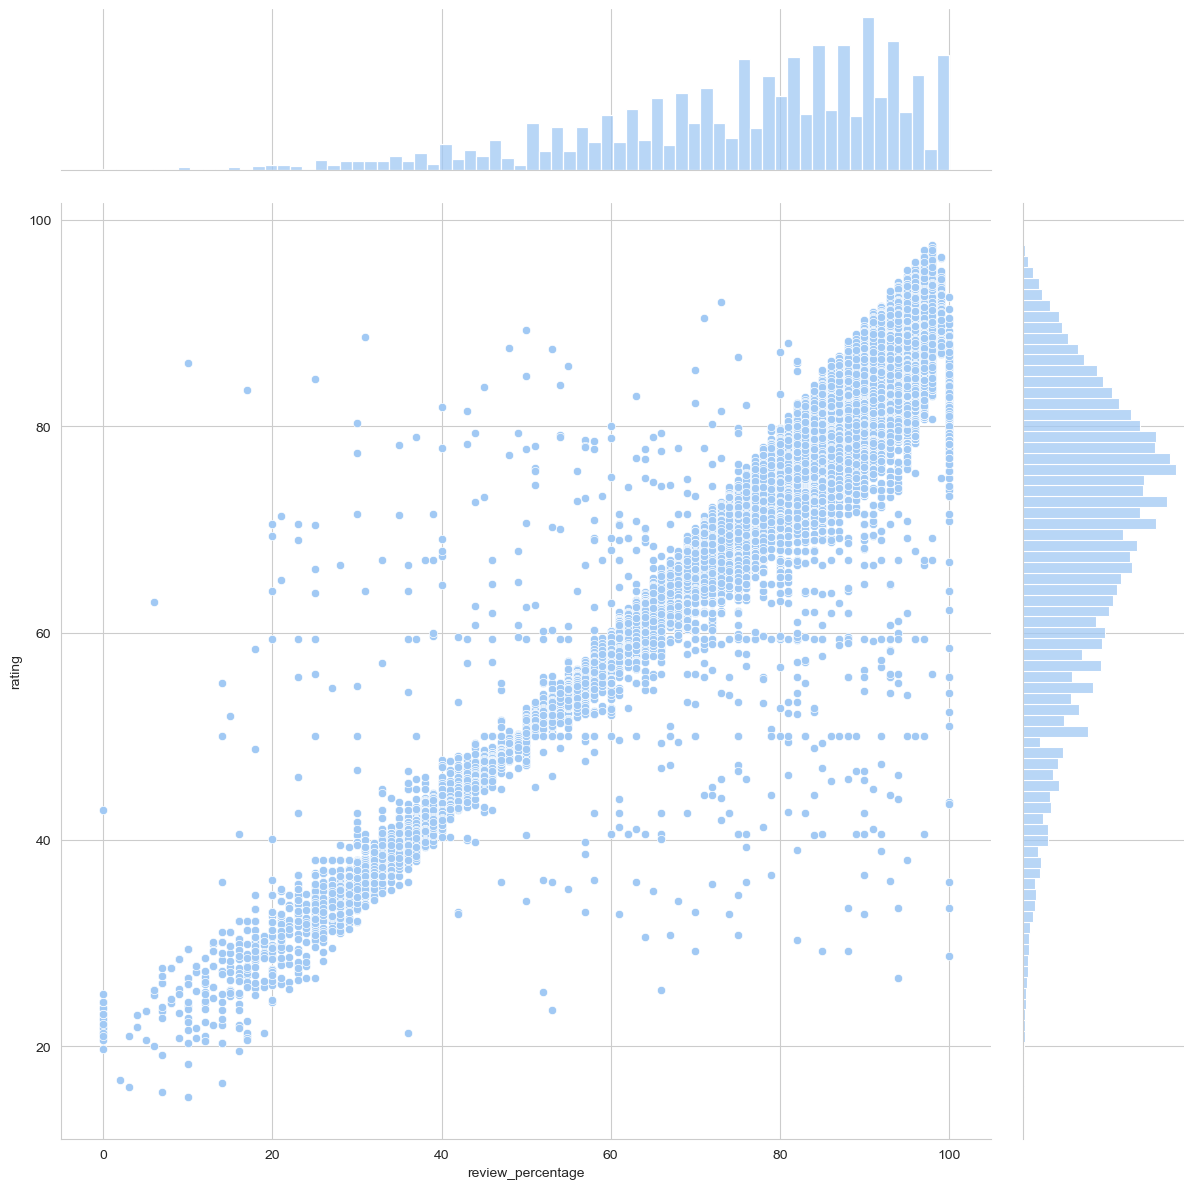

In [69]:
sb.jointplot(data = new_data, x = "review_percentage", y = "rating", height = 12)
corr4 = new_data["review_percentage"].corr(new_data["rating"])
print("Correlation between review percentage and rating:", corr4)

### There is high correlation between how review percentage of a game and rating of the game due to the high correlation coefficient value of 0.955 between the variables "review_percentage" and "rating".

## Positive review rate against rating

   positive_reviews  total_reviews  rating  positive_percentage
0             19807          20034   96.39            98.866926
1             61752          63368   95.75            97.449817
2             12643          12856   95.54            98.343186
3             11717          11926   95.39            98.247526
4             14152          14476   95.09            97.761813
Index(['game', 'rating', 'primary_genre', 'store_genres', 'publisher',
       'developer', 'detected_technologies', 'release', 'store_asset_mod_time',
       'positive_reviews', 'negative_reviews', 'total_reviews',
       'review_percentage', 'peak_players', 'latest_date',
       'positive_percentage', 'days_from_today'],
      dtype='object')
Correlation between positive review percentage and rating: 0.9523911879925885


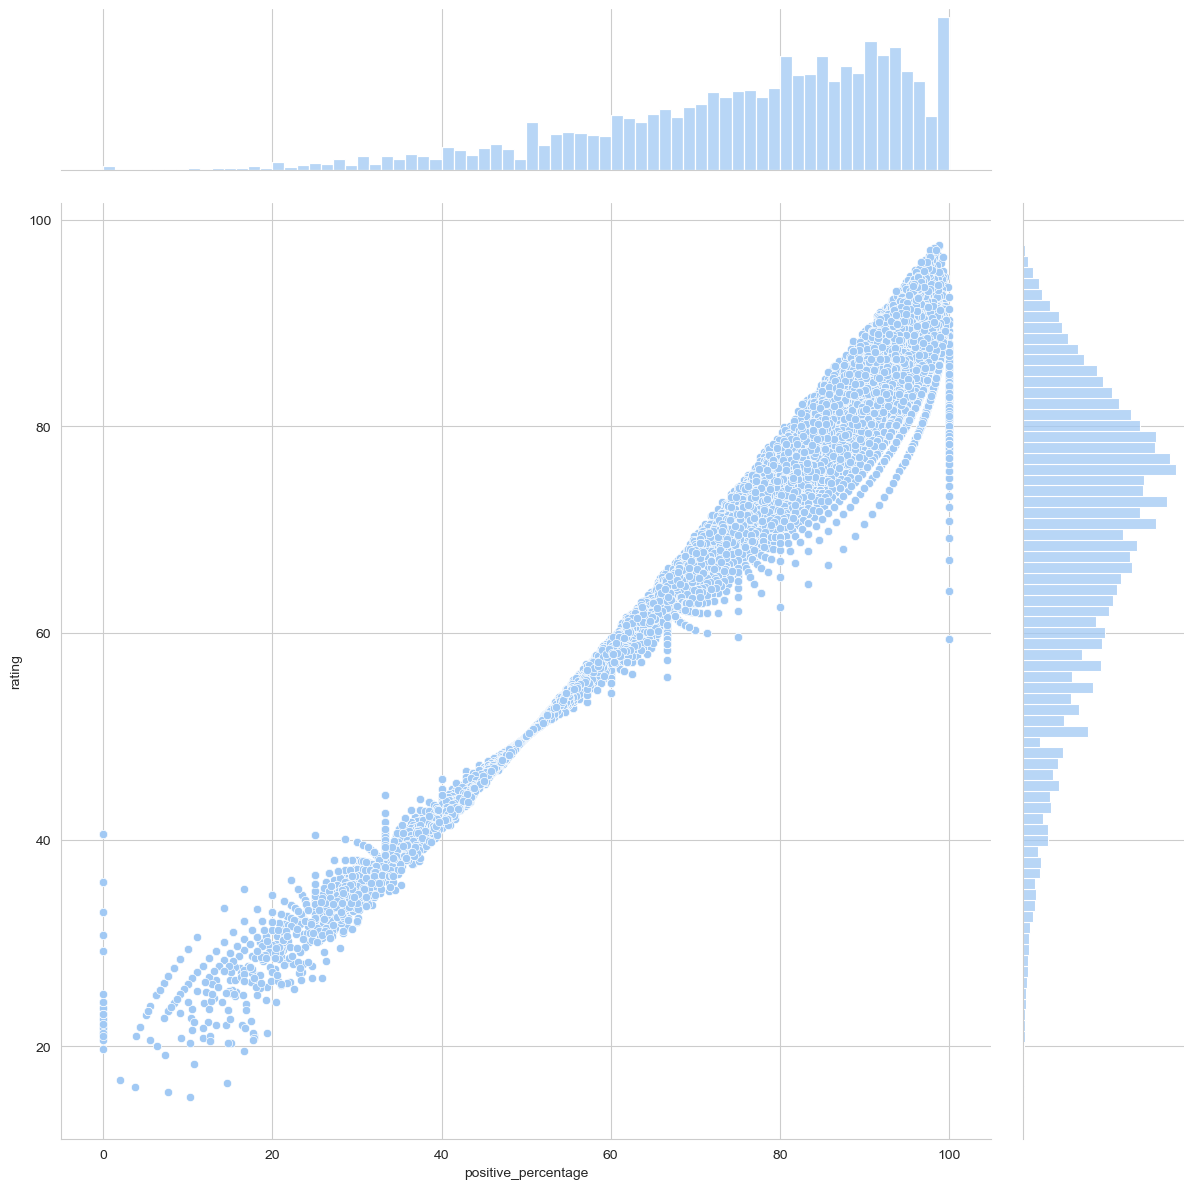

In [70]:
positiverating = pd.DataFrame(new_data[["positive_reviews","total_reviews","rating"]])
positiverating['positive_percentage'] = (positiverating['positive_reviews'] / positiverating['total_reviews']) * 100
print(positiverating.head())

print(new_data.columns)

sb.jointplot(data = positiverating, x = "positive_percentage", y = "rating", height = 12)
corr19 = positiverating["positive_percentage"].corr(positiverating["rating"])
print("Correlation between positive review percentage and rating:", corr19)

## Peak players against rating

In [71]:
#playersrating = pd.DataFrame(new_data[["peak_players","rating"]])

#sb.jointplot(data = playersrating, x = "peak_players", y = "rating", height = 12)
#corr20 = playersrating["peak_players"].corr(playersrating["rating"])
#print("Correlation between number of peak players and rating:", corr20)

# 4.Linear Regression


## Linear Regression for single variable against rating

#### We are using Explained Variance (R^2) and Mean Squred Error (MSE). The higher the R^2 value the better the model and the lower the MSE the better the model

### positive percentage to predict rating

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [73]:
# Mean Squared Error (MSE) function
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Create a Linear Regression object
linreg = LinearRegression()

# Assuming 'new_data' is your dataset and 'rating' is the target variable
# Splitting data into training and testing sets
train = new_data_filtered.sample(frac=0.8)
test = new_data_filtered.drop(train.index)

# Extracting features and target variable for training and testing sets
X_train = train[['positive_percentage']]  # Feature: positive_percentage
Y_train = train['rating']                  # Target: rating
X_test = test[['positive_percentage']]    # Feature: positive_percentage
Y_test = test['rating']                    # Target: rating

# Convert target variables to DataFrames if needed
rating_train = pd.DataFrame(Y_train)
rating_test = pd.DataFrame(Y_test)


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9072514352938859
Mean Squared Error (MSE) 	: 15.93142377120751

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9061428006826672
Mean Squared Error (MSE) 	: 22.077141949236957



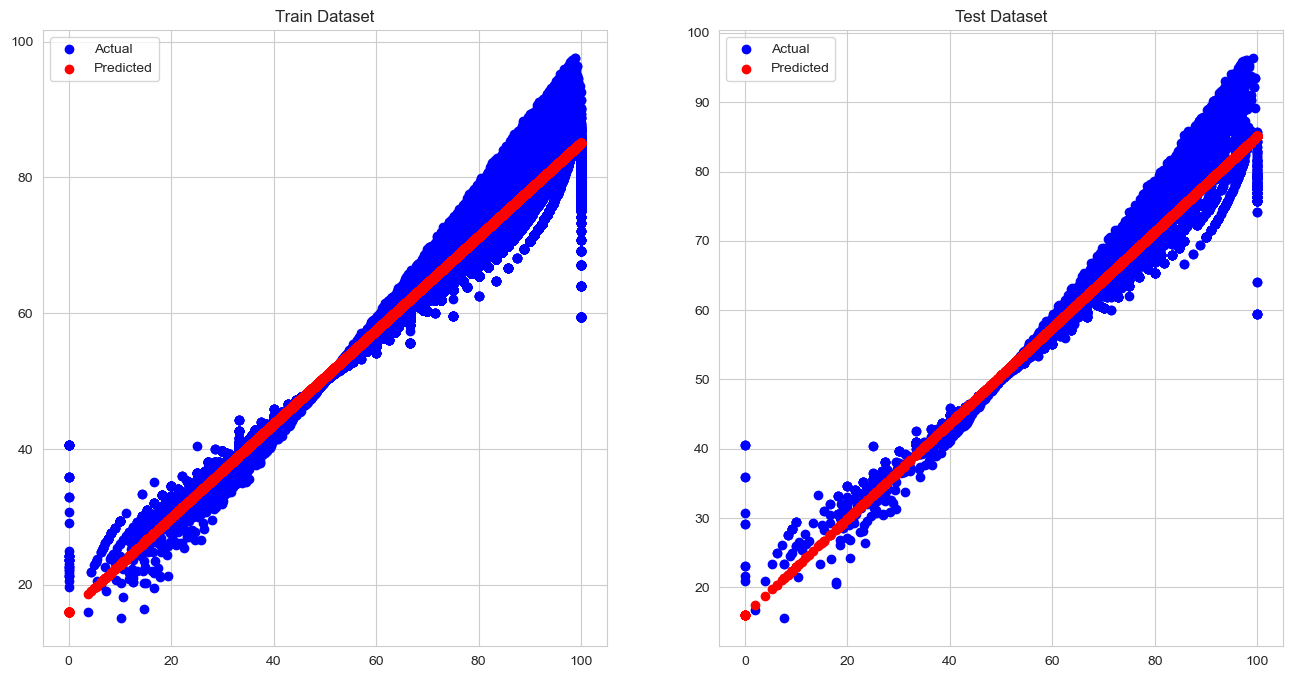

In [74]:
# Fit the linear regression model
linreg.fit(X_train, Y_train)

# Predict Y values corresponding to X for train and test datasets
Y_train_pred = linreg.predict(X_train)
Y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Train Dataset
axes[0].scatter(X_train, Y_train, label='Actual', color='blue')
axes[0].scatter(X_train, Y_train_pred, label='Predicted', color='red')
axes[0].set_title('Train Dataset')
axes[0].legend()

# Plot for Test Dataset
axes[1].scatter(X_test, Y_test, label='Actual', color='blue')
axes[1].scatter(X_test, Y_test_pred, label='Predicted', color='red')
axes[1].set_title('Test Dataset')
axes[1].legend()

plt.show()


## Linear Regression of all numeric variables (multi-variate linear regression)

Intercept of Regression 	: b =  [-8.66195007]
Coefficients of Regression 	: a =  [[1.18495276e-05 3.52471878e-01 3.24720873e-01 1.63789117e-17]]

            Predictors  Coefficients
0         peak_players  1.184953e-05
1  positive_percentage  3.524719e-01
2    review_percentage  3.247209e-01
3          latest_date  1.637891e-17



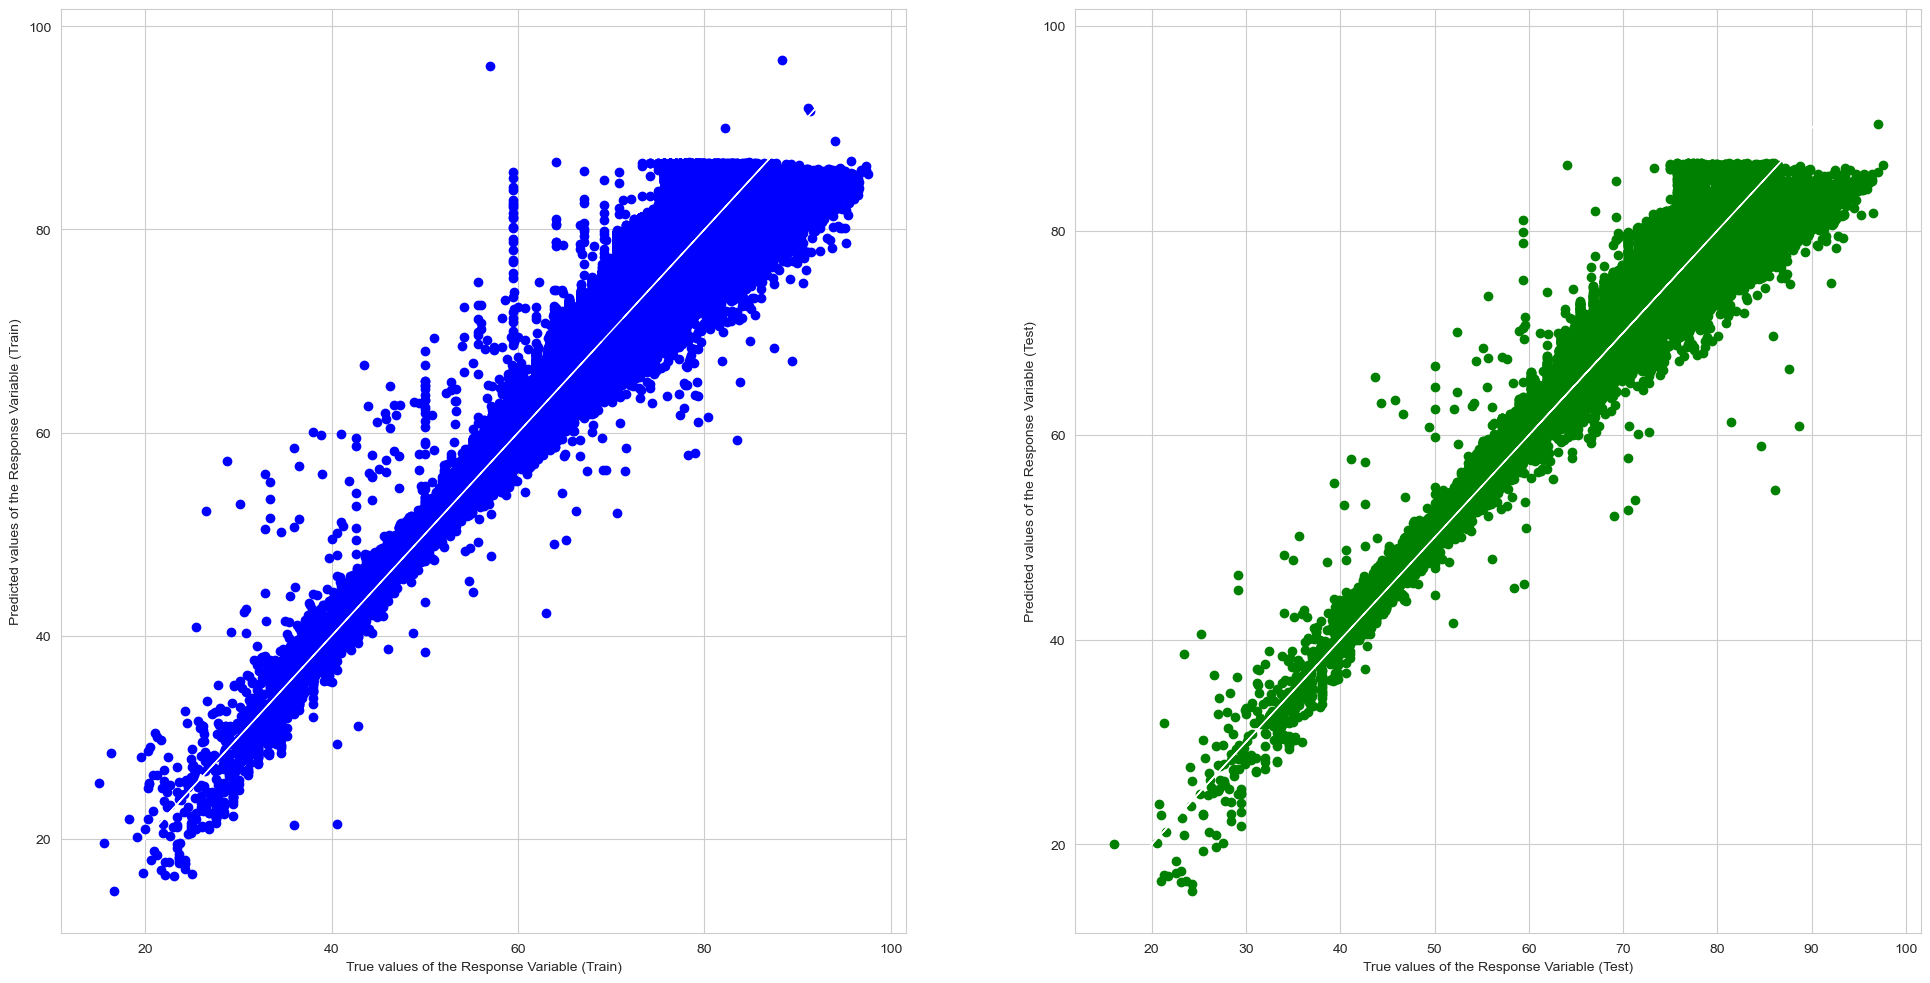

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9016764254544483
Mean Squared Error (MSE) 	: 18.737316248754766

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.901200907440687
Mean Squared Error (MSE) 	: 18.873276071180086



In [75]:
#changing latest_date from date-time to float values
new_data['latest_date'] = new_data['latest_date'].astype('int64')
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(new_data["rating"])
X = pd.DataFrame(new_data[["peak_players", "positive_percentage", "review_percentage", "latest_date"]])




# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


###### We discovered that through the use of multivariable linear regression, we discovered that the goodness of fit via the R^2 value is 0.89, corrected to 2 decimal places for both the train and test dataset and the predictiona accuracy is based on MSE which is also quite low at around 20-21, corrected to 2 significant figures. Overall, the goodness of fit is good.

## Using linear regression model to predict rating of existing games in dataset


In [76]:
data_pred = new_data[new_data["game"].isin(["The Murder of Sonic the Hedgehog","Postmouse", "Hi-Fi RUSH", "Barotrauma","Pleh!", "GROSS","Vegas: Make It Big","Shattered Union"])]
predictors = ["peak_players", "positive_percentage", "review_percentage", "latest_date"]
# Extract Predictors for Prediction
X_pred = pd.DataFrame(data_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred = pd.DataFrame(y_pred, columns = ["Predicted Rating"], index = data_pred.index)
comparison = pd.concat([data_pred[["game", "rating"]], y_pred], axis = 1)

y_errs = 100 * abs(comparison["rating"] - comparison["Predicted Rating"]) / comparison["rating"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = data_pred.index)
comparison = pd.concat([comparison, y_errs], axis = 1)

comparison

game  rating  Predicted Rating      Error
2      The Murder of Sonic the Hedgehog   95.54         85.528268  10.479099
4                            Hi-Fi RUSH   95.09         84.902680  10.713345
28                           Barotrauma   90.99         81.611230  10.307473
85                                Pleh!   87.30         82.907054   5.032012
143                           Postmouse   85.18         80.561853   5.421633
672                               GROSS   77.70         77.049236   0.837535
67557                Vegas: Make It Big   69.50         67.578322   2.765005
67569                   Shattered Union   50.27         51.020322   1.492584

### Greater rate of error for games with higher ratings compared to games with lower ratings.

# 5. Machine Learning Models

## 5.1 Decision Tree


#### The use of classification tree is to determine whether review percentage can be used to predict the rating category. In which we split it into two categories, one that is above 80 and another below 80. As we believe that 80 out of 100 is the cut off for the game to be considered good.


Train Classification Accuracy: 0.8642555190230155
Test Classification Accuracy: 0.8669719384759892


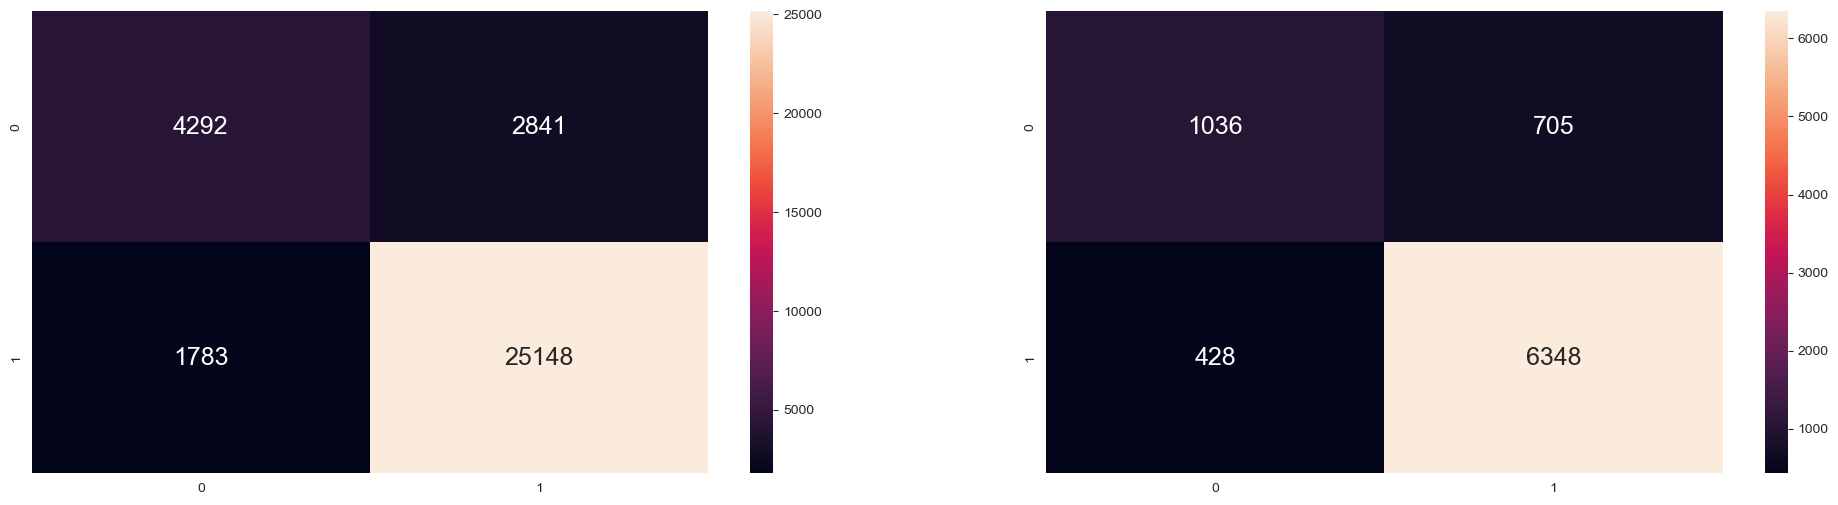

True Positive Rate 	: 0.9368358913813459
False Positive Rate 	: 0.40493968983342904
F1 Score 	: 0.8625556006460519


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Assuming 'new_data' is your initial DataFrame and it's already been loaded correctly
new_data['rating category'] = np.where(new_data['rating'] >= 80, 'Above 80', 'Below 80')
label_encoder = LabelEncoder()
new_data['rating category'] = label_encoder.fit_transform(new_data['rating category'])

X = new_data[['review_percentage']]
y = new_data['rating category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
class_tree = DecisionTreeClassifier(max_depth=3)
class_tree.fit(X_train, y_train)



from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(class_tree, out_file=None,
                                feature_names = X_train.columns,
                                filled=True,
                               class_names=['Below 80', 'Above 80'])


import graphviz
graphviz.Source(dot_data2)

train_pred2 = class_tree.predict(X_train)
test_pred2 = class_tree.predict(X_test)
print("")
print("Train Classification Accuracy:",class_tree.score(X_train,y_train))
print("Test Classification Accuracy:",class_tree.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(y_train,train_pred2)
test_m = confusion_matrix(y_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()

#print the True Positive and the False Positive Rates

cm = confusion_matrix(y_test, test_pred2)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
TPR = (TP[1]/(TP[1]+FN[1])) ##the true positive rate reflecting the positive result of Aircon being present;
                            ## as tpr can be interpreted as the positive result of Aircon not being present
FPR = (FP[1]/(TN[1]+FP[1]))
    
print("True Positive Rate \t:",TPR)
print("False Positive Rate \t:", FPR)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, test_pred2, average='weighted')
print("F1 Score \t:", f1)

#### Classification accuracy is a metric used to evaluate the performance of a classification model. It represents the proportion of correctly classified instances (or observations) out of the total instances in the dataset.

#### Mathematically, classification accuracy is calculated as: 
#### Accuracy = (Number of Correct Predictions/ Total Number of Precitions) * 100%

###### The Classification Accuracy for the test set is 0.86, corrected to 2 decimal places which is quite decent in terms of accuracy.
###### Additionally, the True Positive Rate is 0.94 while the False Positive Rate is 0.38, this shows that the model is adequate at correctly identifying whether the game has a rating of above or below 80

## 5.2 Random Forest Analysis

#### Random Forest Analysis operates by constructing a multitude of decision trees during training and outputs the mode (classification) or mean prediction (regression) of the individual trees. It is advantageous as it combines multiple decision trees which reduces overfitting, high prediction accuracy and most essentially, it tells us which features are most importantly when it comes to making predictions

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [79]:
# Step 1: Take a random 10% sample of your dataset
sampled_data = new_data.sample(frac=0.1, random_state=42)

# Step 2: Split the sampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sampled_data[['positive_percentage', 'review_percentage', 'days_from_today', 'primary_genre', 'detected_technologies']],
                                                    sampled_data['rating'], test_size=0.3, random_state=42)

# Step 3: Define transformers for preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Step 4: Define a ColumnTransformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['positive_percentage', 'review_percentage', 'days_from_today']),
        ('cat', categorical_transformer, ['primary_genre', 'detected_technologies'])
    ])

# Step 5: Preprocess the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 6: Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)

# Step 7: Train the Random Forest model
rf_model.fit(X_train_processed, y_train)

# Step 8: Test the Random Forest model
rf_predictions = rf_model.predict(X_test_processed)

rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
# Step 9: Evaluate the Random Forest model
print('Random Forest model metrics:')
print('MSE:', mean_squared_error(y_test, rf_predictions))
print('MAE:', mean_absolute_error(y_test, rf_predictions))
print('RMSE:', rmse)
print('R2:', r2_score(y_test, rf_predictions))


Random Forest model metrics:
MSE: 10.177228691609006
MAE: 2.3565209546165904
RMSE: 3.190176906005215
R2: 0.9476801604760265


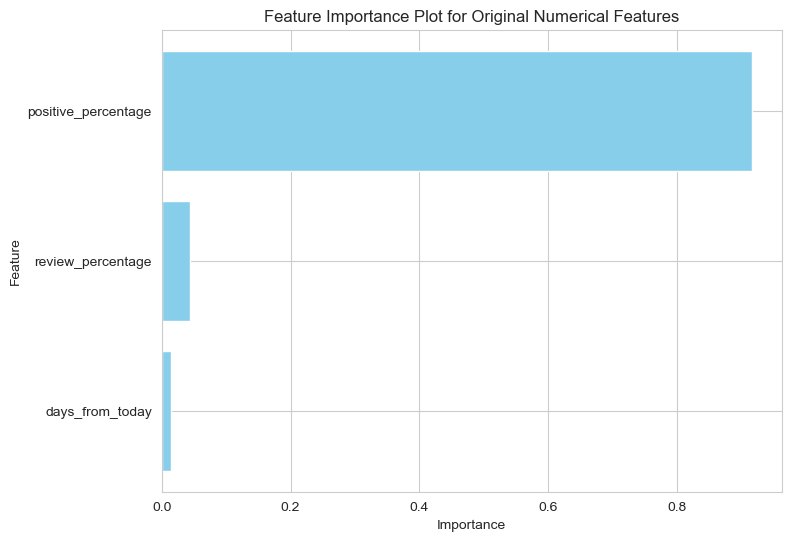

In [80]:

# Get feature importances from the model
feature_importances = rf_model.feature_importances_[:3]  # Considering only the first three features

# Get the names of the original numerical features
numerical_feature_names = ['positive_percentage', 'review_percentage', 'days_from_today']

# Plot feature importances for original numerical features
plt.figure(figsize=(8, 6))
plt.barh(numerical_feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot for Original Numerical Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


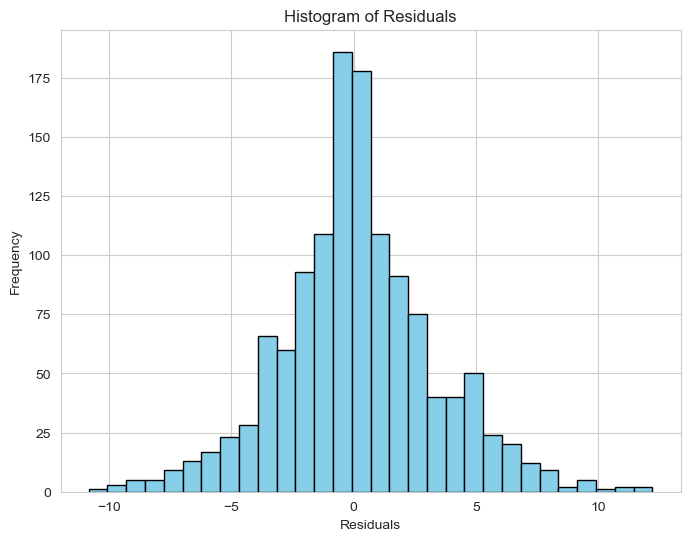

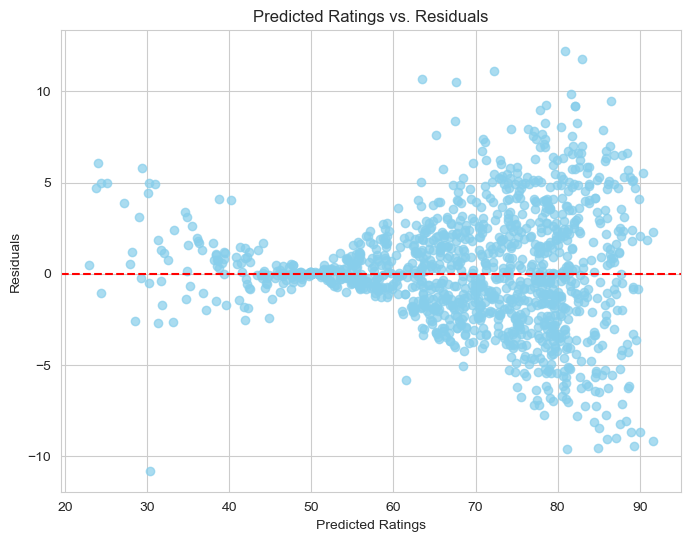

In [81]:
# Calculate residuals
residuals = y_test - rf_predictions

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

# Plot predicted ratings vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(rf_predictions, residuals, color='skyblue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Predicted Ratings vs. Residuals')
plt.grid(True)
plt.show()

#### We conclude that positive_percentage has the highest level of importance as it scored the highest coefficient of 0.93 as compared to review_percentage as well as days_from_today also known as the latest updated date of the game, with both being at roughly 0.02
#### Additionally, the majority of the data have a residual of 0 or close to 0 which means that the predicted rating is the actual rating, which suggests the model is unbiased and a good fit

## 5.3 Text Mining

In [82]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to C:\Users\Zhao
[nltk_data]     Qixian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


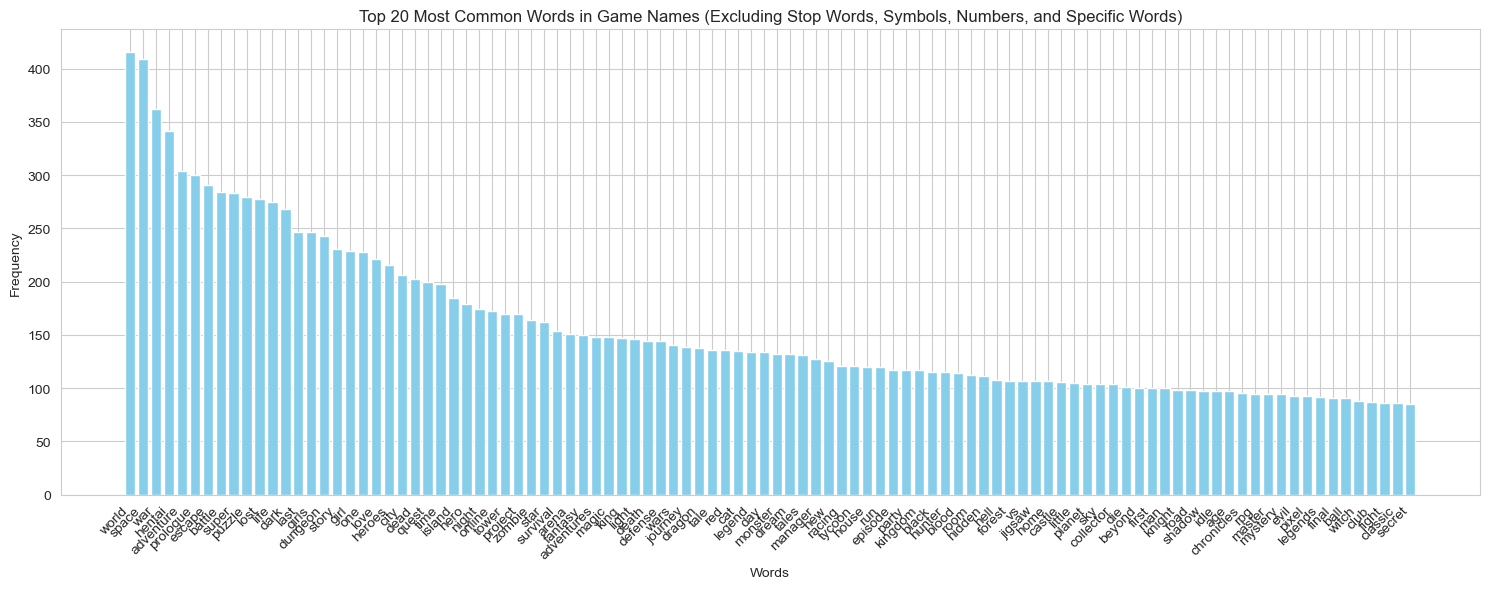

In [83]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re
import matplotlib.pyplot as plt

# Download NLTK stopwords list (only need to do this once)
nltk.download('stopwords')

# Tokenization and Counting
all_words = ' '.join(new_data['game']).lower()  # Join all game names into a single string and convert to lowercase
words_only = re.findall(r'\b[a-zA-Z]+\b', all_words)  # Extract only words (remove symbols, numbers)
stop_words = set(stopwords.words('english'))

# Remove stop words
filtered_words = [word for word in words_only if word not in stop_words]

# Remove specific words like 'vr', 'simulator', 'edition', 'game'
filtered_words = [word for word in filtered_words if word not in ['vr', 'simulator', 'edition', 'game','x','ii','n']]

word_counts = Counter(filtered_words)

# Visualization
common_words = word_counts.most_common(100)  # Get the 100 most common words
words, counts = zip(*common_words)  # Unzip word-count tuples into separate lists

plt.figure(figsize=(15, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Game Names (Excluding Stop Words, Symbols, Numbers, and Specific Words)')
plt.tight_layout()
plt.show()

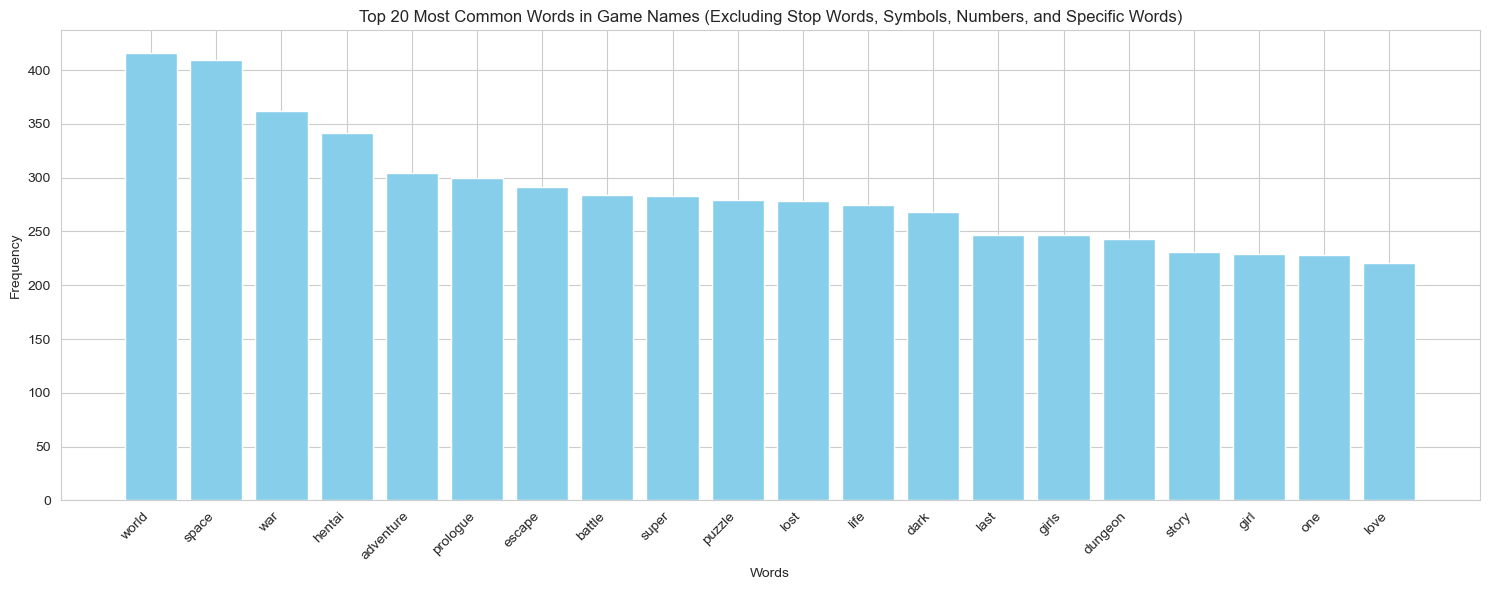

In [84]:
# Visualization
common_words = word_counts.most_common(20)  # Get the 20 most common words
words, counts = zip(*common_words)  # Unzip word-count tuples into separate lists

plt.figure(figsize=(15, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Game Names (Excluding Stop Words, Symbols, Numbers, and Specific Words)')
plt.tight_layout()
plt.show()

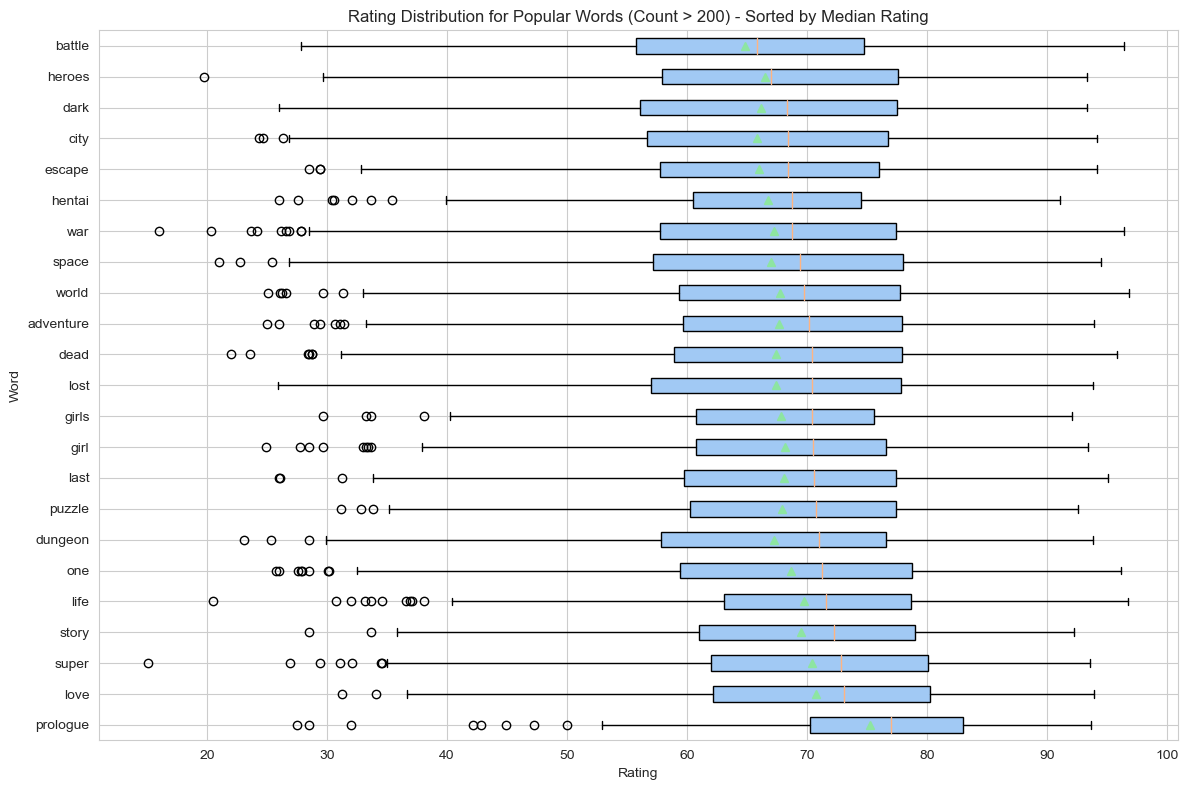

In [85]:
# Filter words that appear more than 200 times
popular_words = {word: count for word, count in word_counts.items() if count > 200}

# Filter out words that are not in the specified list
excluded_words = ['vr', 'simulator', 'edition', 'game', 'x', 'ii', 'n']
popular_words = {word: count for word, count in popular_words.items() if word not in excluded_words}

# Extract the words that meet the criteria
popular_words_list = list(popular_words.keys())

# Create a list to store rating data for each popular word
rating_data = []

# Calculate rating data for each popular word
for word in popular_words_list:
    word_mask = new_data['game'].str.contains(word, case=False)
    ratings = new_data.loc[word_mask, 'rating']
    rating_data.append(ratings)

# Calculate median ratings for each popular word
median_ratings = [ratings.median() for ratings in rating_data]

# Create a dictionary mapping words to their median ratings
word_median_ratings = dict(zip(popular_words_list, median_ratings))

# Sort the words based on their median ratings in descending order
sorted_words = sorted(word_median_ratings.keys(), key=lambda x: word_median_ratings[x], reverse=True)

# Create a list to store rating data for each popular word (sorted)
sorted_rating_data = [rating_data[popular_words_list.index(word)] for word in sorted_words]

# Create a boxplot to visualize the rating distribution for each popular word (sorted)
plt.figure(figsize=(12, 8))
plt.boxplot(sorted_rating_data, labels=sorted_words, vert=False, patch_artist=True, showmeans=True)
plt.xlabel('Rating')
plt.ylabel('Word')
plt.title('Rating Distribution for Popular Words (Count > 200) - Sorted by Median Rating')
plt.tight_layout()
plt.show()

#### We want to consider words that have a sample size of at least 200 and above to ensure that the sample size is sufficiently large to reduce any bias. Using a box plot, we conclude that generally, games that have the word 'prologue' in it has the highest median and beats the runner up by a substantial margin. 

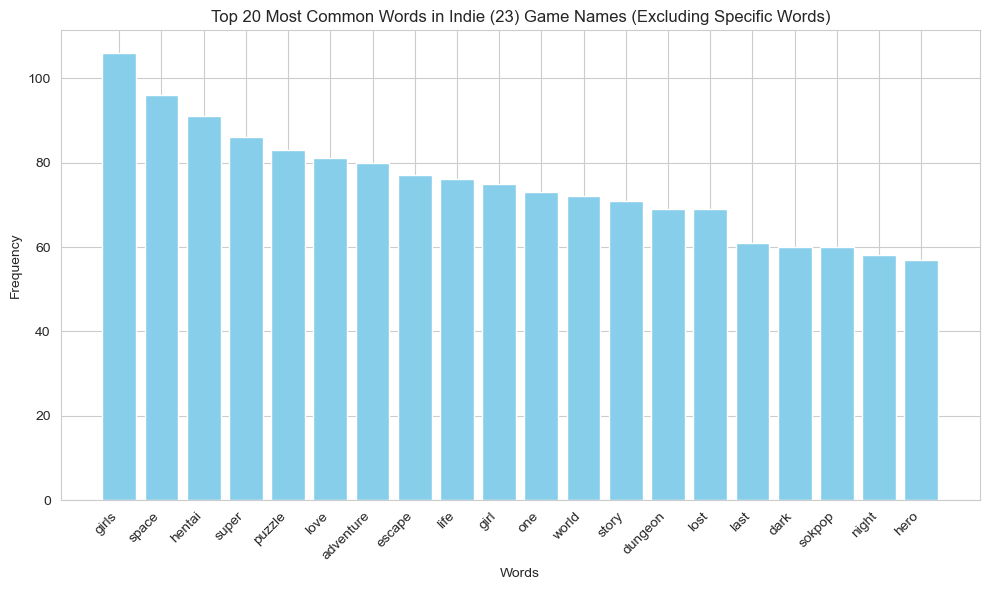

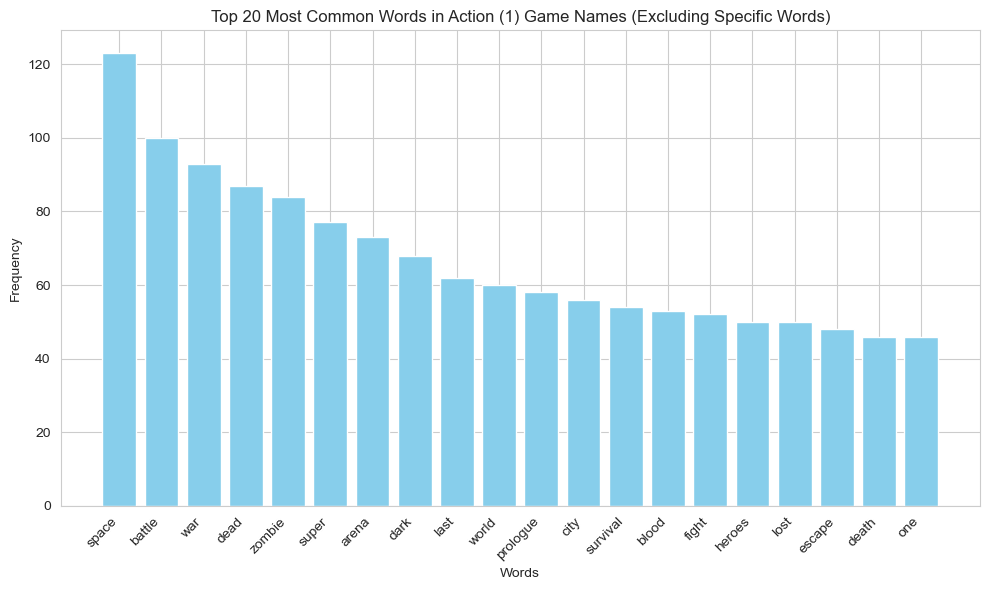

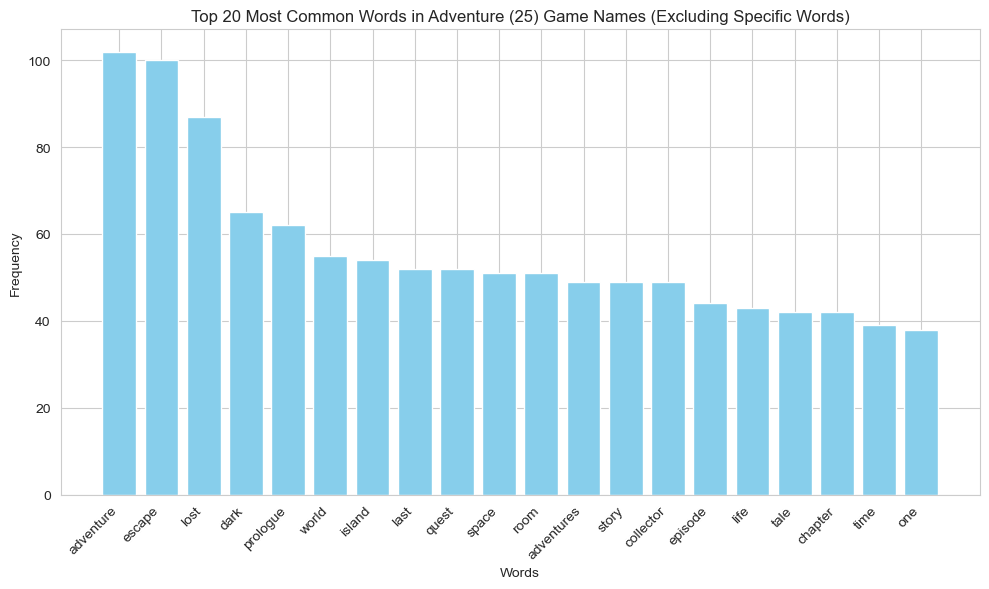

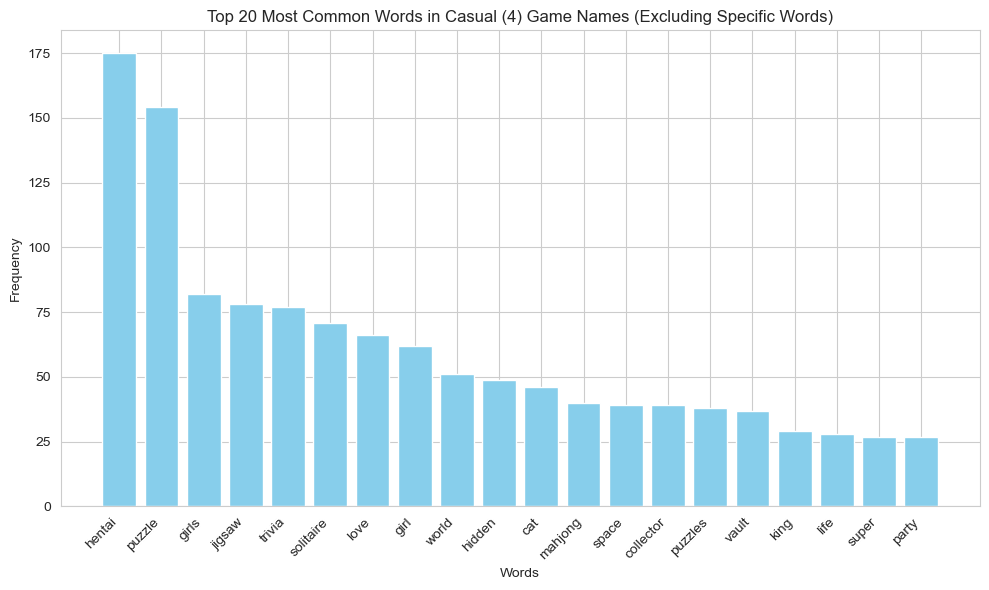

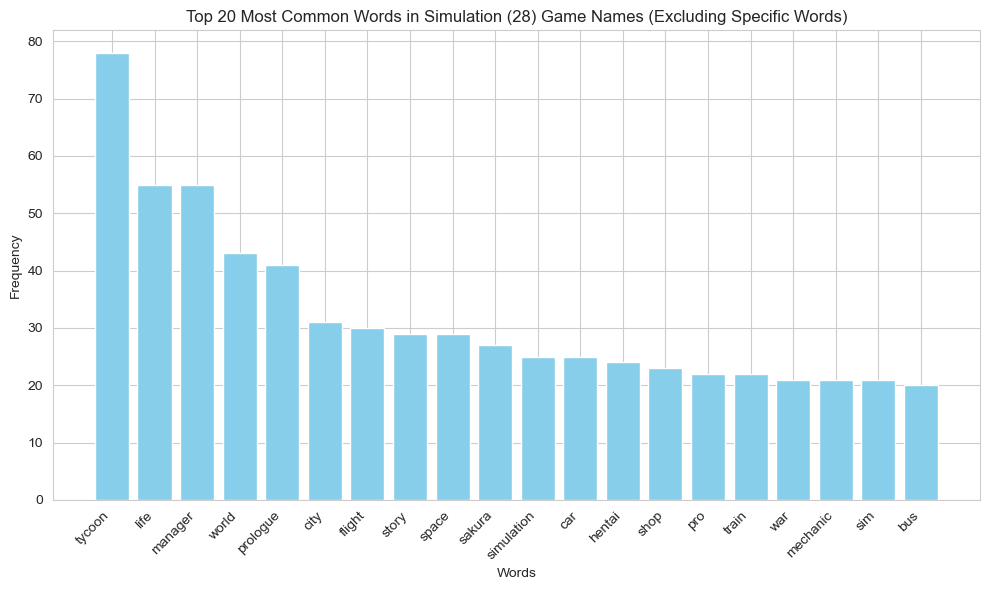

In [86]:
# List of words to filter out
exclude_words = ['vr', 'simulator', 'edition', 'game', 'x', 'ii', 'n']

# Step 1: Identify top 5 genres based on occurrence
top_genres = new_data['primary_genre'].value_counts().head(5).index.tolist()

# Iterate over each of the top 5 genres
for genre in top_genres:
    # Filter dataset by genre
    genre_data = new_data[new_data['primary_genre'] == genre]

    # Perform analysis for the current genre
    # Example: Word frequency analysis
    all_words_genre = ' '.join(genre_data['game']).lower()
    words_only_genre = re.findall(r'\b[a-zA-Z]+\b', all_words_genre)
    stop_words = set(stopwords.words('english'))

    # Filter out stop words and excluded words
    filtered_words_genre = [word for word in words_only_genre if word not in stop_words and word not in exclude_words]

    word_counts_genre = Counter(filtered_words_genre)

    # Visualize word frequency for the current genre
    common_words_genre = word_counts_genre.most_common(20)
    words_genre, counts_genre = zip(*common_words_genre)

    plt.figure(figsize=(10, 6))
    plt.bar(words_genre, counts_genre, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 20 Most Common Words in {genre} Game Names (Excluding Specific Words)')
    plt.tight_layout()
    plt.show()

#### We can infer that games with the word prologue generally does better as if the game is a prologue version, its main game probably has done so well that players wanted more of the story which motivates developers to find ways to expand the world of the game, such as exploring the prologue of the game. However, it is also worth noting that by having the name 'prologue' in the game, the original version must be able to do well in which the names can vary from game to game. So the games that are prologue probably did not do well themselves, but rather they ride on the success of the main series.

#### The Top 3 most popular words are 'Prologue', 'love' and 'super'.

#### Another interest point of anaylsis is to look at what are the popular words under the top five most popular primary genres, so that besides knowing which genre does well, we want to also know what words associated with that particular genre would appear the most in such genres and hence likely to be more appealing to players

#### For example, if we are to look at the most popular genre, indie games, the most commonly appeared words are 'girls', 'space' and 'hentai' which suggest that should developers create indie genre games, they can consider creating games that include these words and have themes revolving around them to stand a more likely chance of receiving positive responses from the players

## 5.4 Sentiment Analysis

###### Sentiment Analysis is used to determine the sentiment or opinion expressed in a piece of text. It involves analysing and classifying subjective information, such as opinions, attitudes, emotions, and feelings, expressed in text data. We installed a dictionary and from there the model determines which words are generally considered as positive, which words are generally considered as negative and which words are considered neutral.

In [87]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK stopwords list (only need to do this once)
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to preprocess a single game name
def preprocess_game_name(game_name):
    # Tokenize the game name
    tokens = word_tokenize(game_name.lower())

    # Remove stopwords and punctuation
    tokens_filtered = [token for token in tokens if token not in stop_words and token not in punctuation]

    # Join the filtered tokens back into a string
    return ' '.join(tokens_filtered)

# Preprocess all game names in the dataset
new_data['cleaned_game_name'] = new_data['game'].apply(preprocess_game_name)


[nltk_data] Downloading package stopwords to C:\Users\Zhao
[nltk_data]     Qixian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zhao
[nltk_data]     Qixian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
import nltk
nltk.download('vader_lexicon')


from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each game name
sentiments = []
for game_name in new_data['cleaned_game_name']:
    sentiment = sid.polarity_scores(game_name)['compound']
    sentiments.append(sentiment)

# Assign sentiment labels based on the compound score
sentiment_labels = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in sentiments]

# Add sentiment labels to the DataFrame
new_data['sentiment'] = sentiment_labels


[nltk_data] Downloading package vader_lexicon to C:\Users\Zhao
[nltk_data]     Qixian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


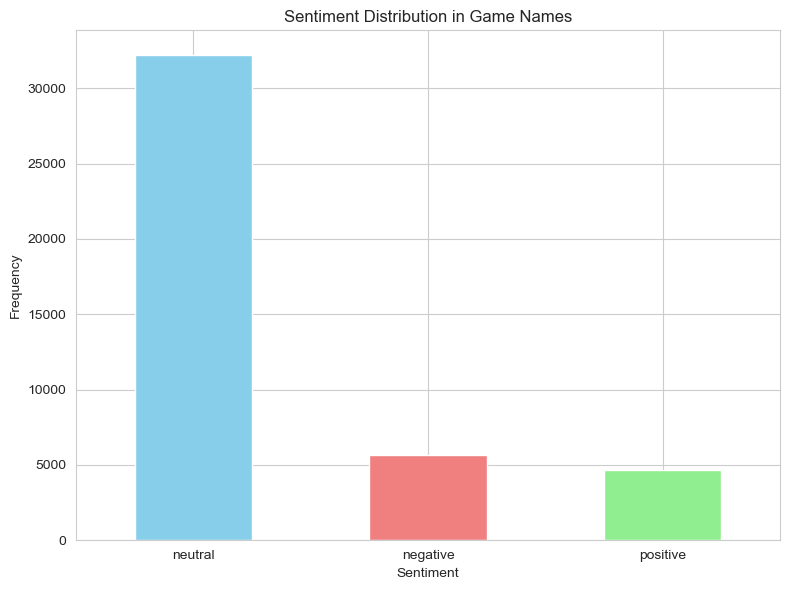

In [89]:
sentiment_counts = new_data['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution in Game Names')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### While the Computational methods under sentiment analysis is objective, the interpretation of sentiment analysis results can be subjective due to factors such as context, language, culture, ambiguity, and individual interpretation which is the limitation of the model. This possibly explains why there is an abnormally large number of game names having a neutral sentiment towards them whereas should an actual human read it, it is likely that the terms can be more easily classified into either positive or negative.

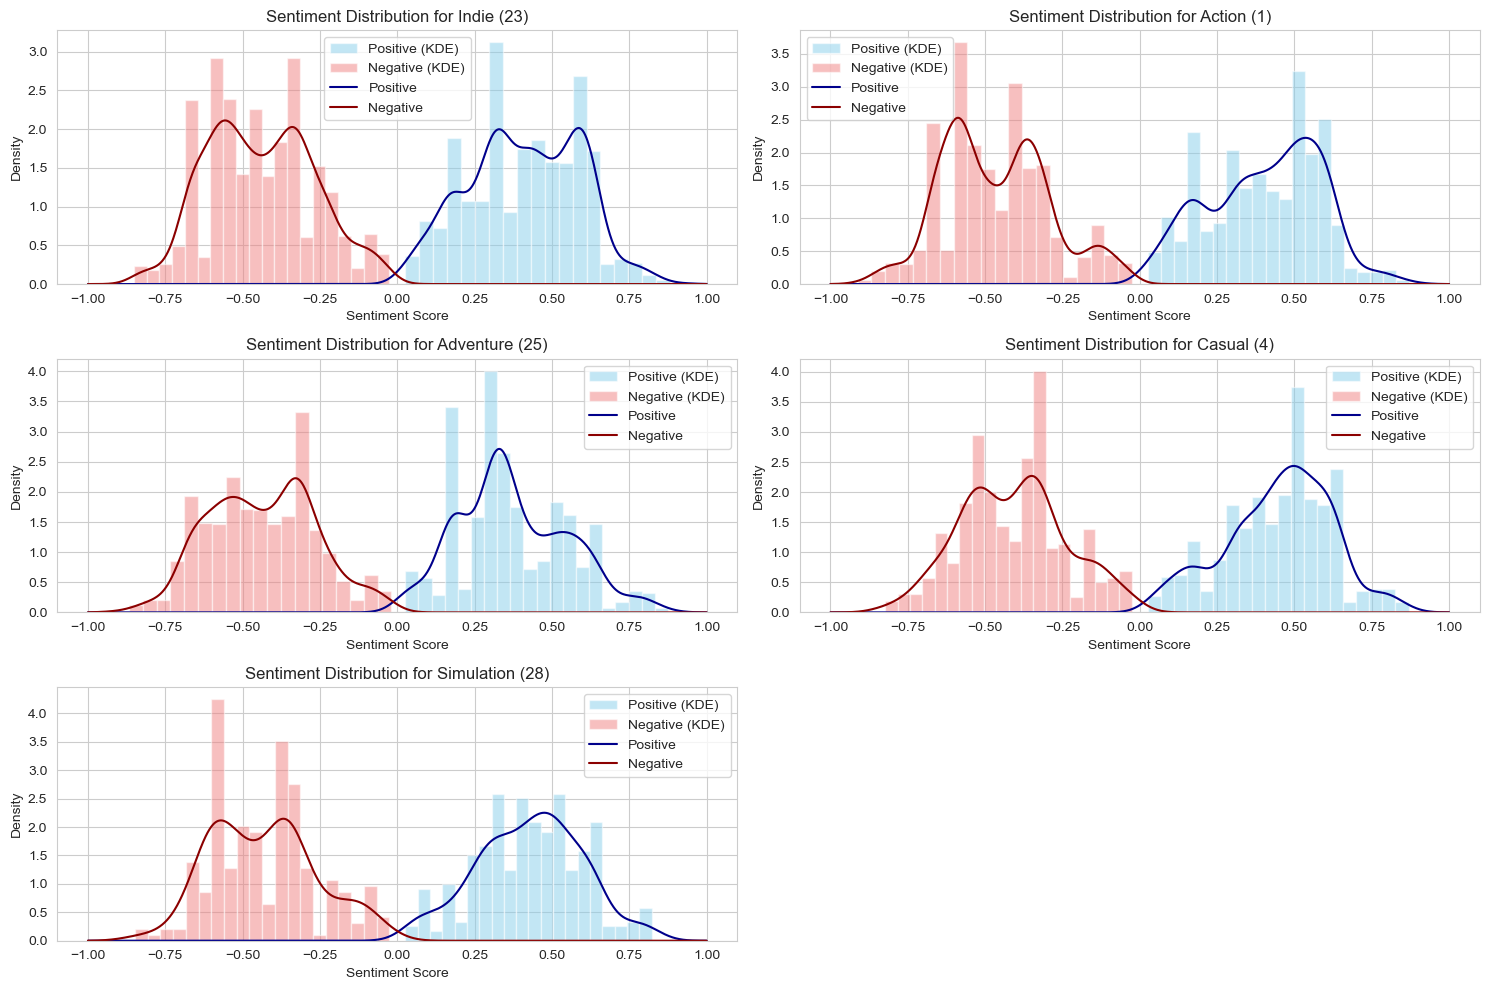

In [90]:
# Step 1: Identify top 5 genres based on occurrence
top_genres = new_data['primary_genre'].value_counts().head(5).index.tolist()

# Step 2: Filter dataset to include only game names for top 5 genres
top_genre_data = new_data[new_data['primary_genre'].isin(top_genres)]

# Step 3: Perform sentiment analysis for each genre
sid = SentimentIntensityAnalyzer()

genre_sentiments = {}
for genre in top_genres:
    # Filter data for current genre
    genre_data = top_genre_data[top_genre_data['primary_genre'] == genre]

    # Perform sentiment analysis for game names in current genre
    sentiments = []
    for game_name in genre_data['cleaned_game_name']:
        sentiment = sid.polarity_scores(game_name)['compound']
        sentiments.append(sentiment)

    # Store sentiment distribution for current genre
    genre_sentiments[genre] = sentiments


from scipy.stats import gaussian_kde

plt.figure(figsize=(15, 10))

# Loop through top 4 genres
for i, genre in enumerate(top_genres[:5], 1):
    plt.subplot(3, 2, i)

    # Filter out neutral sentiment scores
    positive_sentiments = [score for score in genre_sentiments[genre] if score > 0]
    negative_sentiments = [score for score in genre_sentiments[genre] if score < 0]

    # Plot histograms for positive and negative sentiments
    plt.hist(positive_sentiments, bins=20, alpha=0.5, label='Positive', density=True, color='skyblue')
    plt.hist(negative_sentiments, bins=20, alpha=0.5, label='Negative', density=True, color='lightcoral')

    # Compute kernel density estimates for positive and negative sentiments
    kde_positive = gaussian_kde(positive_sentiments)
    kde_negative = gaussian_kde(negative_sentiments)

    # Set x range for the curve
    x = np.linspace(-1, 1, 1000)

    # Plot KDE curves for positive and negative sentiments
    plt.plot(x, kde_positive(x), color='darkblue')
    plt.plot(x, kde_negative(x), color='darkred')

    plt.xlabel('Sentiment Score')
    plt.ylabel('Density')
    plt.title(f'Sentiment Distribution for {genre}')
    plt.legend(['Positive (KDE)', 'Negative (KDE)', 'Positive', 'Negative'])
    plt.grid(True)

plt.tight_layout()
plt.show()

In [91]:
sentiment_metrics = {}

for genre in top_genres:
    sentiments = genre_sentiments[genre]

    # Calculate mean sentiment score
    mean_sentiment = np.mean(sentiments)

    # Calculate median sentiment score
    median_sentiment = np.median(sentiments)

    # Calculate standard deviation of sentiment scores
    std_sentiment = np.std(sentiments)

    # Calculate proportion of positive sentiments
    num_positive = len([score for score in sentiments if score > 0])
    proportion_positive = num_positive / len(sentiments)

    # Calculate proportion of negative sentiments
    num_negative = len([score for score in sentiments if score < 0])
    proportion_negative = num_negative / len(sentiments)

    # Store metrics for the genre
    sentiment_metrics[genre] = {
        'Mean Sentiment': mean_sentiment,
        'Median Sentiment': median_sentiment,
        'Standard Deviation': std_sentiment,
        'Proportion Positive': proportion_positive,
        'Proportion Negative': proportion_negative
    }

# Convert sentiment metrics to DataFrame for better visualization
sentiment_metrics_df = pd.DataFrame(sentiment_metrics).T
print(sentiment_metrics_df)

                 Mean Sentiment  Median Sentiment  Standard Deviation  \
Indie (23)            -0.004995               0.0            0.224058   
Action (1)            -0.052343               0.0            0.244637   
Adventure (25)        -0.016204               0.0            0.224963   
Casual (4)             0.031683               0.0            0.227639   
Simulation (28)        0.009919               0.0            0.193514   

                 Proportion Positive  Proportion Negative  
Indie (23)                  0.116816             0.120190  
Action (1)                  0.084964             0.185832  
Adventure (25)              0.119898             0.139759  
Casual (4)                  0.152120             0.089746  
Simulation (28)             0.099834             0.075954  


#### "Indie" and "Simulation" exhibit balanced sentiment distributions with mean scores close to zero, while "Action" shows slightly more negative sentiments. "Casual" stands out with a positive mean sentiment, indicating slightly prevalent positive sentiments.

## 5.5 SVR

#### Support Vector Regressions (SVRs) are a type of supervised learning algorithm used for classification and regression tasks. It operates by finding a hyperplane that best approximates the underlying relationship between input features and the target variable in a continuous space. SVR accomplishes this by minimizing the error between the actual target values and the predicted values while also maximizing the margin (or distance) between the hyperplane and the closest data points (support vectors).

In [92]:
SVMds=new_data.copy() #replaced all videoGamesSelectedCleaned with SVMds

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Sample 10% of the dataset
SVMds_sampled = SVMds.sample(frac=0.1, random_state=42)

# Encode categorical features using LabelEncoder
le_rating = LabelEncoder()
SVMds_sampled['rating'] = le_rating.fit_transform(SVMds_sampled['rating'])

# Split data into training and testing sets
X = SVMds_sampled[['positive_percentage', 'review_percentage', 'days_from_today']]
y = SVMds_sampled['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate model performance on testing data
y_pred = svm.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print('R-squared score:', r2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)

R-squared score: 0.7876165441771086
MSE: 67679.06840408573
RMSE: 260.15201018651715
MAE: 199.56931651344067


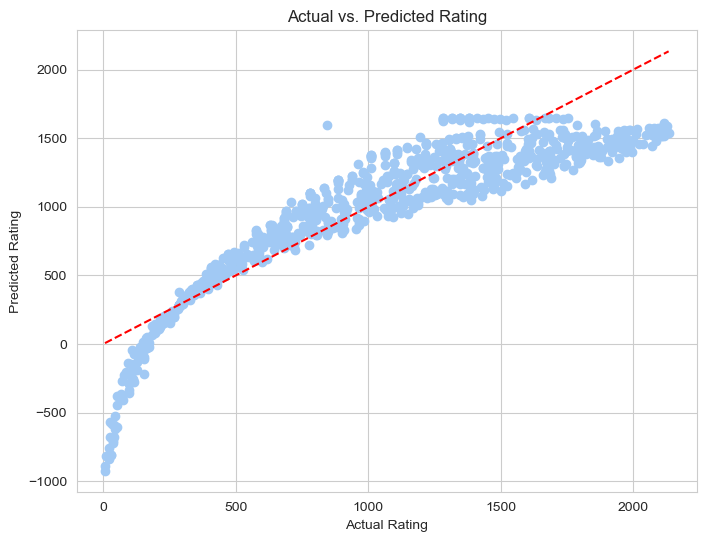

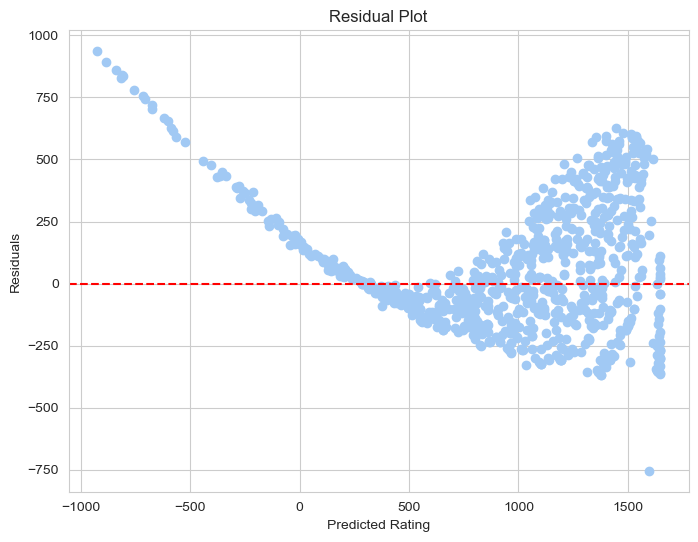

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Rating')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### With an R-squared score of 0.787, the SVR model demonstrates a robust correlation between predicted and actual game ratings, indicating its effectiveness. While the MSE of 67703.83, RMSE of 260.20, and MAE of 199.59 imply moderate prediction errors, further context and benchmarking against alternative models are essential for comprehensive evaluation in game rating prediction.

# 6. Conclusion

#### With the numerous machine learning and regression models explored, we ultimately conclude that there are many plausible ways to determine what would result in a particular game to do well as the problem is complexed and multi-faceted in nature and there is no one-size-fits all method that is able to give us a definite answer. However, if we have to choose, we feel that a decent model should be one where the general public would be able to understand without too much hassle and must come across as intuitive. Hence, based on this basis, we feel that the genre of the game can give us a pretty good gauge on the median rating of the game, such as the top 5 genres identified: Indie, Casual, Adventure, Action, Simulation.
#### The Text Mining model by far is the most eye opening one as the names of the games are not merely just a name, but rather it is safe to conclude the most commonly appeared words are tied to the theme of the game as well which suggests why games containing the particular word would do so well and has a considerably large sample space as that is something that works for developers throughout history and what players of that particular genre are interested in. 
#### Hence, answering the question what are some features of the game developers should look out for when creating a successful game. We posit that all the models above explored can give some valuable insights, but we shortlisted the use of text mining as it is intuitive to developers as to what are some concepts and themes that players are interested in and what genres players are interested in